#CIS 545 Final Project: Movies 🎥 😛
Tony An, Daniel Da, Charlie Lu


## Motivation
For this project, we will be analyzing movie data. Specifically, we are looking to find whether certain factors (such as budget or rating) contribute to the success of a movie (measured by its revenue). At a high-level, we wish to accurately predict the success of the movie using regression techniques.

The findings of this project can be of interest to movie producers as well as investors. Producers can use this information to generate more profit from their movie by adjusting to incorporate factors that generally allow movies to generate more profit. In addition, investors can identify these movies with favorable attributes to invest in.  

##Outline
These are the steps that will be taken in our project:


1.   Loading in appropriate datasets.
2.   Data cleaning and Feature Engineering
3.   Exploratory Data Analysis
4.   Analysis with Classification Models:
*   Logistic Regression
*   Decision Tree
*   Random Forest Classifier
*   Neural Network
5.   Analysis with Regression Models
*   Linear Regression
*   Ridge Regression
*   Lasso Regression
*   Random Forest Regressor
*   Gradient Boosting

## Rubric

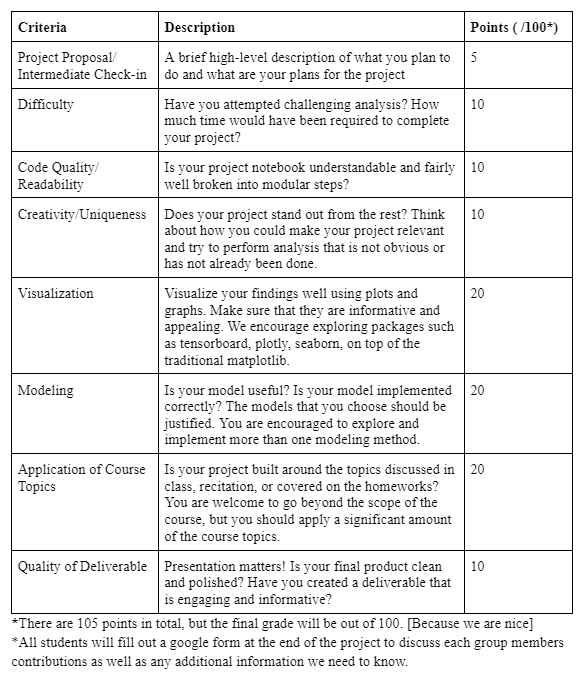

# Set Up and Loading in Data

This data includes three separate dataframes from Kaggle: ratings, credits, and movie metadata. The full data we used for this project can be found at https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=ratings.csv.

There is roughly 50,000 movies released on or before July 2017. There is around 26 million ratings, allowing for robustness in our analysis. Since there are many individual datasets included in this, we chose the ones that included data that would be most relevant to the effect we are trying to measure.


In [ ]:
# importing necessary libraries
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})
sns.set_palette("pastel")
sns.set(font_scale=2)

In [ ]:
!apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:13 http://security.ubuntu.c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 91% 207M/228M [00:01<00:00, 110MB/s] 
100% 228M/228M [00:01<00:00, 139MB/s]


In [ ]:
!unzip /content/the-movies-dataset.zip

Archive:  /content/the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [ ]:
credits = pd.read_csv("credits.csv")

In [ ]:
movies = pd.read_csv("movies_metadata.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
movies_copy = movies.copy()

In [ ]:
ratings = pd.read_csv("ratings.csv")

In [ ]:
movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

# Cleaning Dataset

## Movies
We first looked at our movies dataframe.

In [ ]:
movies.head(5)
movies.columns[movies.isna().any()].tolist()
movies = movies_copy.copy()

### Cleaning NA values

Since the volume of data we are using is large, it is expected that there are NA values in our dataset. However, we must ensure that certain attributes of interest, including revenue, id, runtime, release date, and status are not NA. This is because we will be using these values later on in our analysis. For the column that indicates the collection that the movie belongs to, we filled the NA value with an empty string, since it is not necessary for this a movie to have this attribute marked.

In [ ]:
movies = movies[movies['revenue'].notna()]
movies = movies[movies['imdb_id'].notna()]
movies = movies[movies['runtime'].notna()]
movies = movies[movies['release_date'].notna()]
movies = movies[movies['status'].notna()]
movies['belongs_to_collection'].fillna('', inplace = True)

In [ ]:
movies.isnull().sum().sum()

62952

We also check here to ensure that we only include movies that we have non-zero values for revenue and budget since there are primary variables that we want to measure in our models.

In [ ]:
movies = movies[movies['revenue'] != 0]
movies = movies[movies['budget'] != '0']

### Fixing type

In [ ]:
movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
movies['budget'] = pd.to_numeric(movies['budget'])

After checking for the types of the data, we convery the budget variable to a numeric (float) so that we can use it in our plots for EDA.

In [ ]:
movies['budget'] = movies['budget'].astype(float)
movies['popularity'] = movies['popularity'].astype(float)
movies['release_date'] = pd.to_datetime(movies['release_date'], format = '%Y-%m-%d')
movies['id'] = movies['id'].astype(int)

### Dropping unneeded columns

In [ ]:
movies.drop(columns = ['status', 'video', 'title', 'imdb_id', 'overview'], inplace = True)
movies.drop(columns = ['poster_path', 'homepage', 'tagline'], inplace = True)

In [ ]:
movies['adult'].unique()

array(['False'], dtype=object)

This column only contains values with False. Seems pretty useless!

In [ ]:
movies.drop(columns = 'adult', inplace = True)
#We drop this column.

### Checking for duplicates

In [ ]:
movies[movies[['id']].duplicated(keep = False)].sort_values('id')

belongs_to_collection      budget  \
5865                                                      30000000.0   
33826                                                     30000000.0   
4114   {'id': 34055, 'name': 'Pokémon Collection', 'p...  16000000.0   
44821  {'id': 34055, 'name': 'Pokémon Collection', 'p...  16000000.0   
5130                                                      26000000.0   
33743                                                     26000000.0   
949                                                              4.0   
15074                                                            4.0   
11155                                                     40000000.0   
20843                                                     40000000.0   
4356                                                       3512454.0   
23534                                                      3512454.0   

                                                  genres      id  \
5865   [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...    4912   
33826  [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...    4912   
4114   [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   10991   
44821  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   10991   
5130   [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   15028   
33743  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   15028   
949    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   22649   
15074  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   22649   
11155  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   77221   
20843  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   77221   
4356                       [{'id': 18, 'name': 'Drama'}]  110428   
23534                      [{'id': 18, 'name': 'Drama'}]  110428   

      original_language                   original_title  popularity  \
5865                 en  Confessions of a Dangerous Mind   11.331072   
33826                en  Confessions of a Dangerous Mind    7.645827   
4114                 ja             Pokémon 3: The Movie   10.264597   
44821                ja             Pokémon 3: The Movie    6.480376   
5130                 en                    Clockstoppers    5.373623   
33743                en                    Clockstoppers    4.920175   
949                  en               A Farewell to Arms    1.914697   
15074                en               A Farewell to Arms    2.411191   
11155                en                       Black Gold    6.652197   
20843                en                       Black Gold    6.475665   
4356                 fr             Camille Claudel 1915    0.134014   
23534                fr             Camille Claudel 1915    0.110065   

                                    production_companies  \
5865   [{'name': 'Miramax Films', 'id': 14}, {'name':...   
33826  [{'name': 'Miramax Films', 'id': 14}, {'name':...   
4114   [{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...   
44821  [{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...   
5130   [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
33743  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
949            [{'name': 'Paramount Pictures', 'id': 4}]   
15074          [{'name': 'Paramount Pictures', 'id': 4}]   
11155  [{'name': 'France 2 Cinéma', 'id': 83}, {'name...   
20843  [{'name': 'France 2 Cinéma', 'id': 83}, {'name...   
4356   [{'name': 'Canal+', 'id': 5358}, {'name': 'Art...   
23534  [{'name': 'Canal+', 'id': 5358}, {'name': 'Art...   

                                    production_countries release_date  \
5865   [{'iso_3166_1': 'US', 'name': 'United States o...   2002-12-30   
33826  [{'iso_3166_1': 'US', 'name': 'United States o...   2002-12-30   
4114             [{'iso_3166_1': 'JP', 'name': 'Japan'}]   2000-07-08   
44821            [{'iso_3166_1': 'JP', 'name': 'Japan'}]   2000-07-08   
5130   [{'iso_3166_1': 'US', 'name': 'United States o...   2002-03-17   
33743  [{'iso_3166_1': 'US', 'name': 'United States o... 

We see that there are duplicate values with the same id but somewhat different values in the vote_count and popularity columns. To fix this error, we'll take the average of the two values.

In [ ]:
columns = movies.columns.to_list()

In [ ]:
columns.remove('vote_count')
columns.remove('popularity')


In [ ]:
movies = movies.groupby(columns, as_index = False).mean()

In [ ]:
movies[movies[['id']].duplicated(keep = False)]

Empty DataFrame
Columns: [belongs_to_collection, budget, genres, id, original_language, original_title, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, vote_average, popularity, vote_count]
Index: []

No more duplicated values!

## Fixing outliers/parsing errors

In [ ]:
movies[(movies['budget'] < 1000) & (movies['revenue'] > 1000)]

belongs_to_collection  budget  \
1                                                           1.0   
2                                                           1.0   
7                                                           1.0   
8                                                           1.0   
22                                                          8.0   
25                                                         10.0   
35                                                         93.0   
38                                                        218.0   
5120  {'id': 8580, 'name': 'The Karate Kid Collectio...   113.0   

                                                 genres      id  \
1     [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...    3082   
2     [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   13703   
7     [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   59296   
8                        [{'id': 35, 'name': 'Comedy'}]  114903   
22    [{'id': 10752, 'name': 'War'}, {'id': 35, 'nam...   14968   
25    [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   78383   
35    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   50217   
38    [{'id': 99, 'name': 'Documentary'}, {'id': 18,...    1435   
5120  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...    8856   

     original_language           original_title  \
1                   en             Modern Times   
2                   en           Less Than Zero   
7                   en  Love, Wedding, Marriage   
8                   en           Aquí Entre Nos   
22                  ko                 웰컴 투 동막골   
25                  en                Nurse 3-D   
35                  en       From Prada to Nada   
38                  en                Tarnation   
5120                en  The Karate Kid, Part II   

                                   production_companies  \
1     [{'name': 'United Artists', 'id': 60}, {'name'...   
2     [{'name': 'Twentieth Century Fox Film Corporat...   
7     [{'name': '120dB Films', 'id': 5113}, {'name':...   
8                                                    []   
22               [{'name': 'Film It Suda', 'id': 5659}]   
25    [{'name': 'Lions Gate', 'id': 6644}, {'name': ...   
35    [{'name': 'Lewis Gilbert Productions', 'id': 1...   
38                                                   []   
5120  [{'name': 'Columbia Pictures Corporation', 'id...   

                                   production_countries release_date  \
1     [{'iso_3166_1': 'US', 'name': 'United States o...   1936-02-05   
2     [{'iso_3166_1': 'US', 'name': 'United States o...   1987-11-06   
7     [{'iso_3166_1': 'US', 'name': 'United States o...   2011-06-03   
8              [{'iso_3166_1': 'MX', 'name': 'Mexico'}]   2012-03-30   
22        [{'iso_3166_1': 'KR', 'name': 'South Korea'}]   2005-08-04   
25    [{'iso_3166_1': 'US', 'name': 'United States o...   2013-09-28   
35    [{'iso_3166_1': 'US', 'name': 'United States o...   2011-01-28   
38    [{'iso_3166_1': 'US', 'name': 'United States o...   2003-10-19   
5120  [{'iso_3166_1': 'US', 'name': 'United States o...   1986-06-18   

          revenue  runtime                                   spoken_languages  \
1       8500000.0     87.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2      12396383.0     98.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
7          1378.0     90.0           [{'iso_639_1': 'en', 'name': 'English'}]   
8       2755584.0     73.0           [{'iso_639_1': 'es', 'name': 'Español'}]   
22     33579813.0    133.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
25     10000000.0     99.0           [{'iso_639_1': 'en', 'name': 'English'}]   
35      2500000.0    107.0           [{'iso_639_1': 'en', 'name': 'English'}]   
38      1162014.0     91.0           [{'iso_639_1': 'en', 'name': 'English'}]   
5120  115103979.0    113.0           [{'iso_639_1': 'en', 'name': 'English'}]   

      vote_average  popularity  vote_count  
1            

There are some movies that have budgets less than \$1000 but revenues more than \$1000. A quick Google search shows that some of this data is incorrect (\$8 instead of \$8 million). We will manually fix these now.

In [ ]:
movies.loc[movies['original_title'] == 'Love, Wedding, Marriage', 'budget'] = 13000000
movies.loc[movies['original_title'] == 'Modern Times', 'budget'] = 1500000
movies.loc[movies['original_title'] == 'Less Than Zero', 'budget'] = 8000000
movies.loc[movies['original_title'] == '웰컴 투 동막골', 'budget'] = 8000000
movies.loc[movies['original_title'] == 'From Prada to Nada', 'budget'] = 1100000
movies.loc[movies['original_title'] == 'The Karate Kid, Part II', 'budget'] = 13000000
movies.loc[movies['original_title'] == 'Aquí Entre Nos', 'budget'] = 992000
movies.loc[movies['original_title'] == 'Nurse 3-D', 'budget'] = 10000000

# Manually fixing some of the weird budgets

In [ ]:
movies = movies[movies['budget'] > 1000]

In [ ]:
movies[movies['revenue'] < 1000]

belongs_to_collection      budget  \
136                           200000.0   
197                           390000.0   
206                           410000.0   
239                           500000.0   
286                           750000.0   
389                          1000000.0   
529                          2000000.0   
588                          2000000.0   
940                          4002313.0   
1025                         5000000.0   
1232                         6400000.0   
1505                         9000000.0   
1655                        10000000.0   
1840                        12000000.0   
2169                        16000000.0   
2574                        23000000.0   

                                                 genres      id  \
136   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   14301   
197                                                  []  237214   
206   [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   42481   
239   [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   57186   
286   [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...  280422   
389                 [{'id': 99, 'name': 'Documentary'}]   50641   
529   [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...  108346   
588                    [{'id': 53, 'name': 'Thriller'}]   41393   
940   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   38140   
1025                      [{'id': 18, 'name': 'Drama'}]  228331   
1232  [{'id': 53, 'name': 'Thriller'}, {'id': 10749,...   48781   
1505  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...    2196   
1655  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   33927   
1840  [{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...   10944   
2169  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   18475   
2574  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   14844   

     original_language                        original_title  \
136                 en        Dr. Horrible's Sing-Along Blog   
197                 en                            Duniyadari   
206                 de  Die Angst des Tormanns beim Elfmeter   
239                 sr                               Šišanje   
286                 ru                           Все и сразу   
389                 en                   The End of Poverty?   
529                 en               Dreaming of Joseph Lees   
588                 en                           Zyzzyx Road   
940                 en              Ladrón que roba a ladrón   
1025                en                         A Perfect Man   
1232                en               Never Talk to Strangers   
1505                en                    Death at a Funeral   
1655                en                              Deadfall   
1840                en                            In the Cut   
2169                en                           The Cookout   
2574                en                       Chasing Liberty   

                                   production_companies  \
136                                                  []   
197                                                  []   
206   [{'name': 'Österreichischer Rundfunk (ORF)', '...   
239               [{'name': 'Hypnopolis', 'id': 51316}]   
286   [{'name': 'Кинокомпания «Lunapark»', 'id': 420...   
389                                                  []   
529   [{'name': 'Fox Entertainment Group', 'id': 857...   
588               [{'name': 'Zyzzyx LLC', 'id': 92534}]   
940       [{'name': 'Narrow Bridge Films', 'id': 6535}]   
1025                                                 []   
1232          [{'name': 'TriStar Pictures', 'id': 559}]   
1505  [{'name': 'Sidney Kimmel Entertainment', 'id':...   
1655         [{'name': 'Trimark Pictures', 'id': 4063}]   
1840  [{'name': 'Pathe Productions', 'id': 21126}, {...   
2169      [{'name': 'Cookout Productions', 'id': 3494}]   
2574  [{'name': 'Alcon Entertainment', 'id': 1088}, ...   

                                   production_countries r

Similarly, there appear to be some movies with revenues of less than \$1000. With some more searching online, we can find the correct number.

In [ ]:
movies.loc[movies['original_title'] == 'In the Cut', 'revenue'] = 23700000
movies.loc[movies['original_title'] == 'The Cookout', 'revenue'] = 12010000
movies.loc[movies['original_title'] == 'Never Talk to Strangers', 'revenue'] = 6858261
movies.loc[movies['original_title'] == 'Death at a Funeral', 'revenue'] = 49100000
movies.loc[movies['original_title'] == 'The End of Poverty?', 'revenue'] = 57805
movies.loc[movies['original_title'] == 'Duniyadari', 'revenue'] = 5120000
movies.loc[movies['original_title'] == 'Šišanje', 'revenue'] = 179979
movies.loc[movies['original_title'] == 'Dreaming of Joseph Lees', 'revenue'] = 12044
movies.loc[movies['original_title'] == 'Ladrón que roba a ladrón', 'revenue'] = 6875000
movies.loc[movies['original_title'] == 'A Perfect Man', 'revenue'] = 14147
movies.loc[movies['original_title'] == 'Deadfall', 'revenue'] = 18369
movies.loc[movies['original_title'] == 'Chasing Liberty', 'revenue'] = 12000000

movies = movies[movies['original_title'] != 'Die Angst des Tormanns beim Elfmeter']
movies = movies[movies['original_title'] != "Dr. Horrible's Sing-Along Blog"]
movies = movies[movies['original_title'] != "Все и сразу"]


#Could not find data on revenue


In [ ]:
movies['return'] = movies['revenue'] / movies['budget']

The return on investment for a movie is the revenue divided by the budget. This column represents how much an investor would receive if they invested one dollar into the movie before development.

## Parsing genre

In [ ]:
import collections.abc


In [ ]:
movies['genres'].head(2)

1    [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...
2    [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
Name: genres, dtype: object

The data for genre comes in a difficult format. We'll define a function below to extract the genres into a list instead.

In [ ]:
def parse_genre(input):
  if (not isinstance(input, collections.abc.Sequence)):
    return input
  arr = input.split(",")
  genre_arr = []
  for genre in arr:
    if ('name' in genre):
      genre_arr.append(genre.split(": '")[1].split("'")[0])
  return genre_arr

In [ ]:
movies['genres'] =movies['genres'].apply(lambda x: parse_genre(x))

In [ ]:
movies['genres']

1                              [Drama, Comedy]
2                      [Drama, Crime, Romance]
7                            [Comedy, Romance]
8                                     [Comedy]
22               [War, Comedy, Drama, History]
                         ...                  
5369                          [Comedy, Family]
5370                          [Comedy, Family]
5371                                  [Comedy]
5372    [Family, Adventure, Animation, Comedy]
5373      [Animation, Fantasy, Family, Comedy]
Name: genres, Length: 5327, dtype: object

Since a movie can be multiple genres, we cannot have a single column to descrie the genre of a movie. Instead, we'll create a boolean column for each genre to represent whether the movie is or is not each genre. First, we need to create a set of all possible genres.

In [ ]:
from itertools import chain
genres = set(chain(*movies['genres']))
genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

Next, we create the column for each of the genres

In [ ]:
for genre in genres:
  movies[genre] = movies['genres'].apply(lambda x: 1 if genre in x else 0)

We drop the original genres column because it is no longer needed.

In [ ]:
movies.drop(columns = 'genres', inplace = True)

## Parsing production company

In [ ]:
movies['production_companies'].head(2)

1    [{'name': 'United Artists', 'id': 60}, {'name'...
2    [{'name': 'Twentieth Century Fox Film Corporat...
Name: production_companies, dtype: object

Similar to genres, the production_companies column is in a difficult format. We'll handle this similarly by converting the column to a list of companies

In [ ]:
def parse_company(input):
  if ('name' not in input):
    return input
  arr = input.split("name': '")
  company_arr = []
  for company in arr:
    if ('{' not in company) :
      company_arr.append(company.split("'")[0])
  return company_arr

In [ ]:
movies['production_companies'] =movies['production_companies'].apply(lambda x: parse_company(x))

However, there are far too many production companies to create a column for each one. Instead, we found online (https://www.the-numbers.com/movies/production-companies/) the top grossing production companies and only sleected companies with over 30 trillion total worldwide box office. We will create a boolean column for each of these six companies.

In [ ]:
top_companies = ['Warner Bros', 'Universal Pictures', 'Columbia Pictures', 'Walt Disney', 'Paramount', 'Marvel']
# Companies with over 30 trillion total worldwide box office

The  function checks if the company is inside of the production_companies array and returns the correct boolean value. We use this function to also check for different monikers of the company (example is Walt Disney Pictures vs. Walt Disney)

In [ ]:
def contains_company(target, input):
  for company in input:
    if target in company:
      return 1
  return 0

In [ ]:
for company in top_companies:
  movies[company] = movies['production_companies'].apply(lambda x: contains_company(company, x))

In [ ]:
movies.head(5)['production_companies']

1              [Charles Chaplin Productions]
2     [American Entertainment Partners L.P.]
7                [First Wedding Productions]
8                                         []
22                            [Film It Suda]
Name: production_companies, dtype: object

## Credits features and merging


We extract relevant columns from the credits dataframe and merge into a cleaned dataframe with relevant columns.

In [ ]:
from ast import literal_eval

features = ['cast', 'crew']
for feature in features:
  credits[feature] = credits[feature].apply(literal_eval)

### Director

In [ ]:
def get_director(x):
  for i in x:
    if i['job'] == 'Director':
      return i['name']

  return np.nan

In [ ]:
credits['director'] = credits['crew'].apply(get_director)

### Writer

In [ ]:
def get_writers(x):
  writers = []
  for i in x:
    if i['job'] == 'Screenplay':
      writers.append(i['name'])

  return writers

In [ ]:
credits['writers'] = credits['crew'].apply(get_writers)


### Composer

In [ ]:
def get_music(x):
  for i in x:
    if i['job'] == 'Original Music Composer':
      return i['name']

  return np.nan

In [ ]:
credits['composer'] = credits['crew'].apply(get_music)


### Lead actor gender

In [ ]:
def get_actors(x):
  actors = []
  for i in x[:3]:
    actors.append(i['name'])

  return actors

In [ ]:
credits['actors'] = credits['cast'].apply(get_actors)


In [ ]:
def male_lead_actor(x):
  for i in x[:1]:
    return 1 if i['gender'] == 2 else 0
  return 0

### Cast gender ratio

In [ ]:
credits['lead_actor_male'] = credits['cast'].apply(male_lead_actor)


In [ ]:
def cast_gender_ratio(x):
  total = 0
  male = 0
  for i in x[:5]:
    if i['gender'] == 2:
      male+=1
      total+=1
    else:
      total+=1
  if total == 0:
    return 0
  return male / total

In [ ]:
credits['male_cast_ratio'] = credits['cast'].apply(cast_gender_ratio)


### Crew gender ratio

In [ ]:
def crew_gender_ratio(x):
  total = 0
  male = 0
  for i in x[:5]:
    if i['gender'] == 2:
      male+=1
      total+=1
    else:
      total+=1
  if total == 0:
    return 0
  return male / total

In [ ]:
credits['male_crew_ratio'] = credits['crew'].apply(cast_gender_ratio)


### Merging

In [ ]:
df = movies.merge(credits, on = 'id', how = 'left')

In [ ]:
df.dtypes

belongs_to_collection            object
budget                          float64
id                                int64
original_language                object
original_title                   object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
vote_average                    float64
popularity                      float64
vote_count                      float64
return                          float64
Romance                           int64
Thriller                          int64
Western                           int64
Horror                            int64
War                               int64
TV Movie                          int64
Mystery                           int64
Animation                         int64
Action                            int64
History                           int64


In [ ]:
df.drop(columns = ['cast', 'crew'], inplace = True)

In [ ]:
df.isna().sum()

belongs_to_collection       0
budget                      0
id                          0
original_language           0
original_title              0
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     0
spoken_languages            0
vote_average                0
popularity                  0
vote_count                  0
return                      0
Romance                     0
Thriller                    0
Western                     0
Horror                      0
War                         0
TV Movie                    0
Mystery                     0
Animation                   0
Action                      0
History                     0
Drama                       0
Crime                       0
Family                      0
Foreign                     0
Fantasy                     0
Documentary                 0
Adventure                   0
Science Fiction             0
Music     

## Ratings

For ratings, we do a similar approach and merge in relevant columns to our analysis.

In [ ]:

ratings.head(5)


userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556

In [ ]:

ratings = ratings.groupby('movieId', as_index=False).mean()
ratings.drop(columns = ['userId', 'timestamp'], inplace = True)


In [ ]:

all_ratings = df.merge(ratings, how = 'left', left_on = 'id', right_on = 'movieId').drop(columns = ['movieId'])


In [ ]:
all_ratings.isna().sum()

belongs_to_collection       0
budget                      0
id                          0
original_language           0
original_title              0
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     0
spoken_languages            0
vote_average                0
popularity                  0
vote_count                  0
return                      0
Romance                     0
Thriller                    0
Western                     0
Horror                      0
War                         0
TV Movie                    0
Mystery                     0
Animation                   0
Action                      0
History                     0
Drama                       0
Crime                       0
Family                      0
Foreign                     0
Fantasy                     0
Documentary                 0
Adventure                   0
Science Fiction             0
Music     

There are too many null values for ratings -- much of the data doesn't line up with the movie data we currently have. Unfortunately, we'll have to exclude the ratings data.

## Feature engineering

### Above average

We want to create a binary variable that represents whether the movie is rated above average. First, let's look at the distribution of the vote_average variable again.

In [ ]:
df['vote_average'].describe()

count    5332.000000
mean        6.275113
std         0.920588
min         0.000000
25%         5.700000
50%         6.300000
75%         6.900000
max         9.100000
Name: vote_average, dtype: float64

The average vote isn't actually 5, instead it's actually 6.27.

We'll create a variable here to represent a binary on whether the vote average is greater than and equal to 6.3 or less than 6.3.

In [ ]:
df['above_avg'] = df['vote_average'].apply(lambda x: 1 if x >= 6.3 else 0)

### Return Quintiles

In [ ]:
df['return'].describe()

count     5332.000000
mean         9.038750
std        189.123763
min          0.000015
25%          0.795825
50%          2.065509
75%          4.239498
max      12890.386667
Name: return, dtype: float64

Let's create a new column that represents the quintiles of return.

In [ ]:
quintiles = [0]
quintiles.extend(df['return'].quantile([0.2, 0.4, 0.6, 0.8, 1]))

# Create a new column that represents the quantiles of the values in the column
df['return_q'] = pd.cut(df['return'], quintiles, labels=[1, 2, 3, 4, 5])

In [ ]:
df['return_q'] = df['return_q'].astype(int)

### Budget skewness

[]

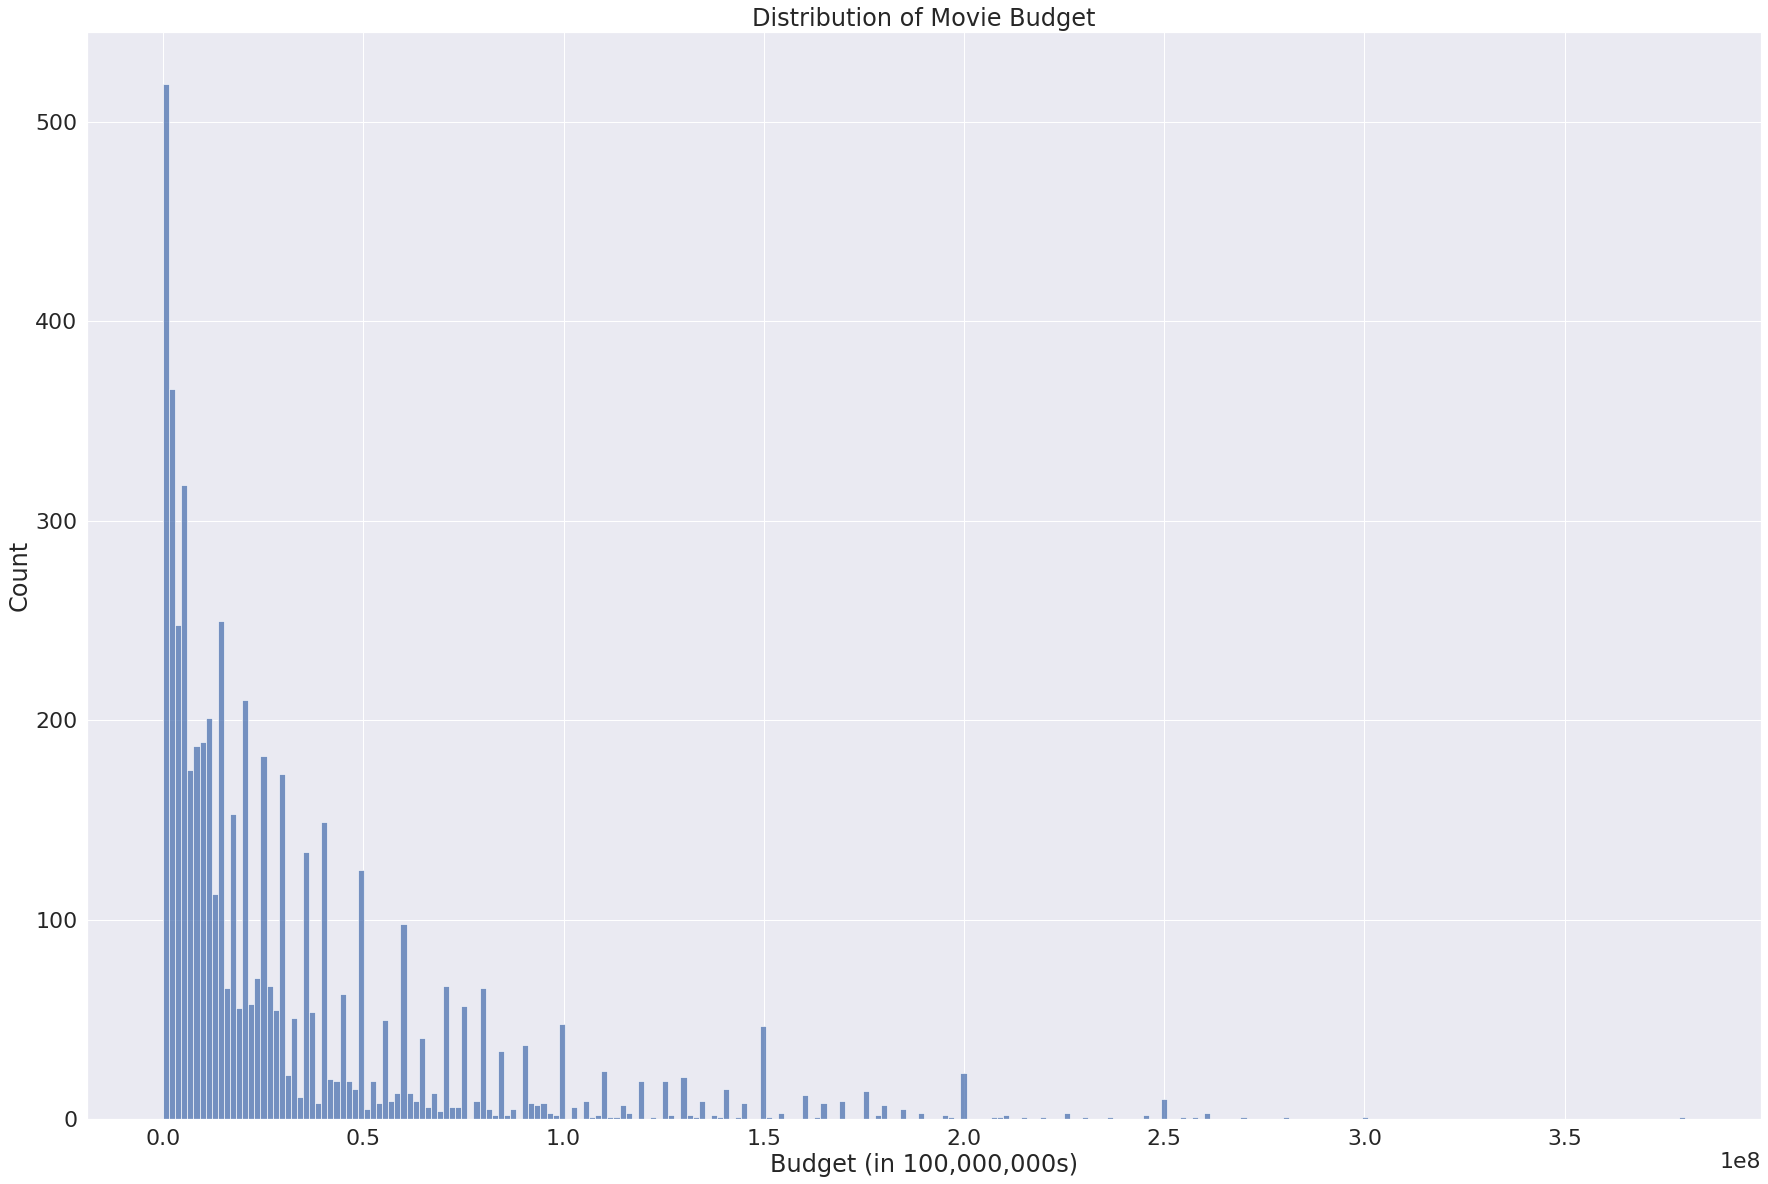

In [ ]:
ax = sns.histplot(x = df['budget'],bins = 250)
ax.set(xlabel = 'Budget (in 100,000,000s)', ylabel = 'Count', title = 'Distribution of Movie Budget')
ax.plot()

Budget has some extreme skewness. As seen in the graph above, some movies have extraordinarily high budgets (above 100 million) while much of the movies included in the data have lower budgets. This skewness can affect our modeling by preventing the models from finding the relationship between the variables or lead to overfitting of the data. Thus, we will apply a log transformation to reduce the skewness of the data.

In [ ]:
df['l_budget'] = df['budget'].apply(lambda x: np.log(x))

[]

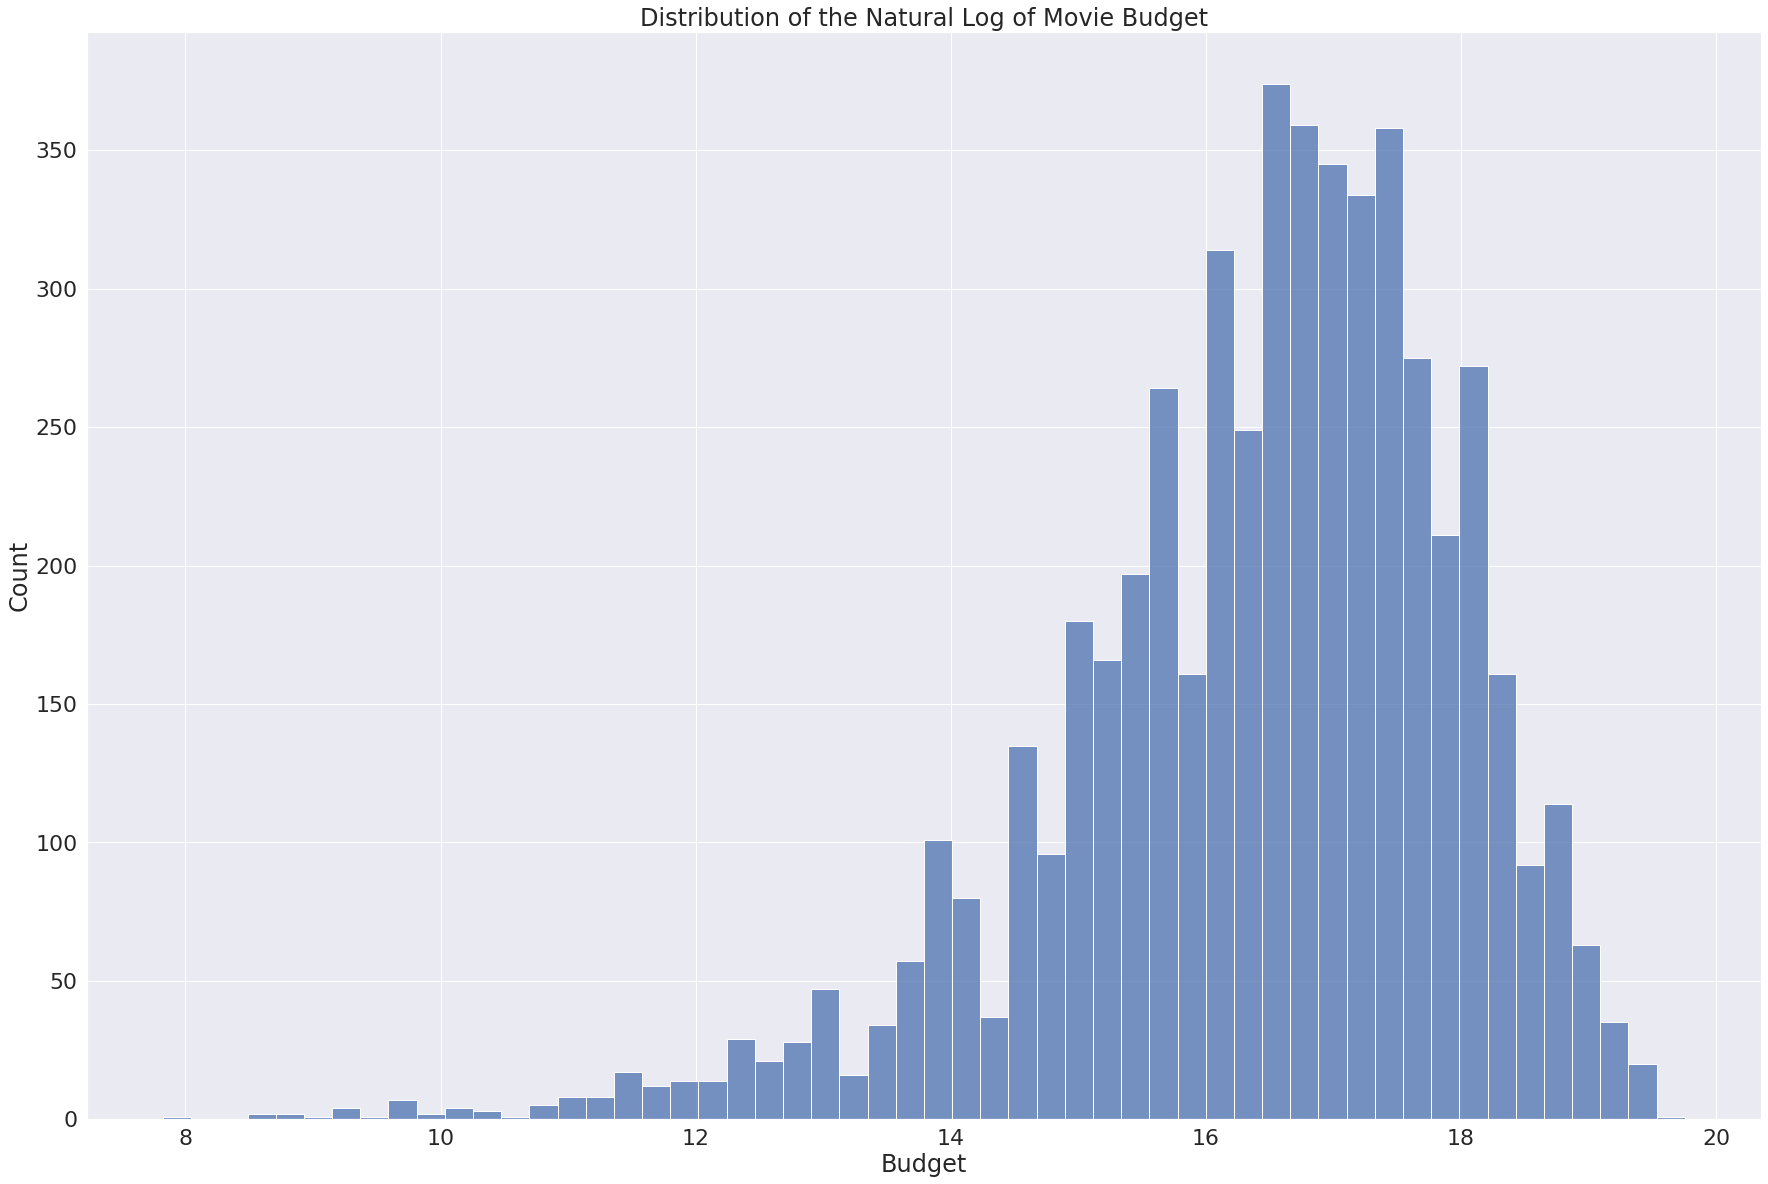

In [ ]:
ax = sns.histplot(x = df['l_budget'])
ax.set(xlabel = 'Budget', ylabel = 'Count', title = 'Distribution of the Natural Log of Movie Budget')
ax.plot()

### Return skewness

[]

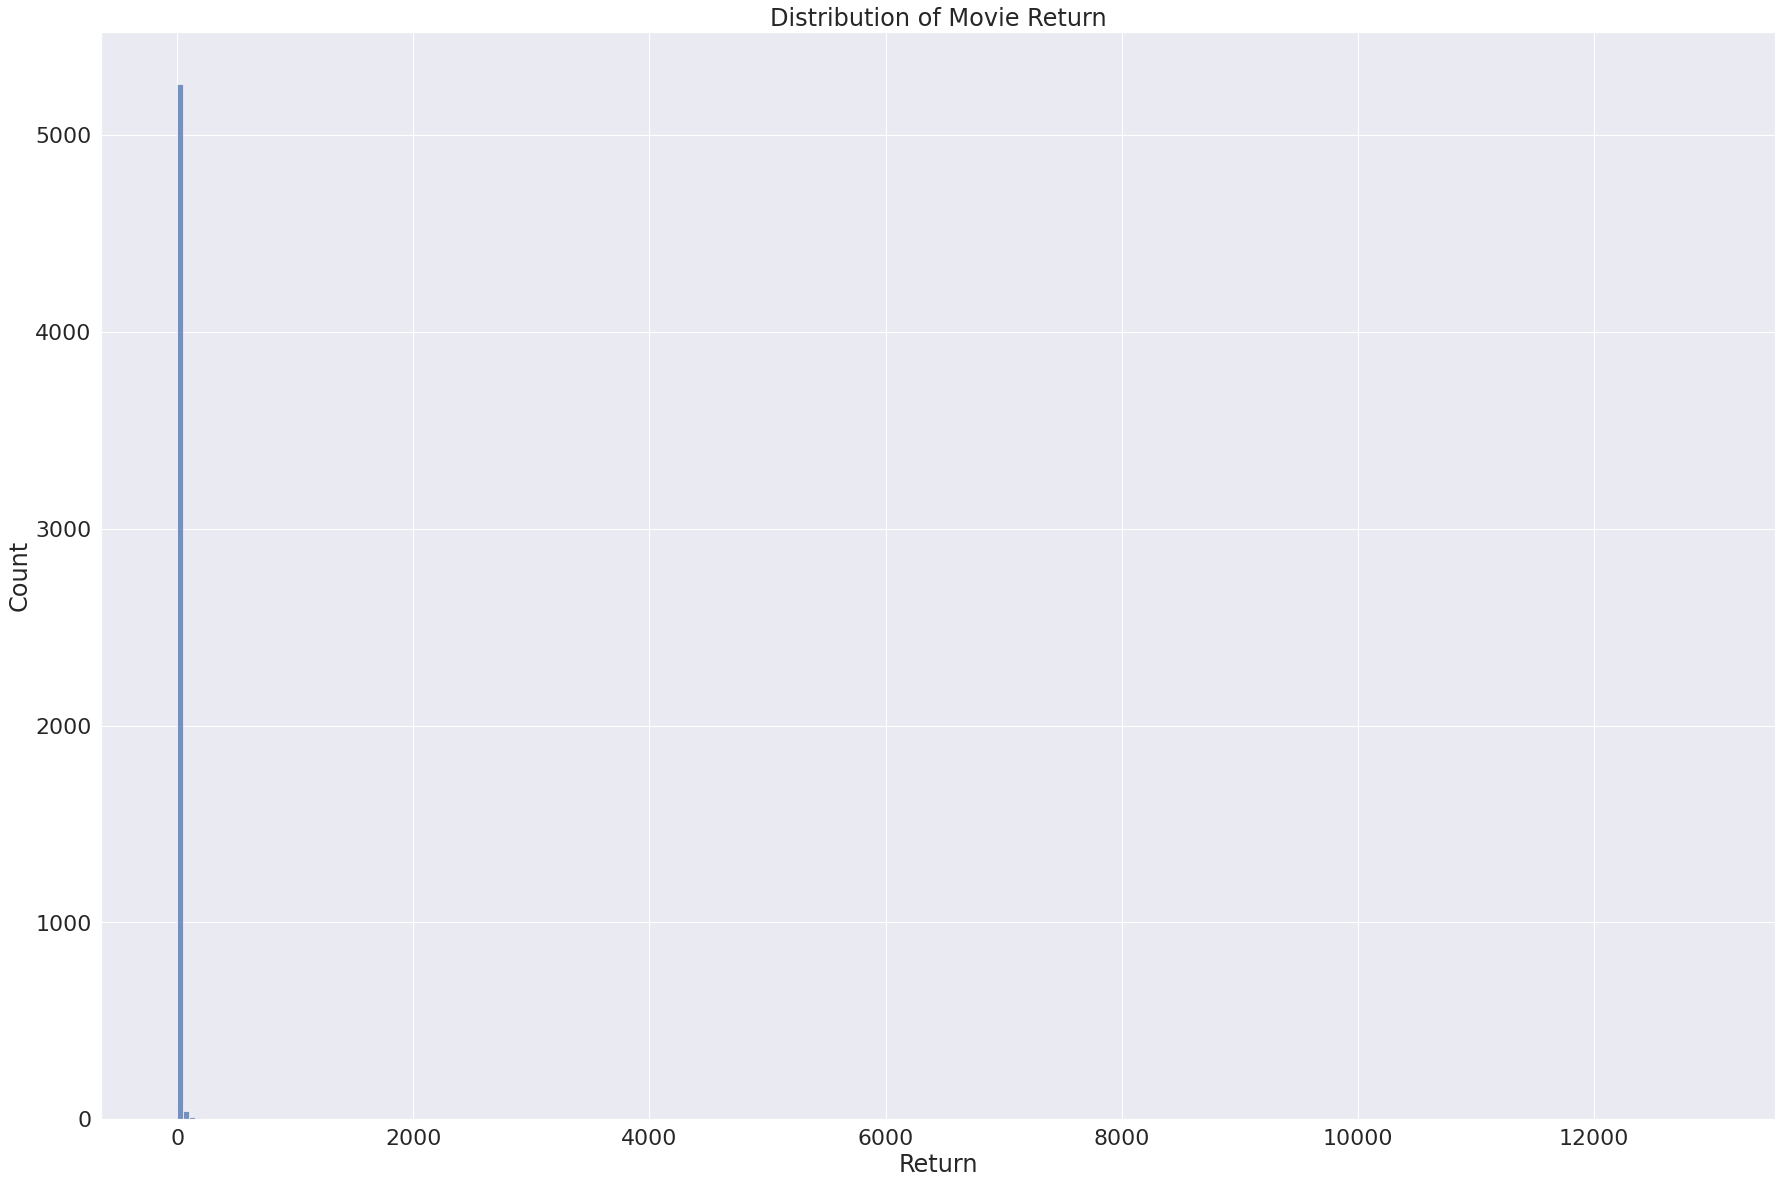

In [ ]:
ax = sns.histplot(x = df['return'],bins = 250)
ax.set(xlabel = 'Return', ylabel = 'Count', title = 'Distribution of Movie Return')
ax.plot()

The skewness of return is extreme, so we definitely need to normalize this data. We'll first attempt a log transformation.

In [ ]:
df['l_return'] = df['return'].apply(lambda x: np.log(x))


[]

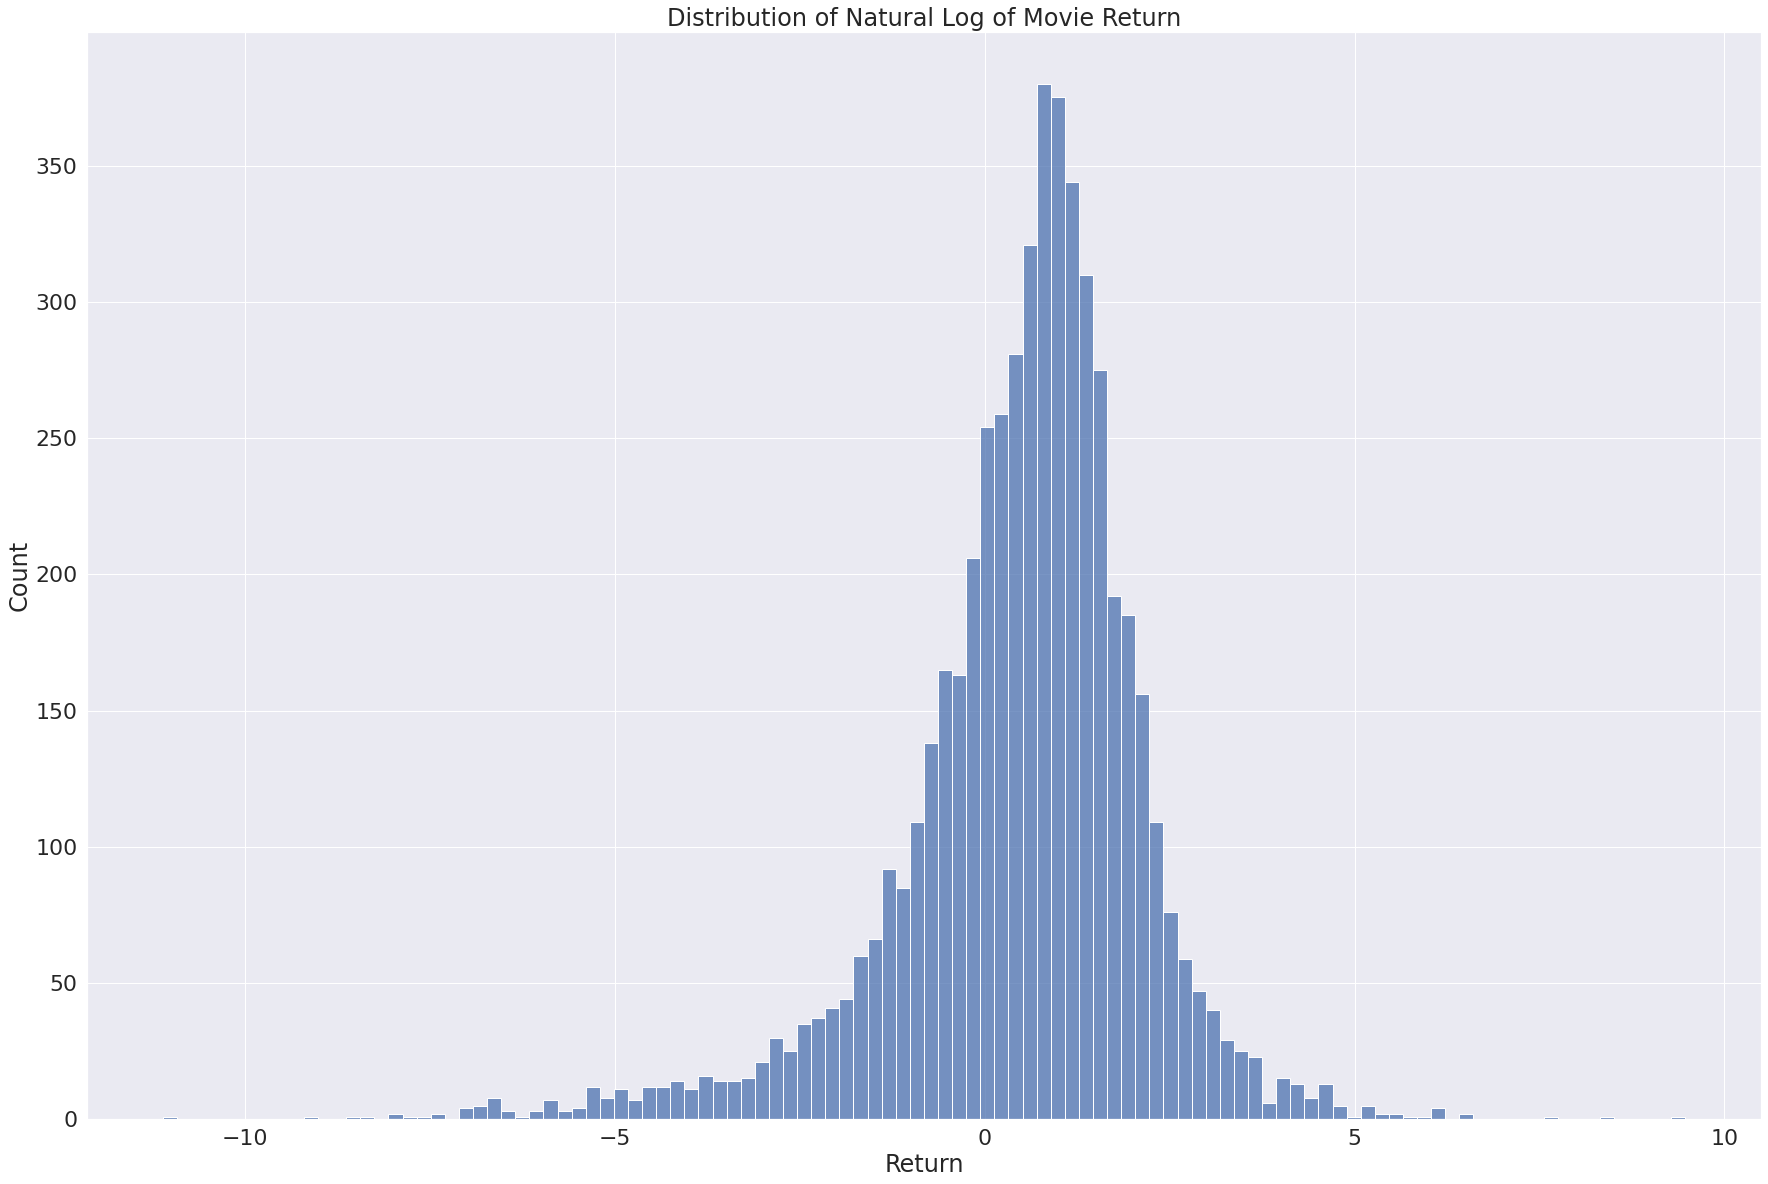

In [ ]:
ax = sns.histplot(x = df['l_return'])
ax.set(xlabel = 'Return', ylabel = 'Count', title = 'Distribution of Natural Log of Movie Return')
ax.plot()

The distribution is looking much more normal, so we can use this now.

### Season released

In [ ]:
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)

def get_season(date):
  doy = date.timetuple().tm_yday
  if doy in spring:
    return 'Spring'
  elif doy in summer:
    return 'Summer'
  elif doy in fall:
    return 'Fall'
  else:
    return 'Winter'

In [ ]:
df['season'] = df['release_date'].apply(get_season)

In [ ]:
df = pd.concat([df, pd.get_dummies(df["season"])], axis=1)
df.drop(columns = ['season'], inplace = True)

In [ ]:
df.dtypes

belongs_to_collection            object
budget                          float64
id                                int64
original_language                object
original_title                   object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
vote_average                    float64
popularity                      float64
vote_count                      float64
return                          float64
Romance                           int64
Thriller                          int64
Western                           int64
Horror                            int64
War                               int64
TV Movie                          int64
Mystery                           int64
Animation                         int64
Action                            int64
History                           int64


### Series Movie

This feature represents if the movie is part of a collection or series of movies.

In [ ]:
df['series'] = df['belongs_to_collection'].apply(lambda x: 1 if len(x) > 0 else 0)

### Top Composers

Here we create a variable representing if the movie's composer is one of the top 3 movie composers of all time, according to [this source](https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-specific-technical-role/composer). Hans Zimmer, John Williams, and Michael Giacchino all have contributed to movies for a total of 20 billion dollars of box office.

In [ ]:
df['top_composer'] = df['composer'].apply(lambda x: 1 if (x == 'Hans Zimmer') | (x == 'John Williams') | (x == 'Michael Giacchino') else 0)

### Top Actors

Here we create a column representing if the movie includes any of the top 10 highest grossing actors based on lead roles according to [Wikipedia](https://en.wikipedia.org/wiki/List_of_highest-grossing_actors).

In [ ]:
top_actors = pd.read_html('https://en.wikipedia.org/wiki/List_of_highest-grossing_actors')[3]['Actor'].apply(lambda x: str(x).strip())

In [ ]:
top_actors

0    Scarlett Johansson
1     Robert Downey Jr.
2     Samuel L. Jackson
3       Chris Hemsworth
4           Chris Pratt
5            Tom Cruise
6           Chris Evans
7           Zoe Saldaña
8             Tom Hanks
9            Vin Diesel
Name: Actor, dtype: object

In [ ]:
def has_top_actor(arr):
  for actor in arr:
    for top in top_actors:
      if actor == top:
        return 1
  return 0

In [ ]:
df['top_actors'] = df['actors'].apply(has_top_actor)

### Top Director

Similar to the previous two columns, we create a column for whether the movie's director is one of the top 10 grossing directors.

In [ ]:
top_directors =  pd.read_html('https://en.wikipedia.org/wiki/List_of_highest-grossing_film_directors')[0]['Name']

In [ ]:
top_directors

0     Steven Spielberg
1       Russo brothers
2        Peter Jackson
3          Michael Bay
4        James Cameron
5          David Yates
6    Christopher Nolan
7         J. J. Abrams
8           Tim Burton
9         Ridley Scott
Name: Name, dtype: object

The dataset has Russo brothers under the elder brother, Anthony Russo

In [ ]:
top_directors.replace('Russo brothers', 'Anthony Russo', inplace = True)

In [ ]:
def has_top_director(director):
  for top in top_directors:
    if director == top:
      return 1
  return 0

In [ ]:
df['top_director'] = df['director'].apply(has_top_director)

#EDA


## Preliminary Plots


[]

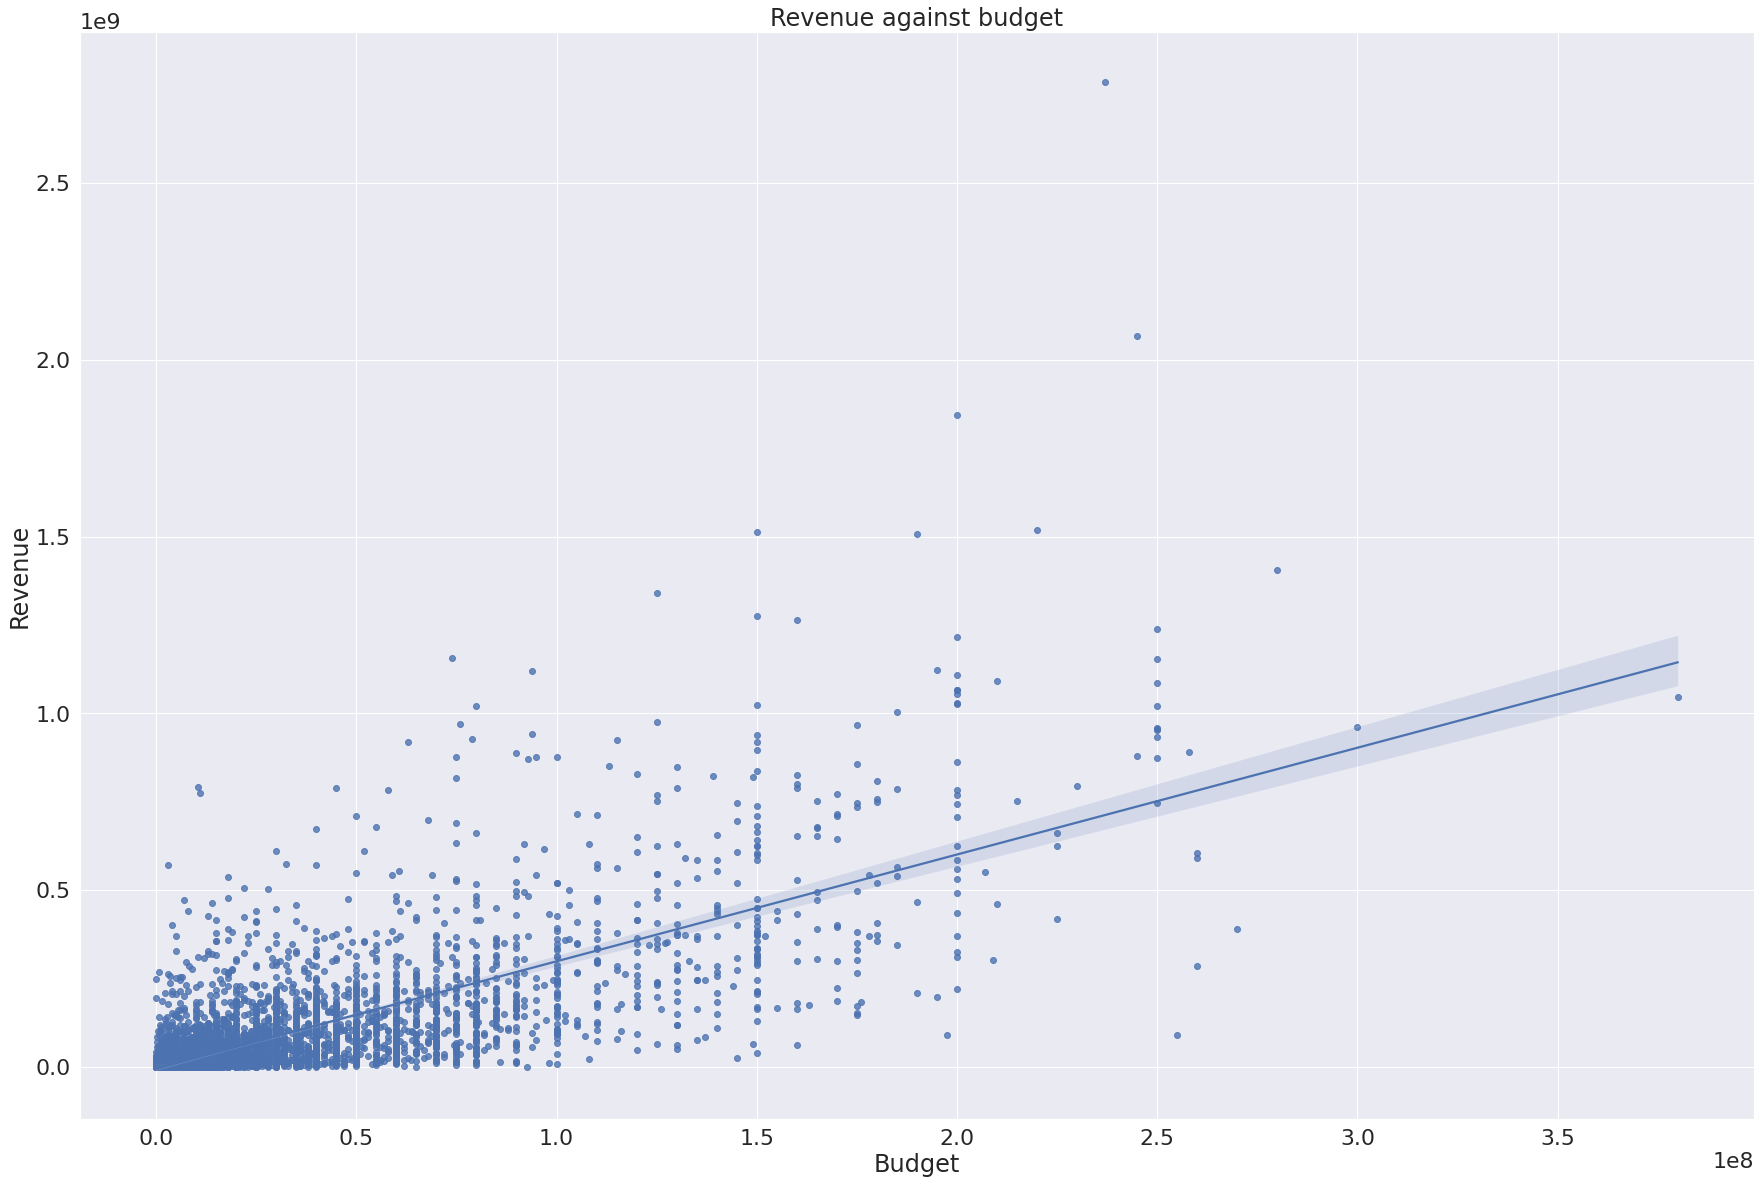

In [ ]:
ax = sns.regplot(x = df['budget'], y = df['revenue'])
ax.set(xlabel = 'Budget', ylabel = 'Revenue', title = 'Revenue against budget')
ax.plot()

We find that in general, there tends to be a positive relationship between budget and revenue. This means that when the budget for a movie increases, it tends to generate more revenue. However, there are many outliers in this data, even though the line of best fit indicates a positive trend.

[]

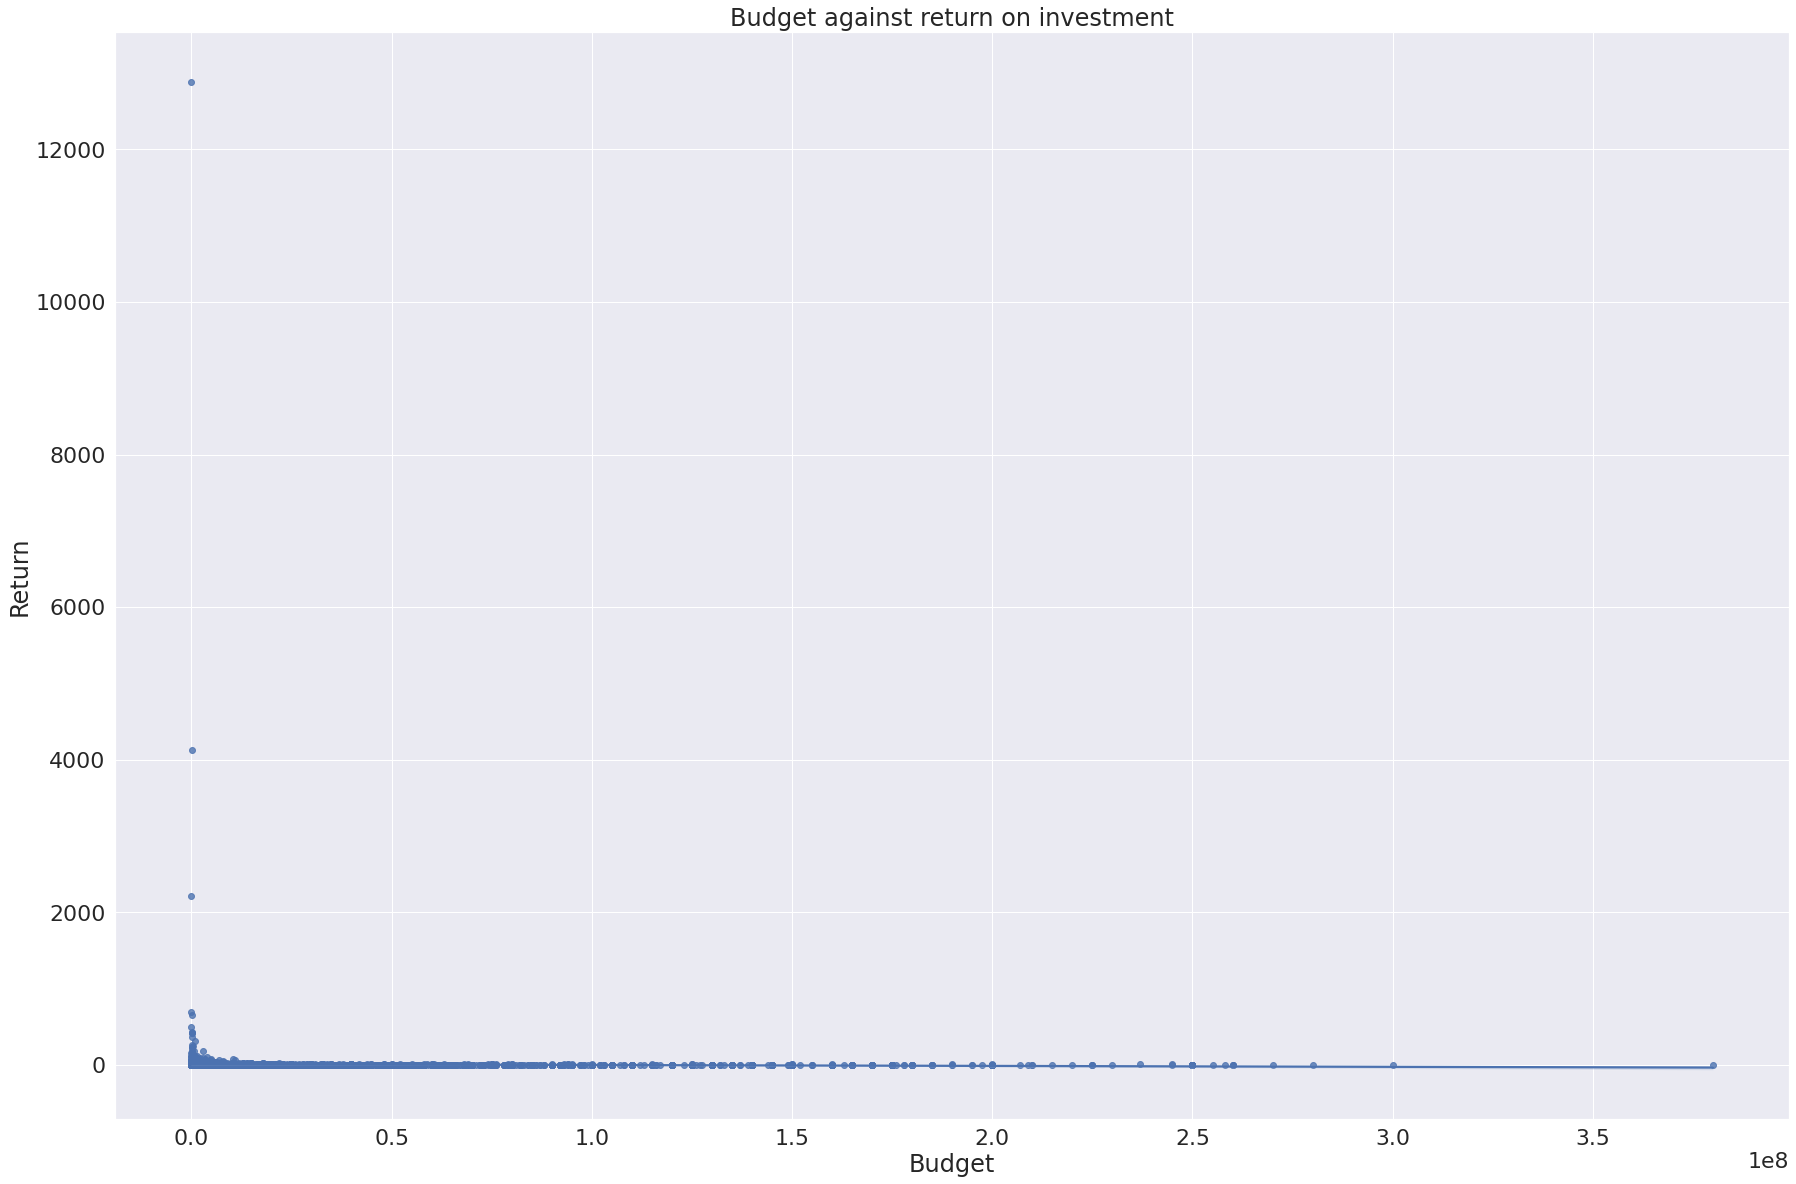

In [ ]:
ax = sns.regplot(x = df['budget'], y = df['return'])
ax.set(xlabel = 'Budget', ylabel = 'Return', title = 'Budget against return on investment')
ax.plot()

We plot the budget versus the return. Although the graph indicates no return, this actually is useful since return is comprised of Revenue - Budget. Thus, the graph indicates that profit of the movie does not actually depend on budget, since profits are small as a result of the general results that movies with higher revenues tend to have higher budgets. This means that when scaled, profit is not reliant on the budget. However, there are a couple of significantly large outliers in our data that might effect the findings of this graph.

[]

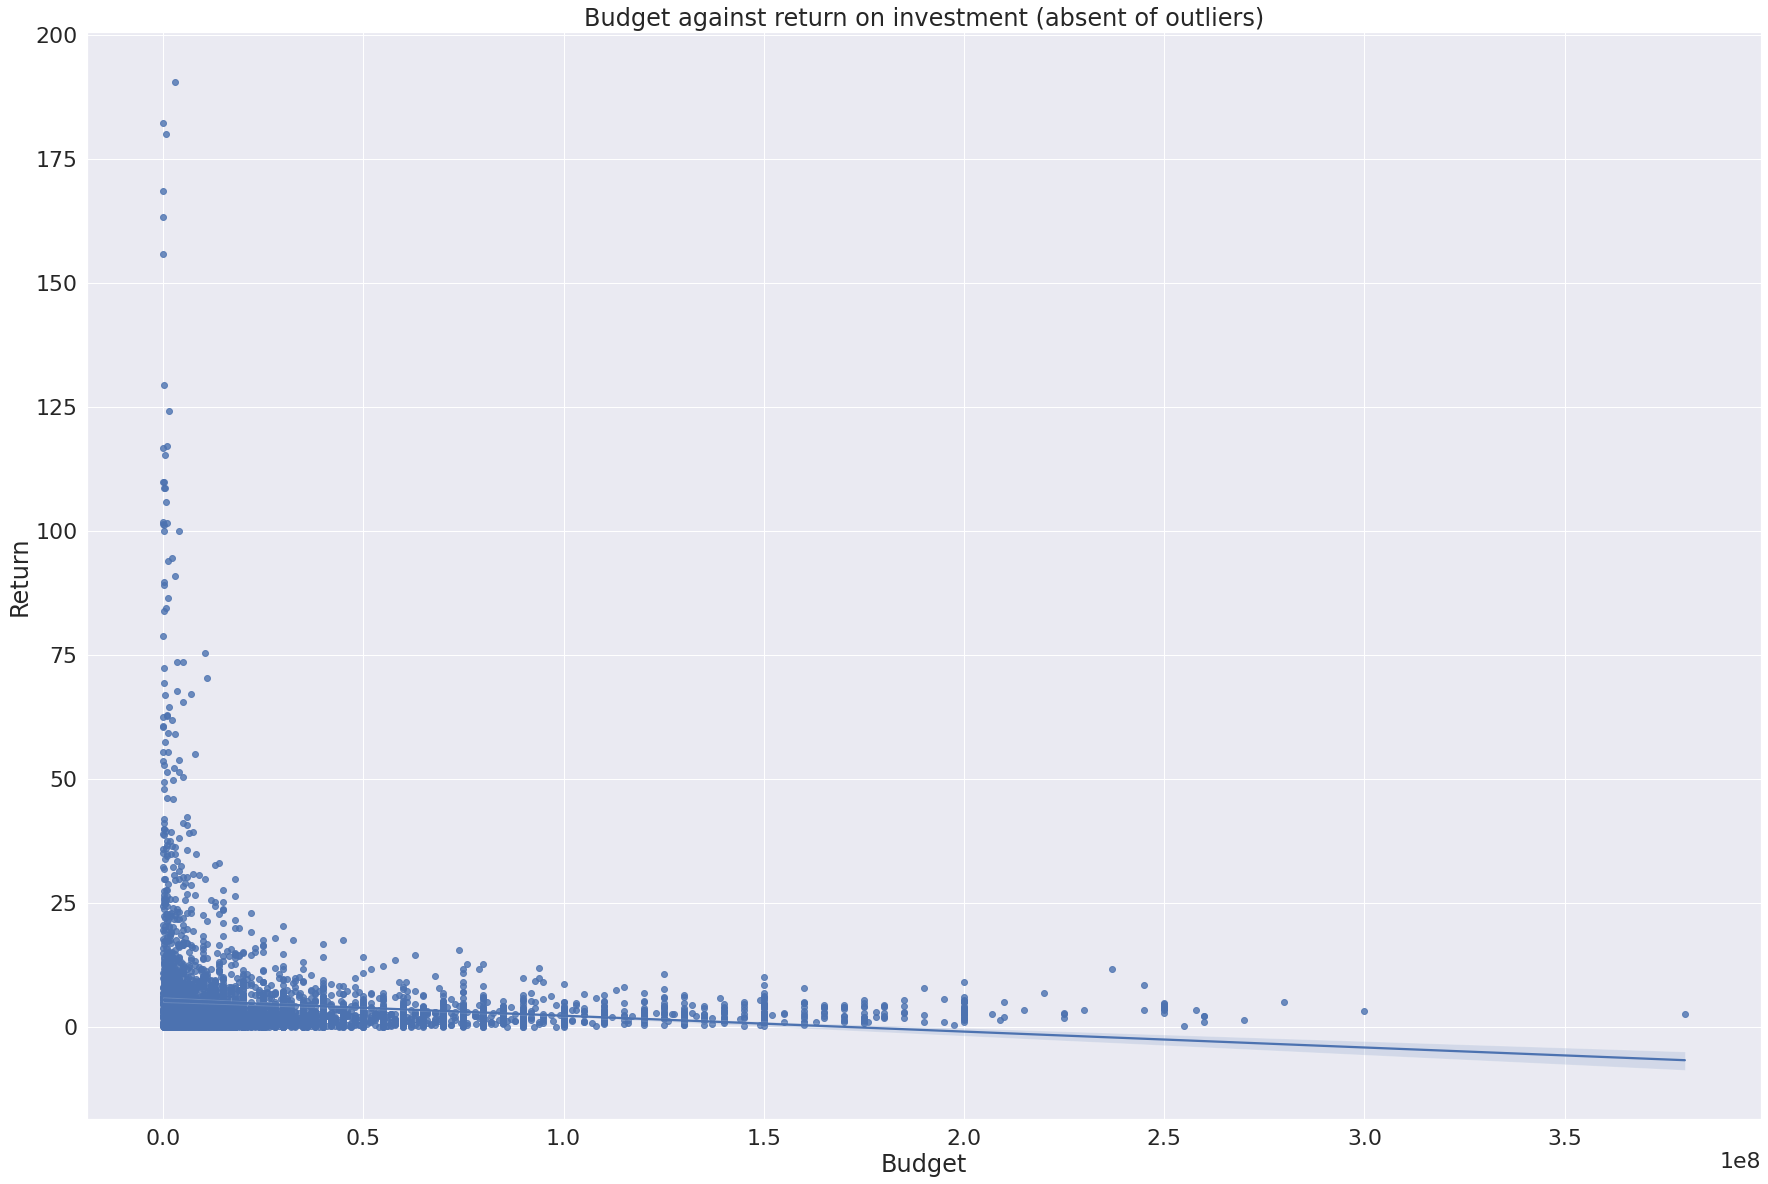

In [ ]:
ax = sns.regplot(x = df[df['return'] < 200]['budget'], y = df[df['return'] < 200]['return'])
ax.set(xlabel = 'Budget', ylabel = 'Return', title = 'Budget against return on investment (absent of outliers)')
ax.plot()

After removing the outliers we identified earlier, the scale of the graph is more legible. However, the line of best fit here actually indicates a slight negative trend. This means that as budgets increase, the profits actually tends to decrease. Intuitively, this means that movies with larger budgets will struggle to generate a profit due to needing to make larger revenues to breakeven.

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})
sns.set_palette("pastel")
sns.set(font_scale=2)

[]

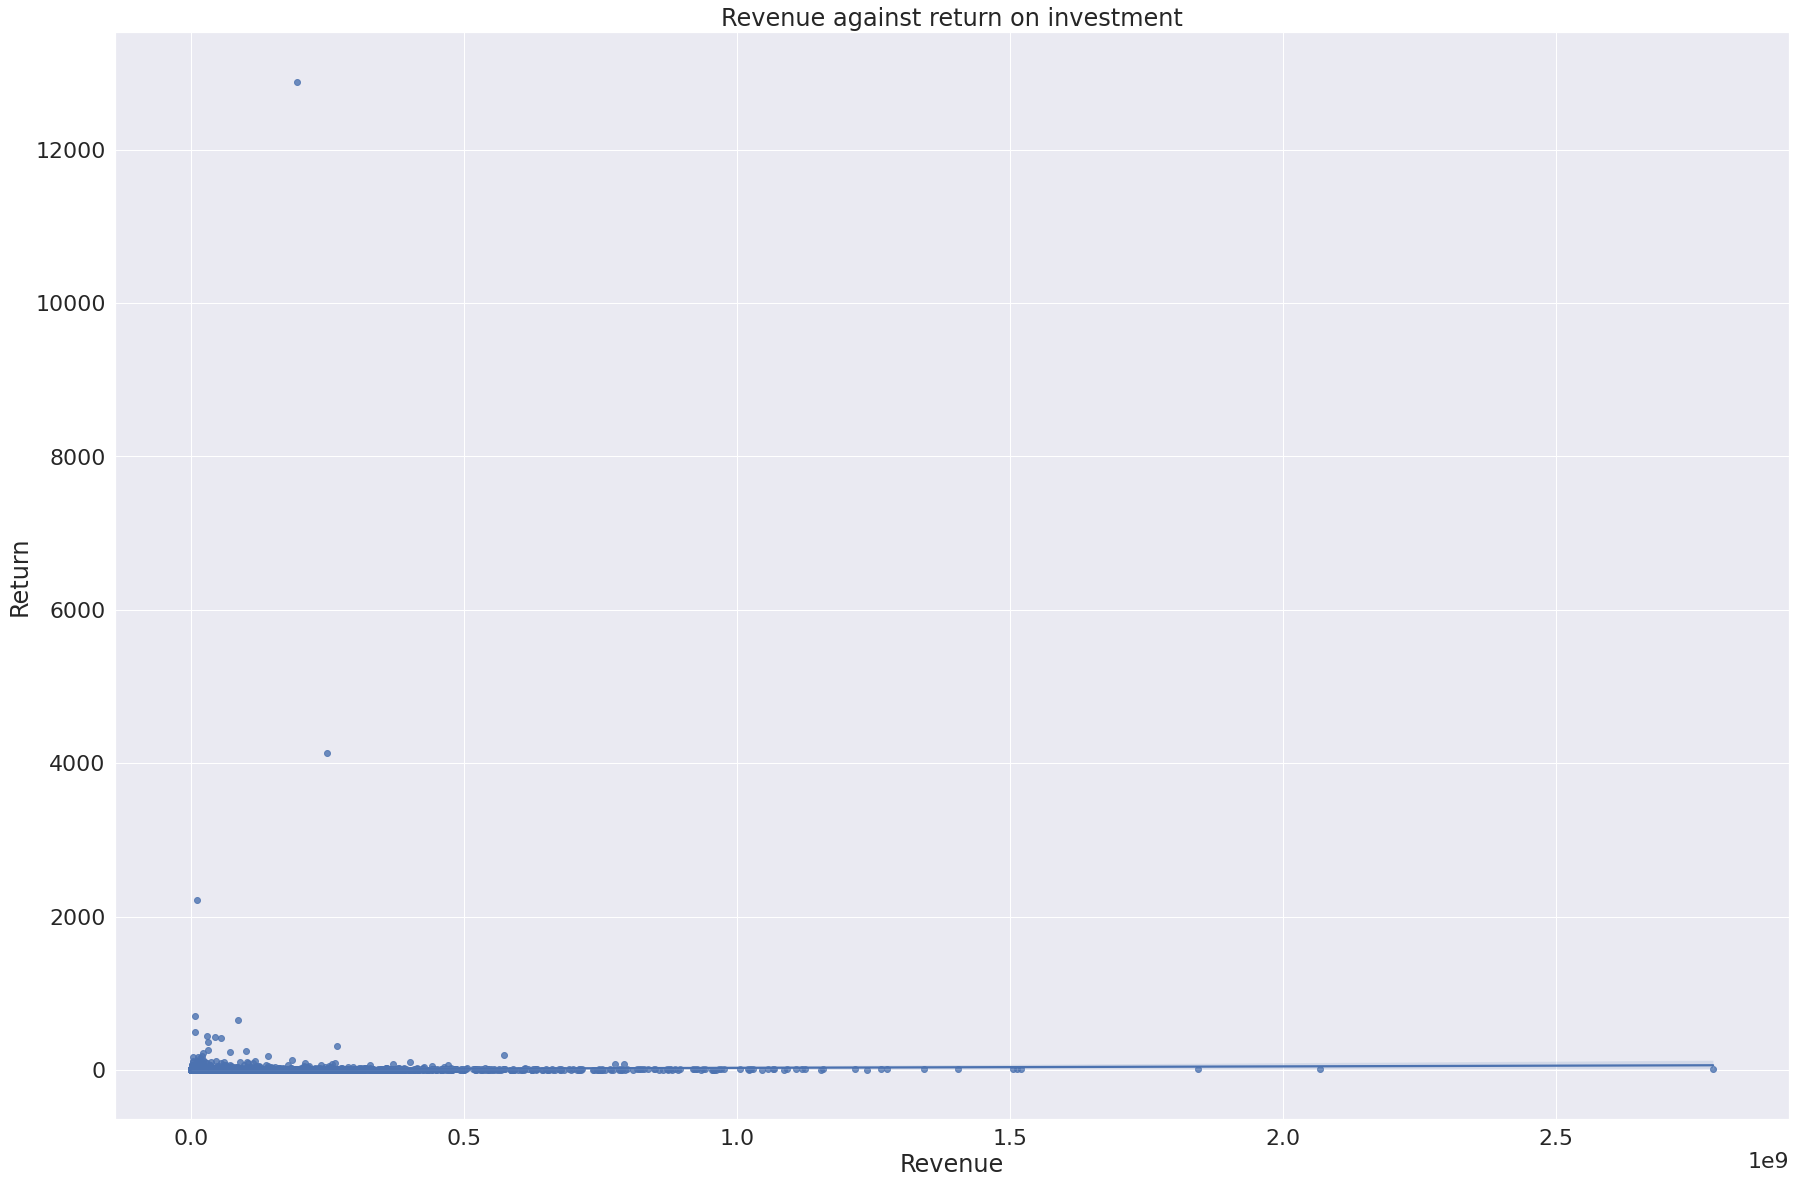

In [ ]:
ax = sns.regplot(x = df['revenue'], y = df['return'])
ax.set(xlabel = 'Revenue', ylabel = 'Return', title = 'Revenue against return on investment')
ax.plot()

When plotting revenue against returns, we see that there is again no correlation. However, as before, the presense of large outliers in returns makes it difficult to accurately gauge any effect present.

[]

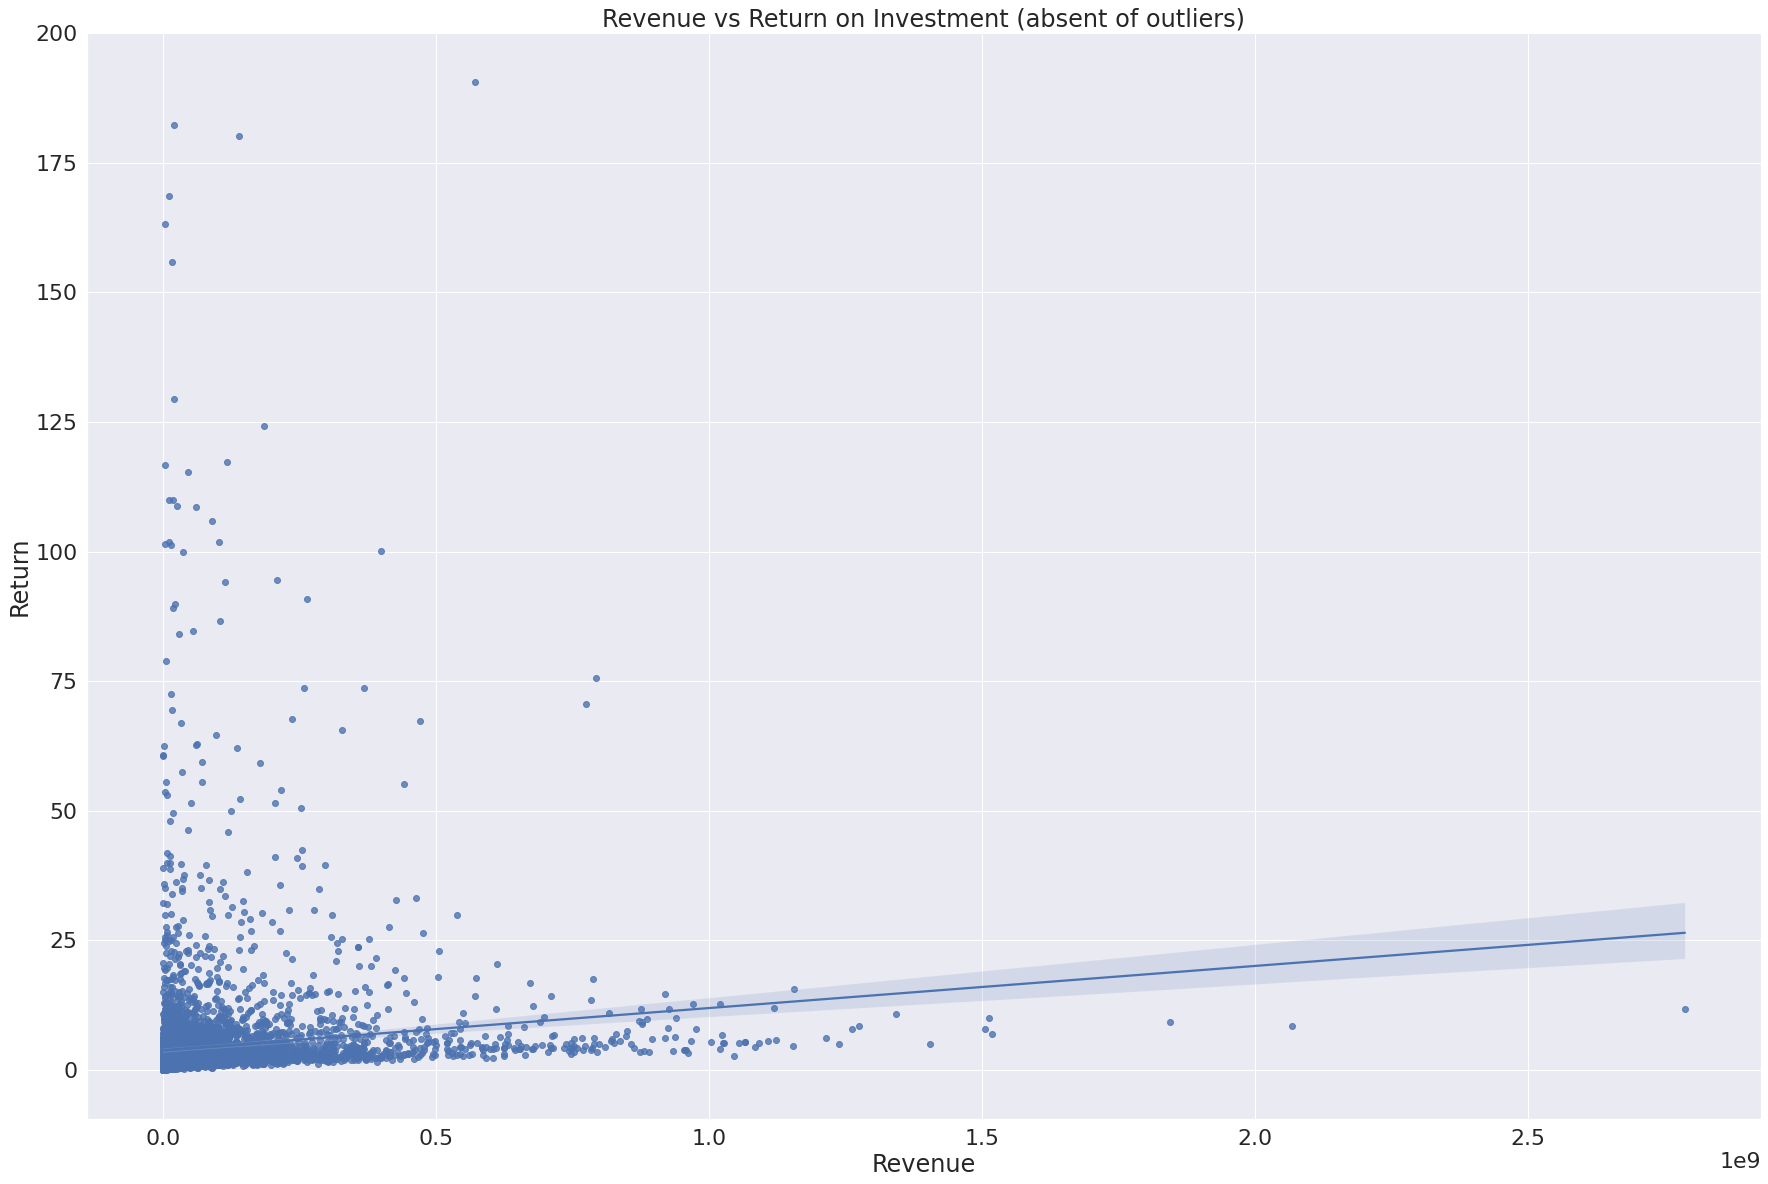

In [ ]:
ax = sns.regplot(x = df[df['return'] < 200]['revenue'], y = df[df['return'] < 200]['return'])
ax.set(xlabel = 'Revenue', ylabel = 'Return', title = 'Revenue vs Return on Investment (absent of outliers)')
ax.plot()

After accounting for outliers, we see that there is a positive correlation between revenue and return. As with budget, this makes sense intuitively. Since return is comprised of Revenue - Budget, the higher revenue a movie has, the more profits it will earn.

[]

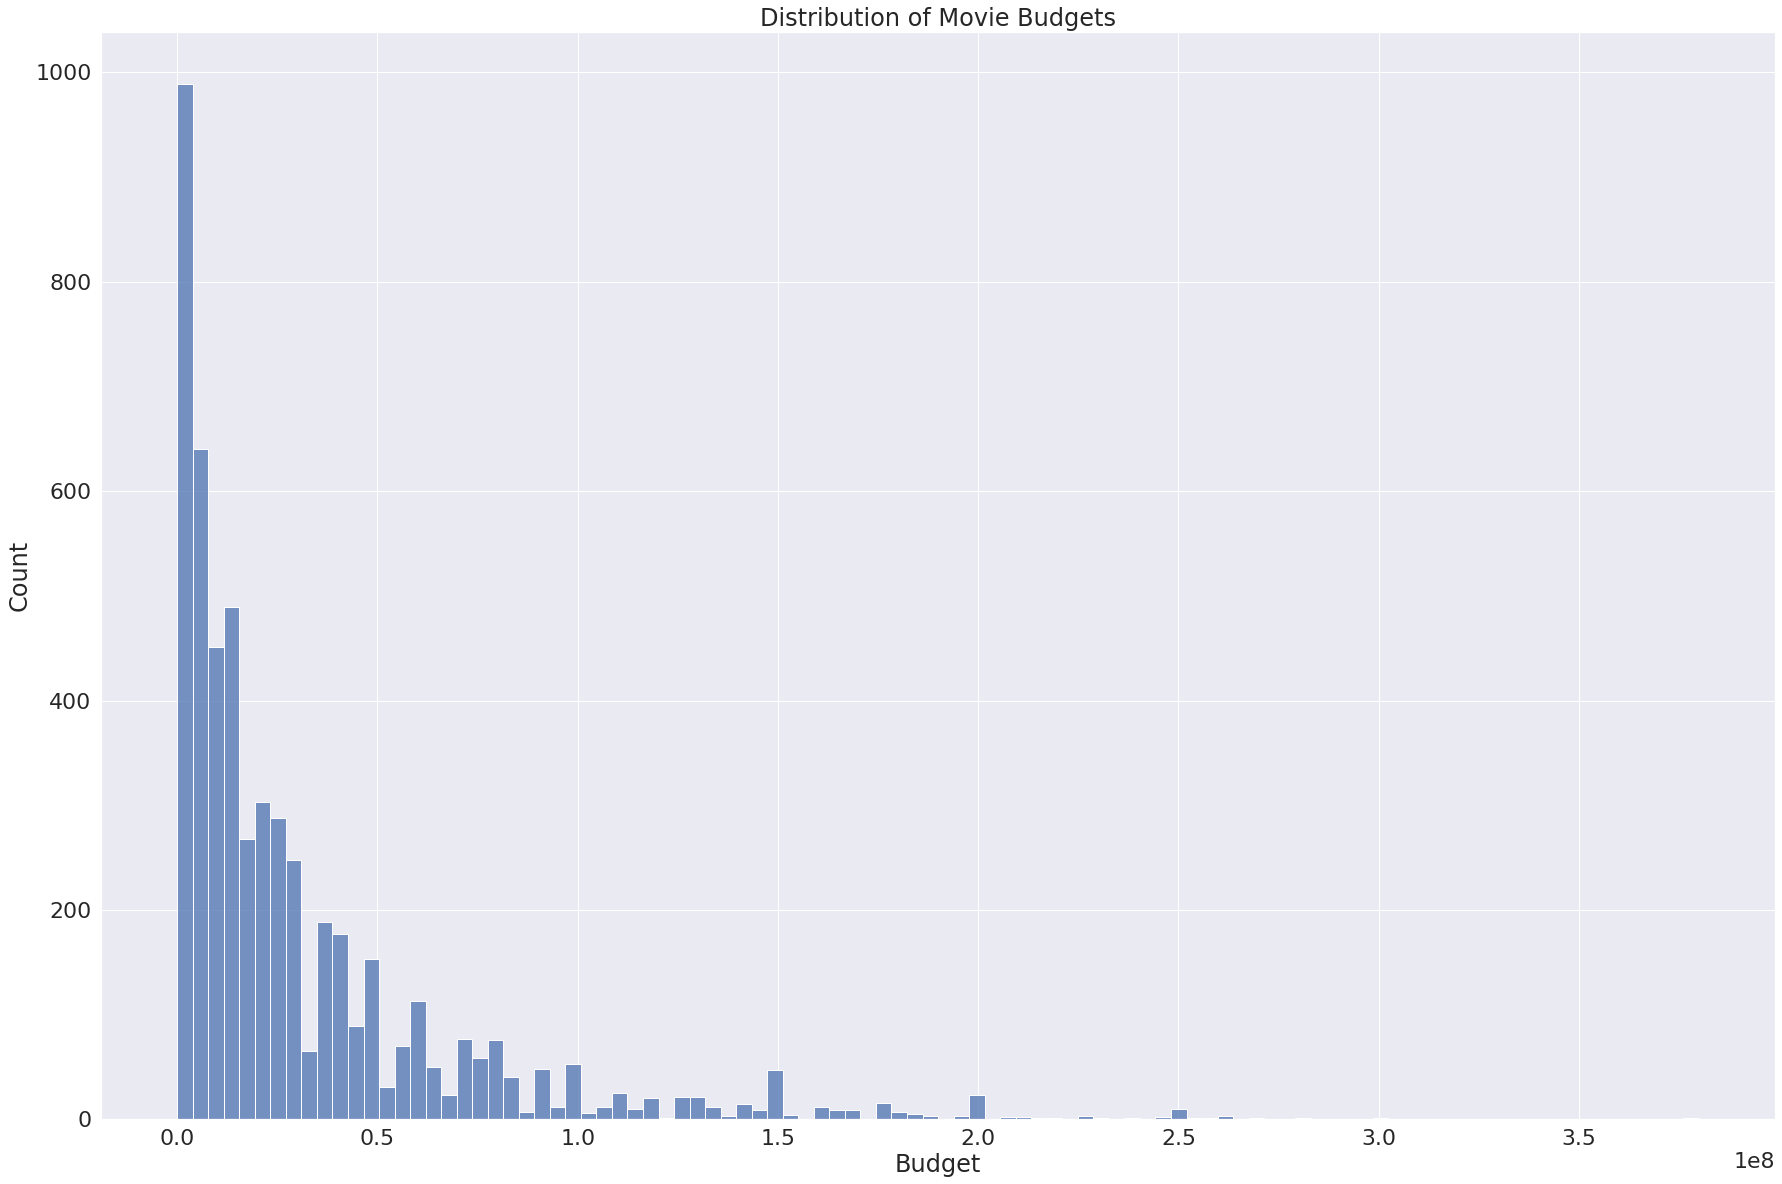

In [ ]:
ax = sns.histplot(x = df['budget'])
ax.set(xlabel = 'Budget', ylabel = 'Count', title = 'Distribution of Movie Budgets')
ax.plot()

When looking at the distribution of budgets for different movies, we see that there are actually more movies with lower budgets. This means that in our data, there are more movies that cost less to produce.

[]

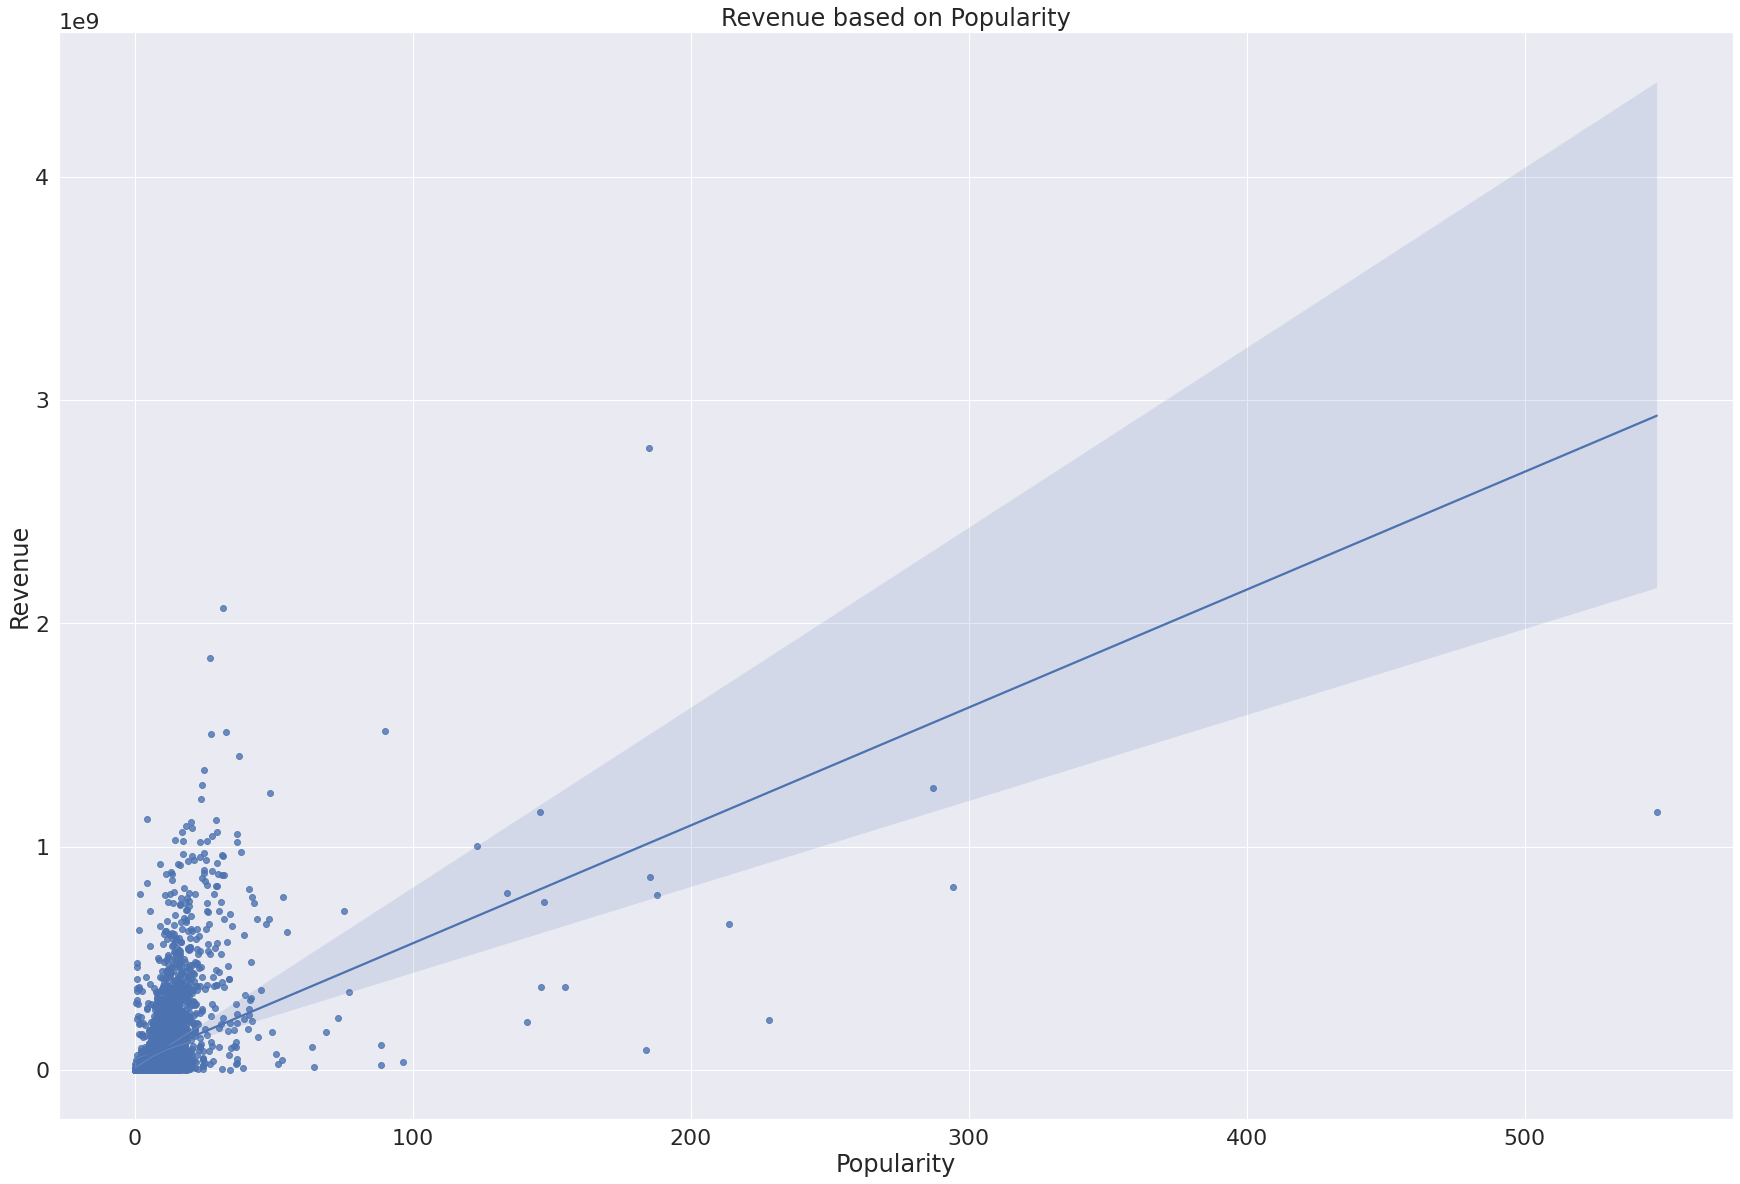

In [ ]:
ax = sns.regplot(x = df['popularity'], y = df['revenue'])
ax.set(xlabel = 'Popularity', ylabel = 'Revenue', title = 'Revenue based on Popularity')
ax.plot()

In general, there is a positive correlation between popularity and revenue. However, we also obtained the confidence interval for this plot. The large confidence interval indicates that the linear relationship that we found may not actually fit the data as accurately. This is evident from the distribution of points as well. We see that there is a high concentration of data at the origin.

[]

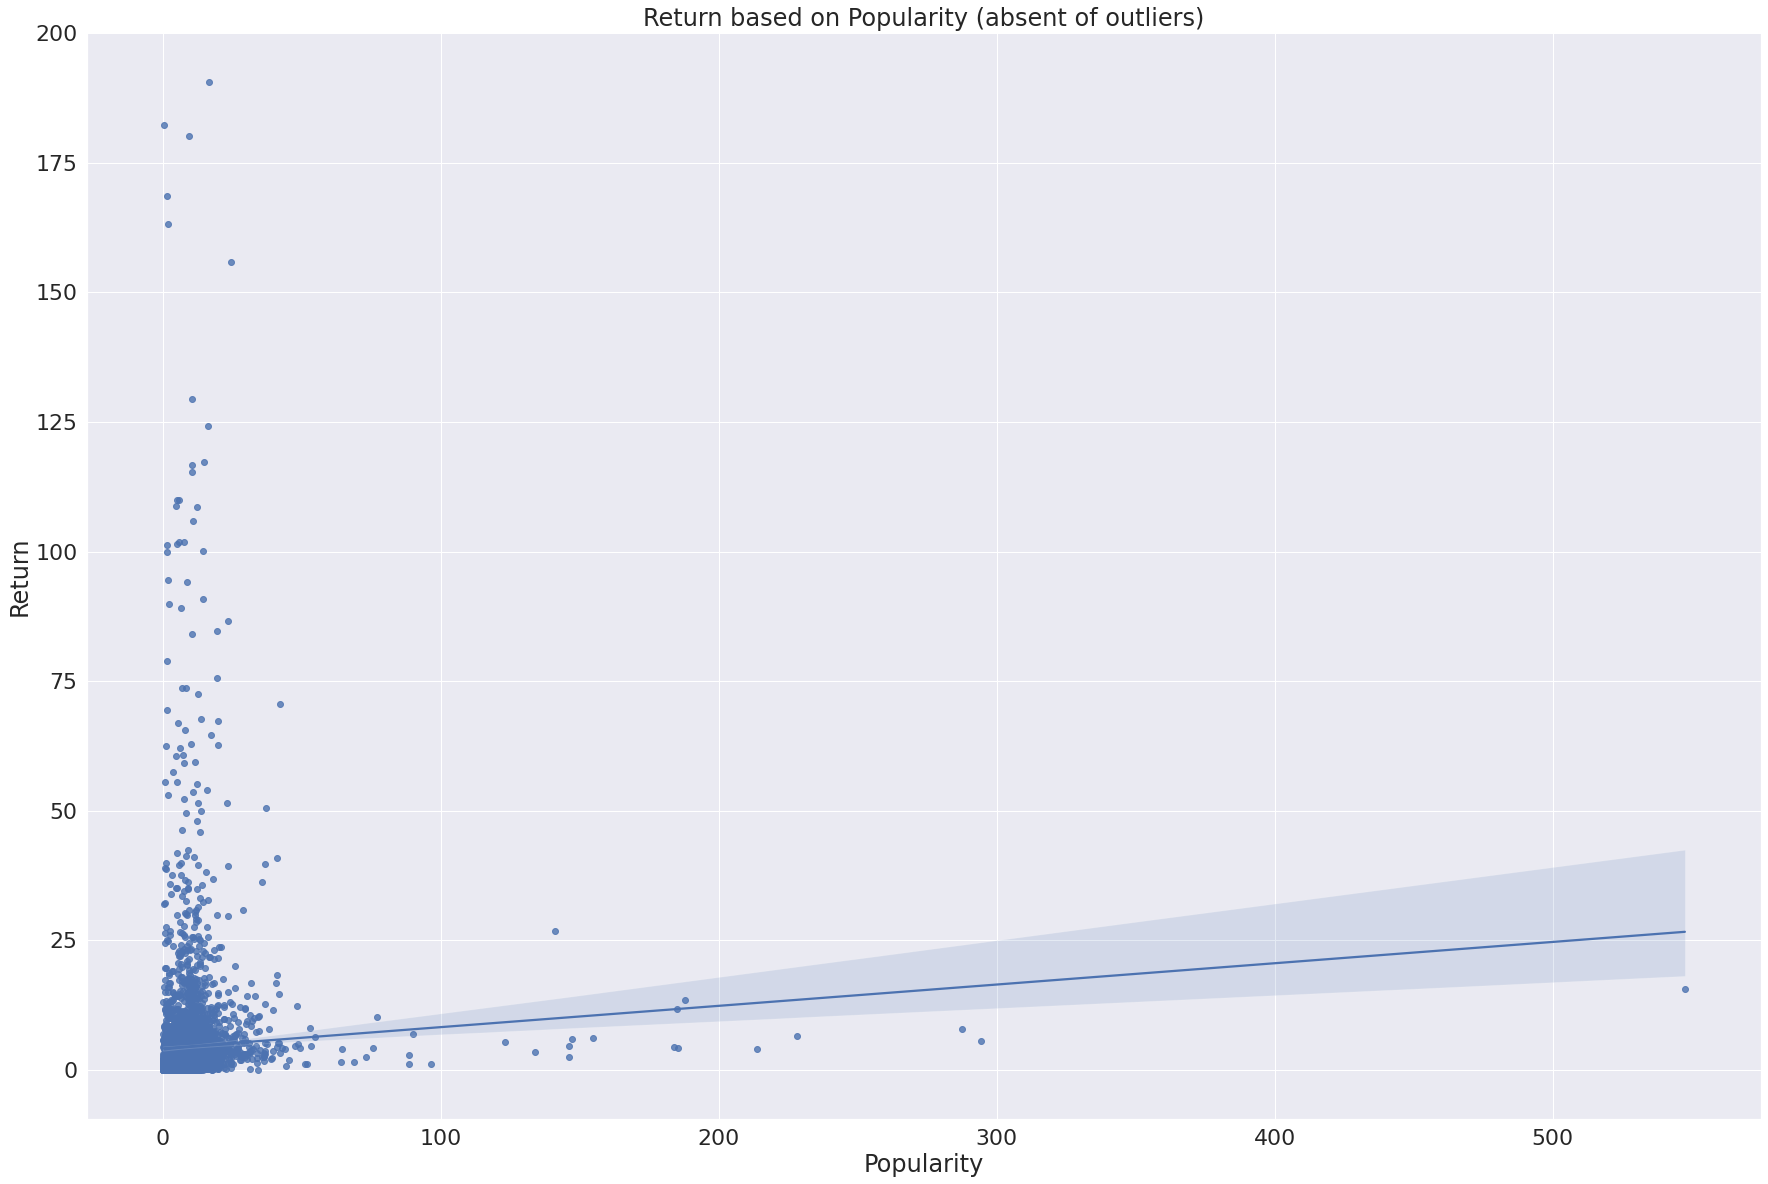

In [ ]:
ax = sns.regplot(x = df[df['return'] < 200]['popularity'], y = df[df['return'] < 200]['return'])
ax.set(xlabel = 'Popularity', ylabel = 'Return', title = 'Return based on Popularity (absent of outliers)')
ax.plot()

Running the returns based on popularity, however, gave better scaled results. There is still a positive correlation between popularity and returns, but the confidence interval is much smaller, indicating that this might be a more accurate representation of our data. This makes sense since returns are adjusted for the budget of the data, giving purely the profits from the data.

[]

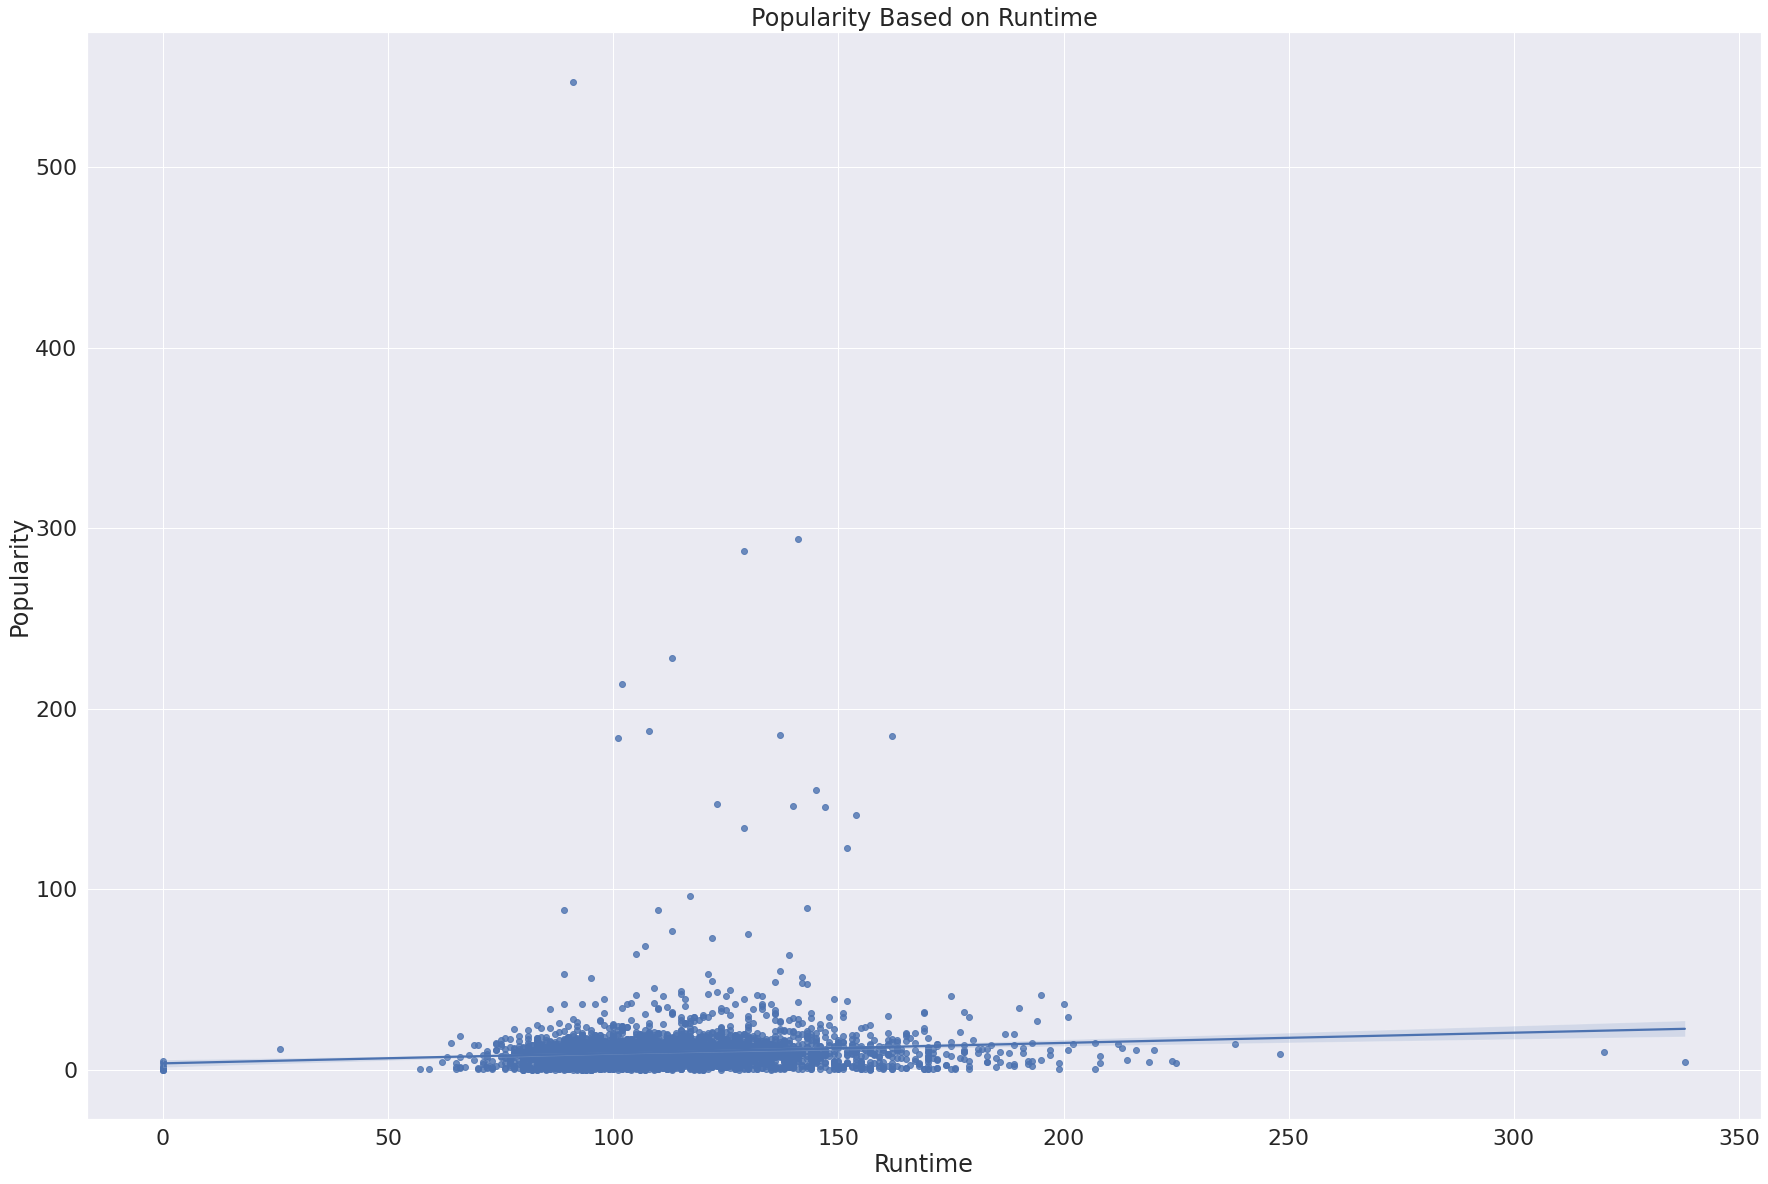

In [ ]:
ax = sns.regplot(x = df['runtime'], y = df['popularity'])
ax.set(xlabel = 'Runtime', ylabel = 'Popularity', title = 'Popularity Based on Runtime')
ax.plot()

We plot the runtime versus popularity. There is little effect found between these two variables. However, it is interesting to note that the majority of the movies are in the 75-150 minute range, with varying degrees of popularity. In addition, movies that are too long or too short tend to be less popular.

[]

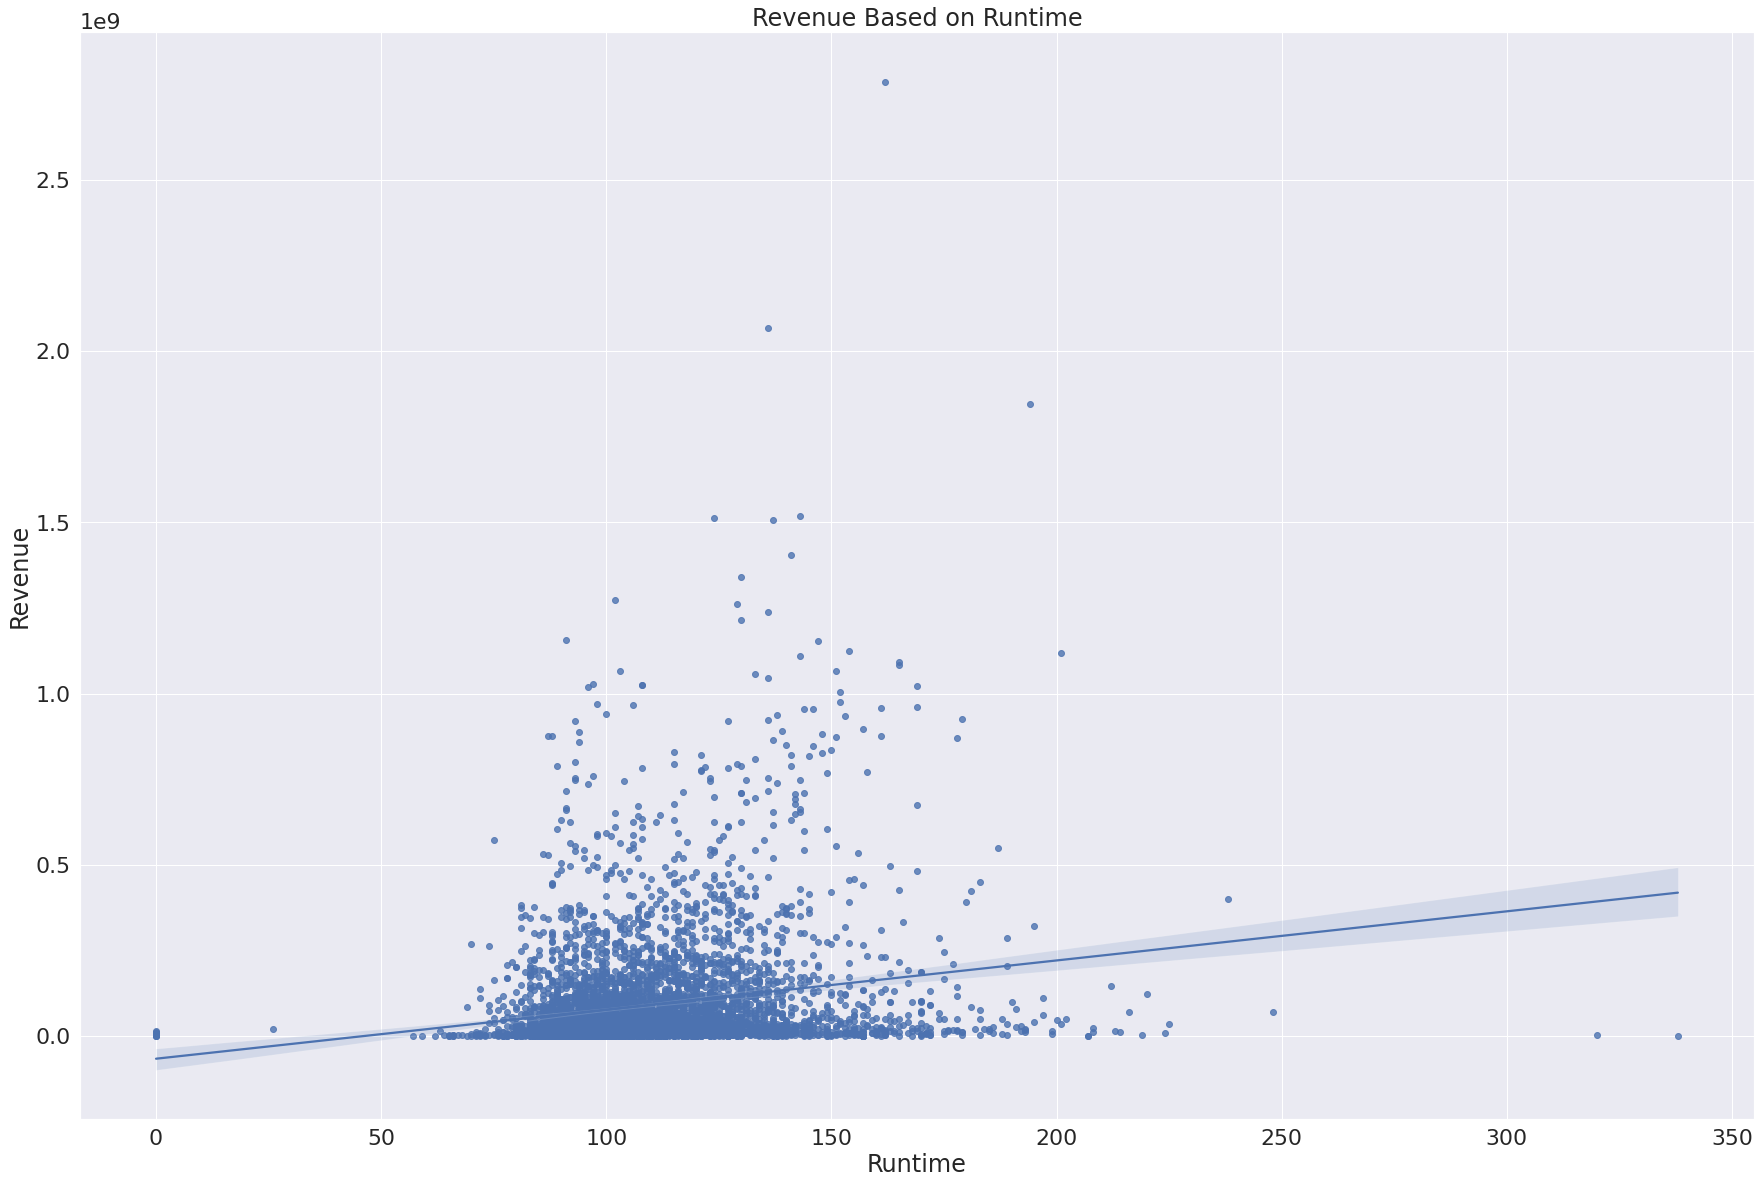

In [ ]:
ax = sns.regplot(x = df['runtime'], y = df['revenue'])
ax.set(xlabel = 'Runtime', ylabel = 'Revenue', title = 'Revenue Based on Runtime')
ax.plot()

When plotting runtime versus revenue however, we see that there is a positive effect. This may differ from popularity because many movies will generate revenue, even if their popularity is not high, since these two factors are independent of each other.

[]

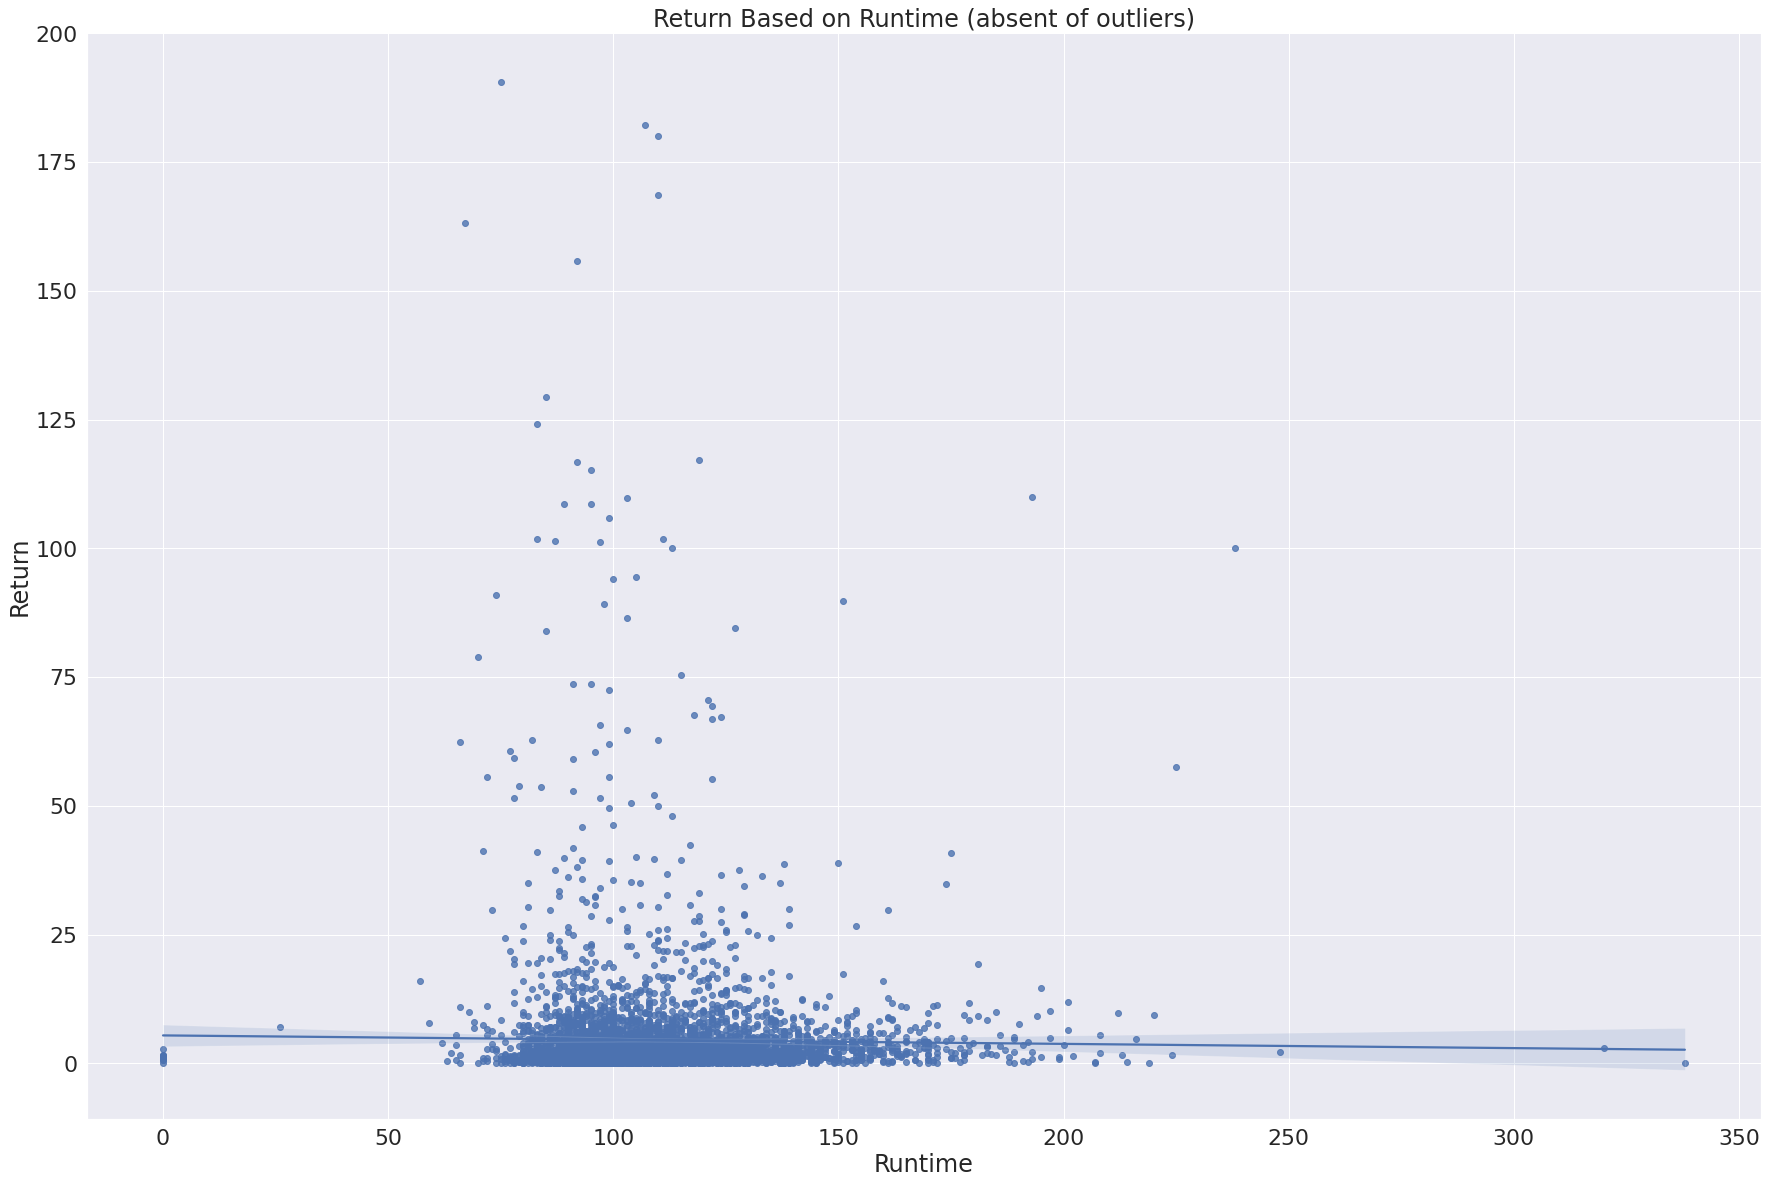

In [ ]:
ax = sns.regplot(x = df[df['return'] < 200]['runtime'], y = df[df['return'] < 200]['return'])
ax.set(xlabel = 'Runtime', ylabel = 'Return', title = 'Return Based on Runtime (absent of outliers)')
ax.plot()

When plotting runtime against return, however, we observe that there is actually a negative trend. As we identified earlier, this might be due to longer movies costing more to produce. Thus, the longer a movie is, the higher its budget is, leading to negative returns.

[]

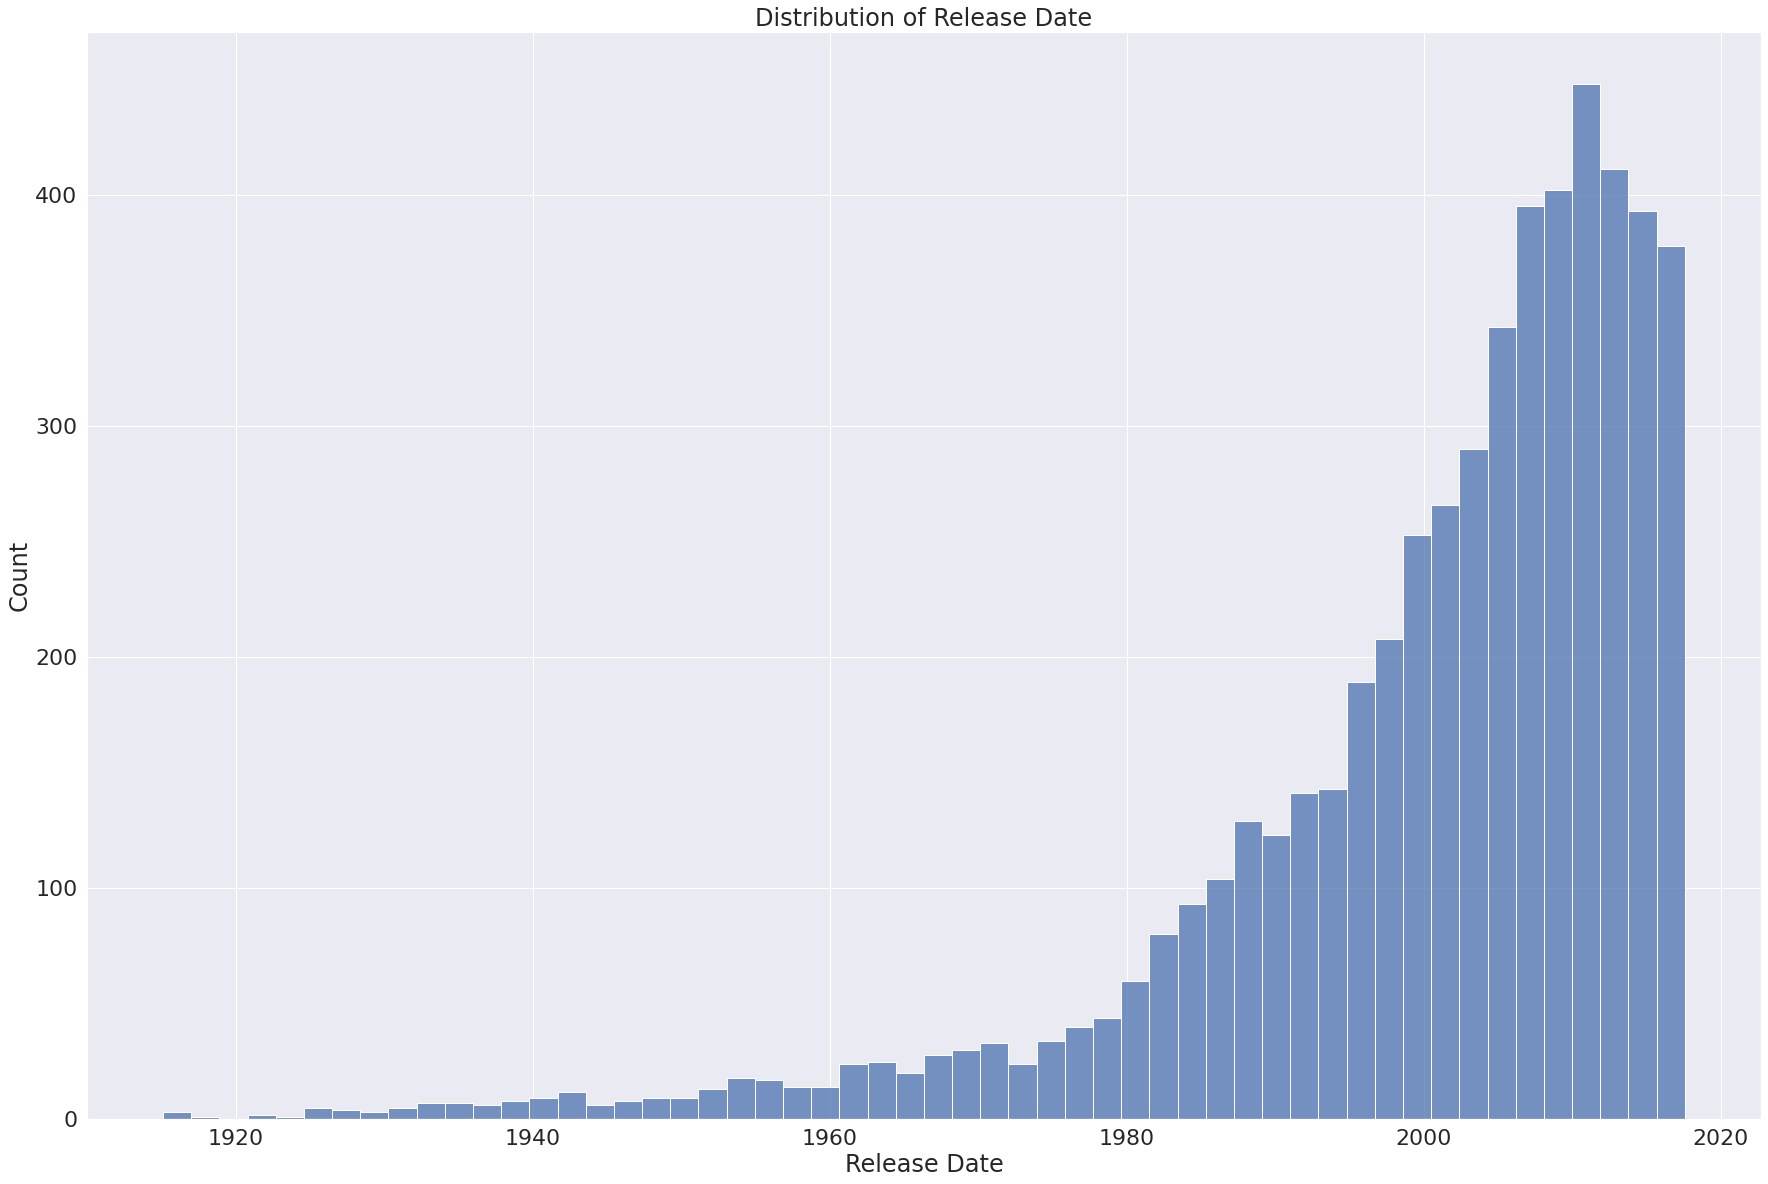

In [ ]:
ax = sns.histplot(x = df['release_date'])
ax.set(xlabel = 'Release Date', ylabel = 'Count', title = 'Distribution of Release Date')
ax.plot()

Next, we observe the general timeframe for which the movies we are analyzing. We find that many of the movies are produced in more recent years, evidently due to better data collection. Thus, it may not be wise to use release year as an indicator.

[]

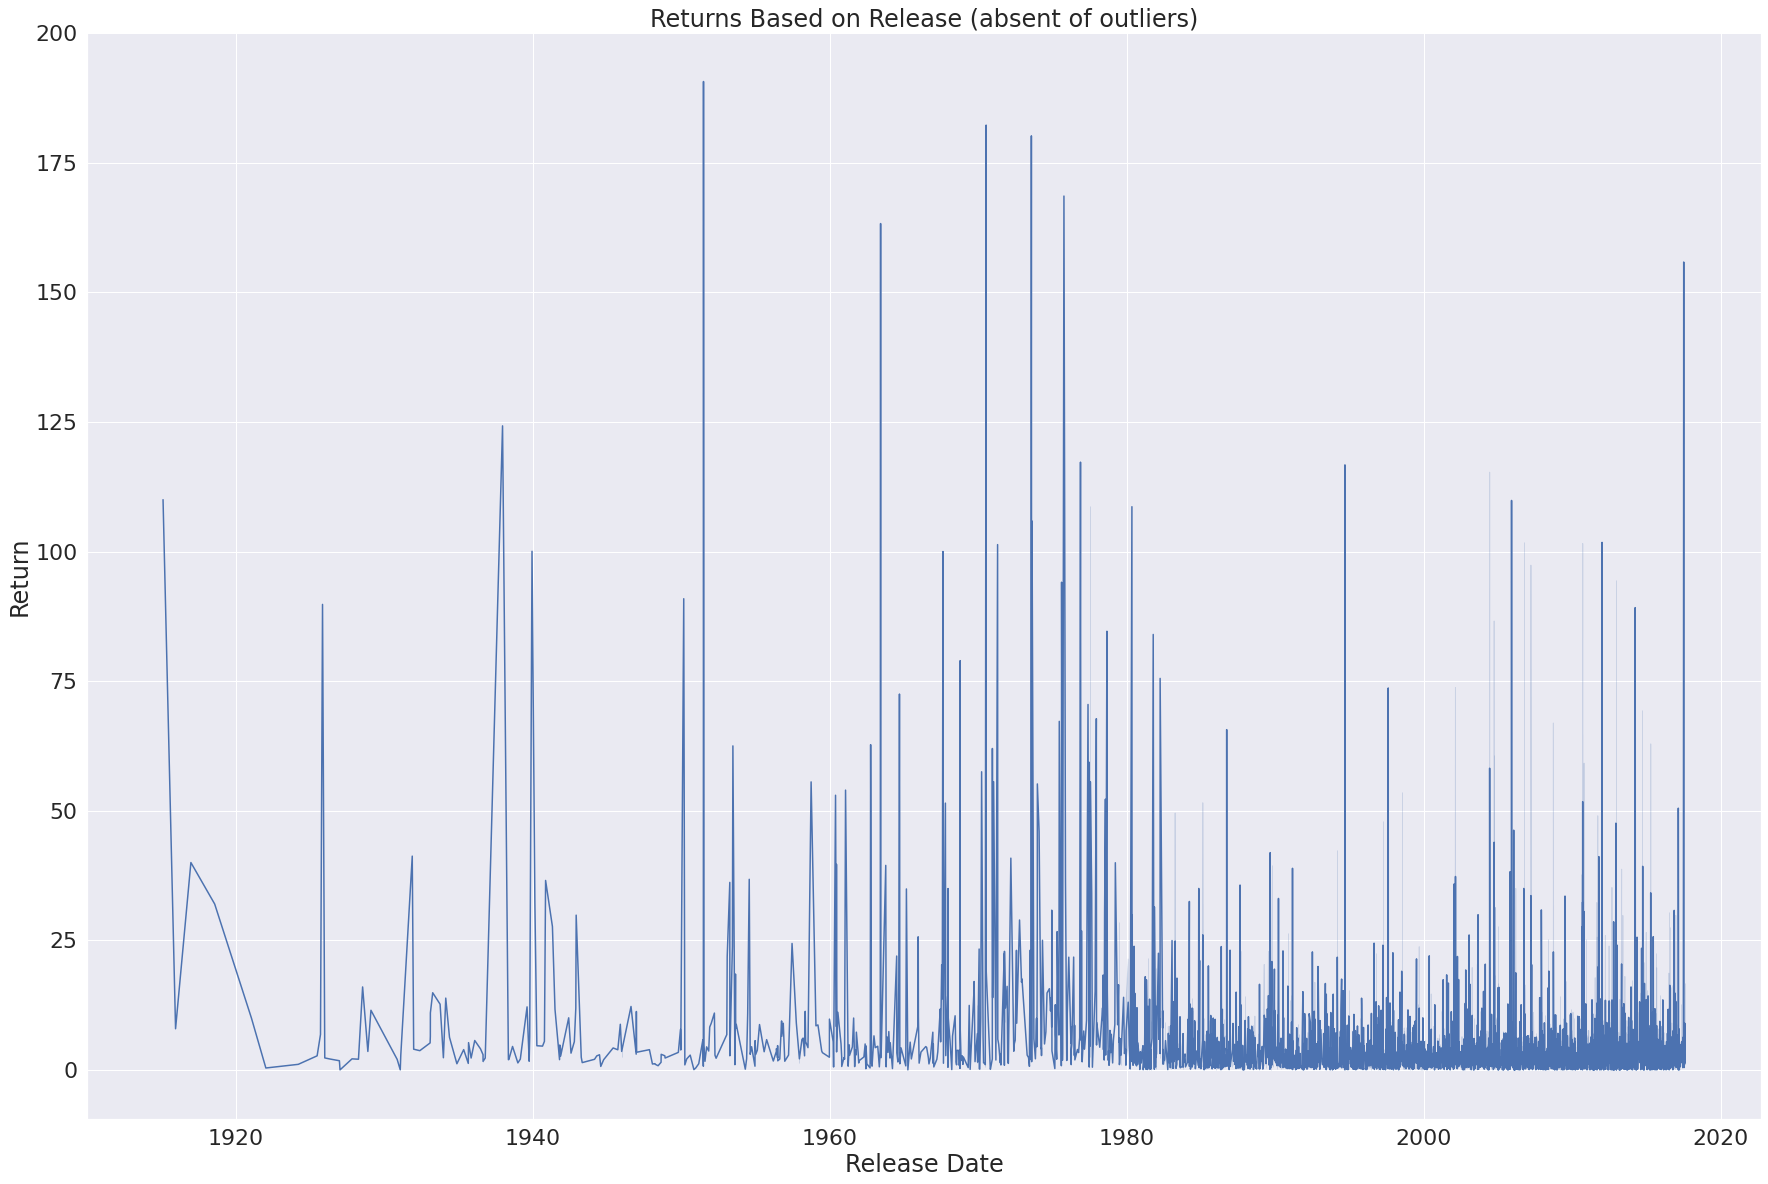

In [ ]:
ax = sns.lineplot(x = df[df['return'] < 200]['release_date'], y = df[df['return'] < 200]['return'])
ax.set(xlabel = 'Release Date', ylabel = 'Return', title = 'Returns Based on Release (absent of outliers)')
ax.plot()

Here, we plot the differences in returns for movies based on their release year. The graph indicates that the return on data appears to be stationary. We do not need to adjust for inflation in this case either since we are purely finding the profit, which returns the pure difference in values, already adjusted.

[]

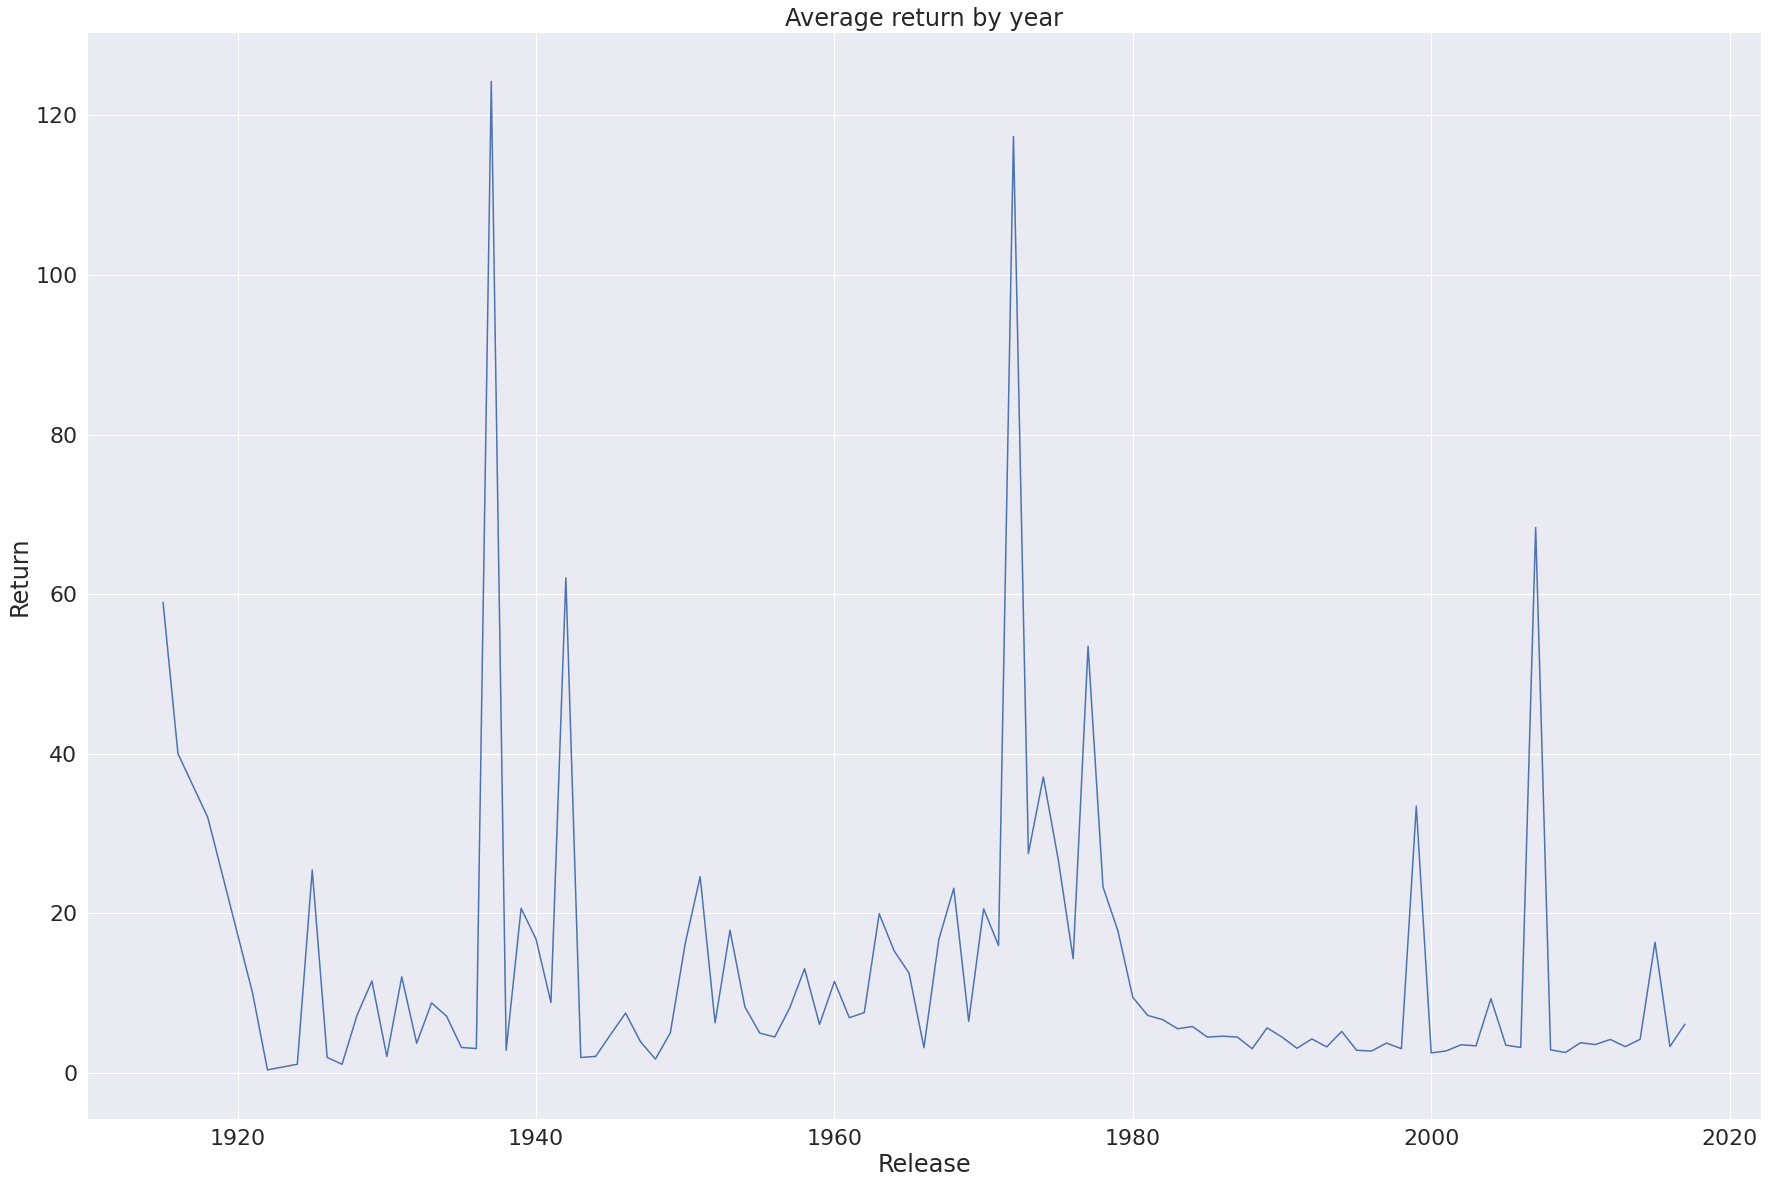

In [ ]:
df['year'] = pd.DatetimeIndex(df['release_date']).year
years = df.groupby('year', as_index = False).mean()
ax = sns.lineplot(x = years['year'], y = years['return'])
ax.set(xlabel = 'Release', ylabel = 'Return', title = 'Average return by year')
ax.plot()

Here, we aggregated by year. We find the average return by year for movies. Although there are some peaks and troughs, there is actually very little we can derive from this graph directly since each year's movie composition is likely different.

[]

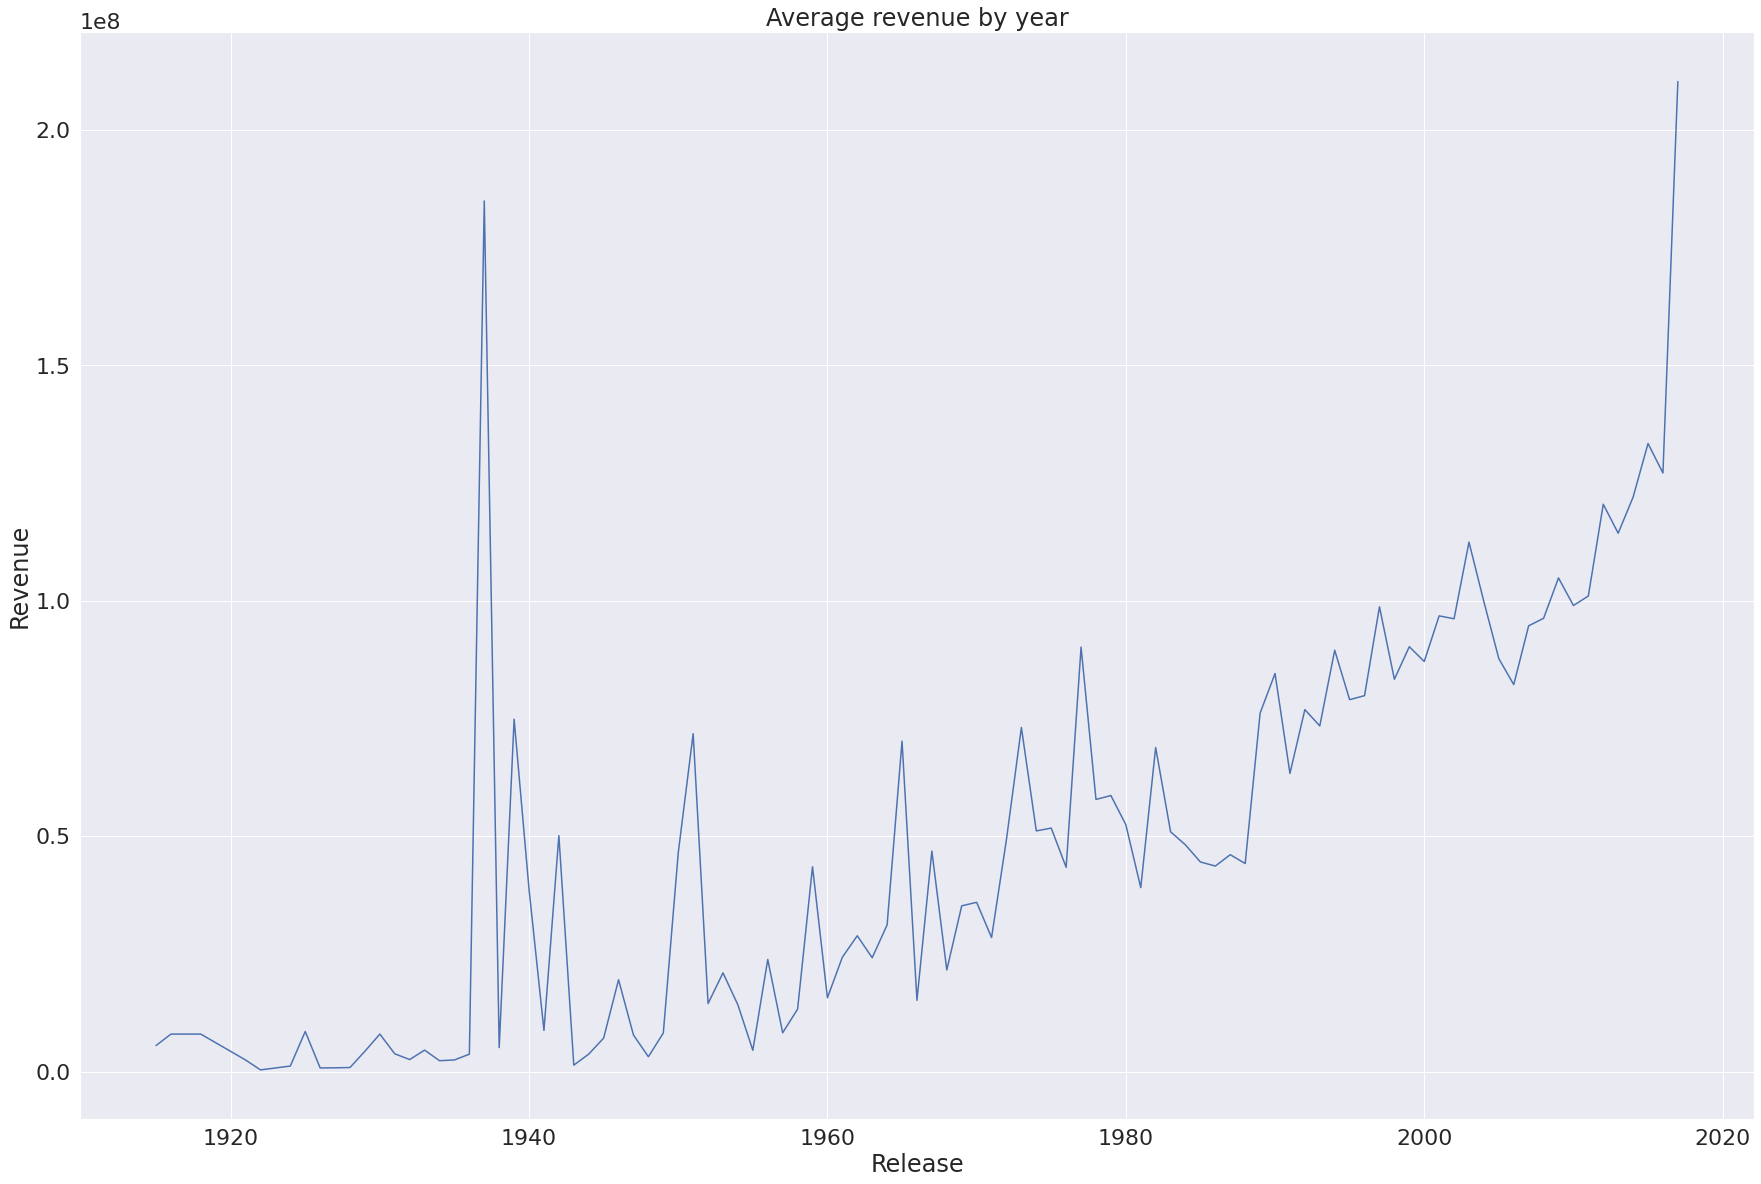

In [ ]:
df['year'] = pd.DatetimeIndex(df['release_date']).year
years = df.groupby('year', as_index = False).mean()
ax = sns.lineplot(x = years['year'], y = years['revenue'])
ax.set(xlabel = 'Release', ylabel = 'Revenue', title = 'Average revenue by year')
ax.plot()

When plotting revenue by year, we see a large spike in the late 1930s. In a historical context, this is likely due to the Great Depression and economic conditions. However, we see general positive trends in the data, although it tends to fluctuate. In the late 2010s, however, there is a large increase in revenue. However, we must note that revenue in this case, is not adjusted for inflation. Thus, the value of movies and costs are not measured on the same scale.

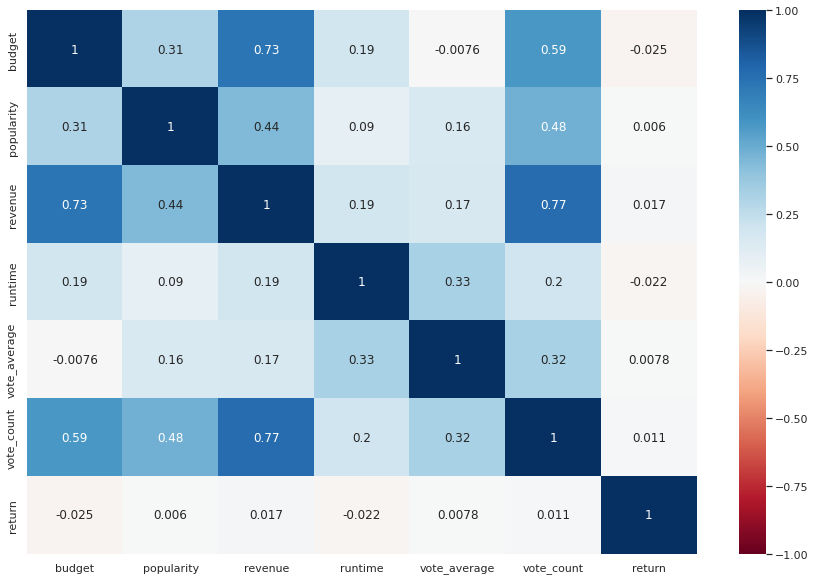

In [ ]:
corr_matrix = df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']].corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, cmap="RdBu",annot=True,vmax = 1, vmin = -1,center = 0)

We can see that budget, revenue, and vote_count are all very correlated with each other. Interestingly, return is not correlated with revenue or budget, so this serves a good variable to predict. We will have to drop either budget or vote_count (vote_count seems like the better candidate to drop) to address this collinearity.

Additionally, we'll also drop revenue since this a variable that can only be realized after the movie release. Also, in a real world application, using this variable would yield results that are not very useful (predicting the future with the future).

Next, let's take a look at the correlation between some relevant features and the output variables.

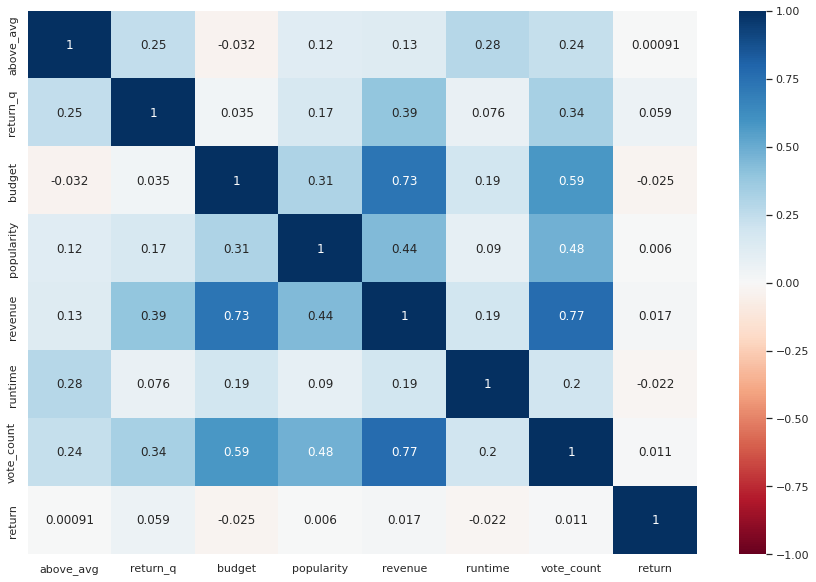

In [ ]:
corr_matrix = df[['above_avg', 'return_q', 'budget', 'popularity', 'revenue', 'runtime', 'vote_count', 'return']].corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, cmap="RdBu",annot=True,vmax = 1, vmin = -1,center = 0)

We see that there tends to be some general correlation between the variables. However, return is evidently not correlated with any other variables.

## Feature Distribution

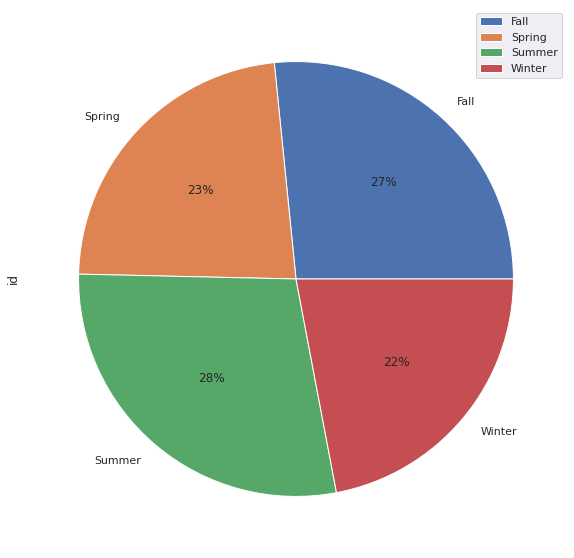

In [ ]:
df['season'] = df['release_date'].apply(get_season)
df.groupby(['season']).count().plot(kind='pie', y = 'id', autopct='%1.0f%%')
df.drop(columns = ['season'], inplace = True)

We see here that the distribution of movies released by season is generally evenly distributed, with summer slightly higher at 28% and winter the lowest at 22%. This means that for our analysis, season of release will be a valid variable and no scaling techniques will be necessary.

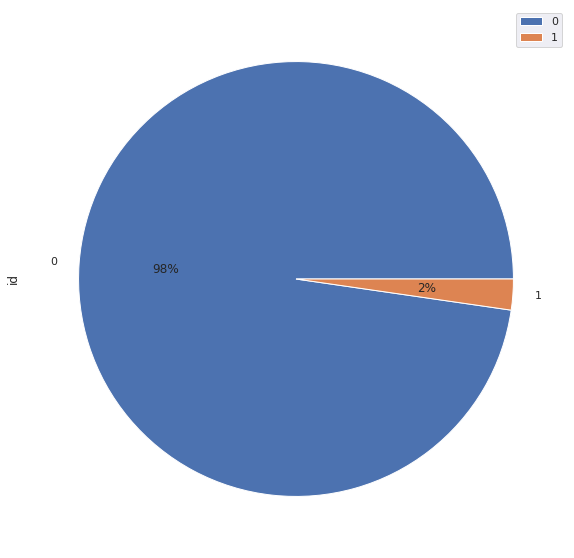

In [ ]:
df.groupby(['top_director']).count().plot(kind='pie', y = 'id', autopct='%1.0f%%')

We then looked at the distribution of whether the movie was produced by a top producer or not. In this case, 0 indicates that is was not, which is 98% of the movies in our dataset. The 1 indicates that the movie was produced by a top producer (2%) of the data. Because this distribution is highly imbalanced, this indicates that it may require resampling techniques to be applied to our data if we wish to use this as an indicator.

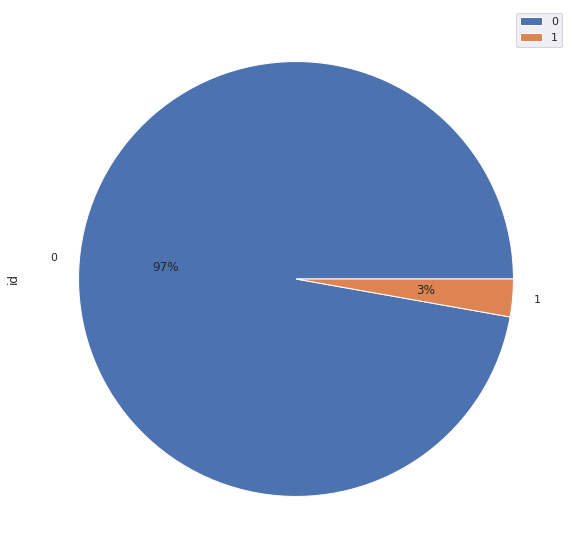

In [ ]:
df.groupby(['top_composer']).count().plot(kind='pie', y = 'id', autopct='%1.0f%%')

Similarly, we looked at the distribution of whether the movie's soundtrack was produced by a top composer or not. In this case, 0 indicates that is was not, which is 97% of the movies in our dataset. The 1 indicates that the movie was produced by a top producer (3%) of the data. Again, because this distribution is highly imbalanced, we may need to consider applying resampling techniques to our data.

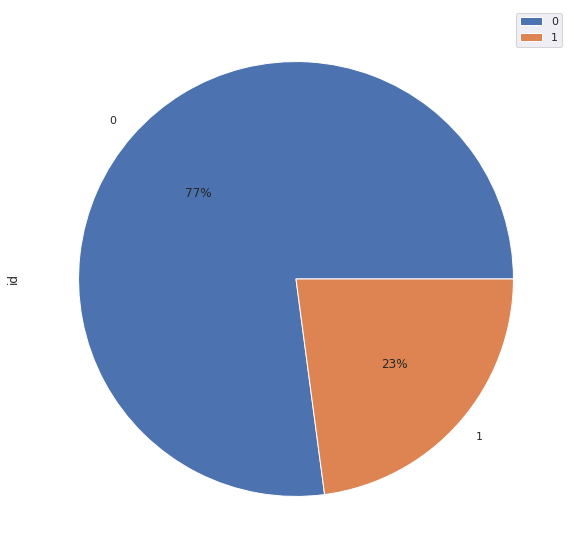

In [ ]:
df.groupby(['series']).count().plot(kind='pie', y = 'id', autopct='%1.0f%%')

This indicator shows whether a movie is part of a series of movies not. Again, the binary 0 or 1 shows this in the chart. We see that 77% of the movies are not part of a series, whereas 23% are. This could be potentially useful in the modeling to determine whether movies that are part of a larger franchise or chain tend to do better.

[]

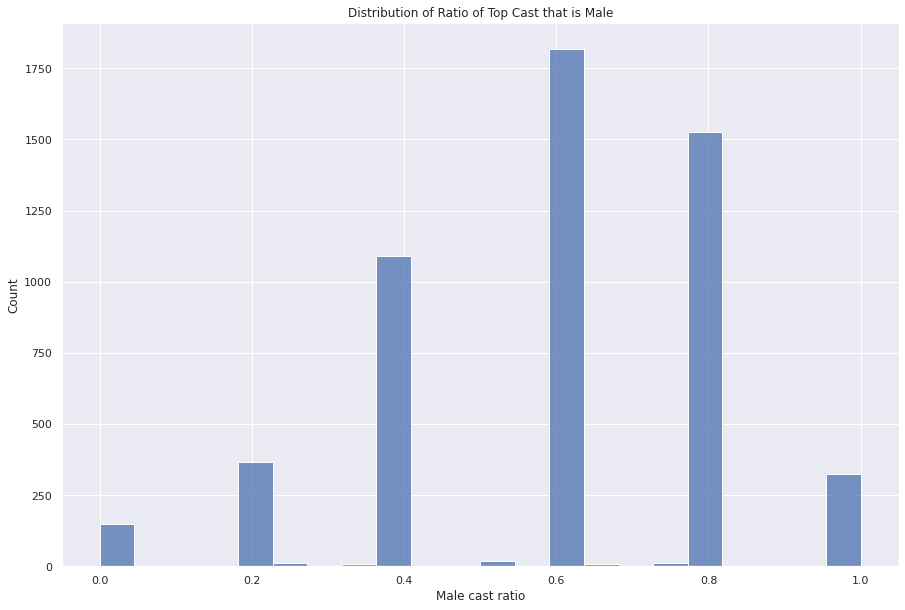

In [ ]:
ax = sns.histplot(x = df['male_cast_ratio'])
ax.set(xlabel = 'Male cast ratio', ylabel = 'Count', title = 'Distribution of Ratio of Top Cast that is Male')
ax.plot()

The distribution of male cast ratio is highest for 0.4, 0.6, 0.8. This means that in general, the male to female ratio for casts ranges from 40-80%. As a whole, this is acceptable for our data because it centers around the average, indicating average split between genders.

[]

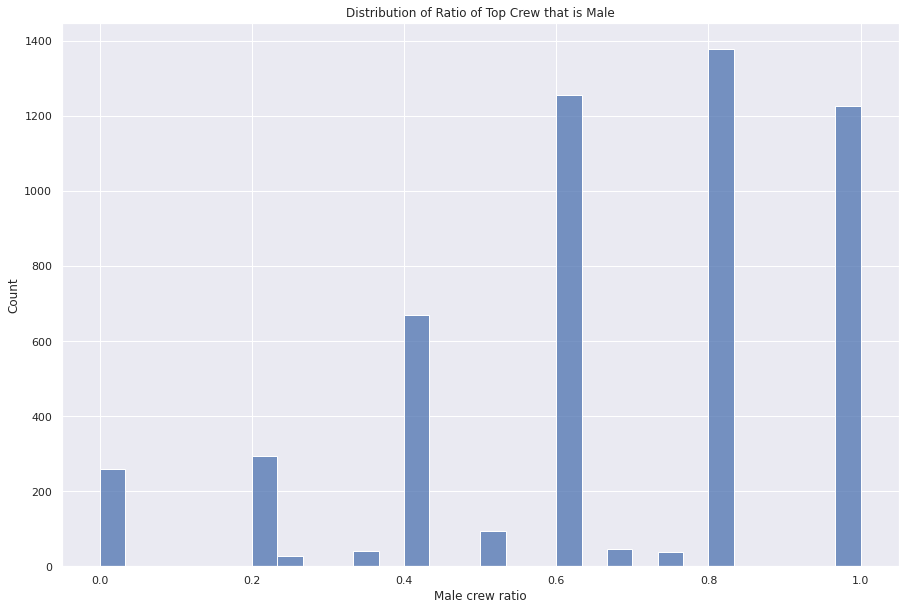

In [ ]:
ax = sns.histplot(x = df['male_crew_ratio'])
ax.set(xlabel = 'Male crew ratio', ylabel = 'Count', title = 'Distribution of Ratio of Top Crew that is Male')
ax.plot()

However, we see that the male crew ratio varies slightly more, with values concentrated in the 60-100% range. This means that aside from just the case where the cast members are predominantly male, there are movies that have a higher concentration of male crew members. This may be a variable of interest to consider.  

## Correlation Matrix

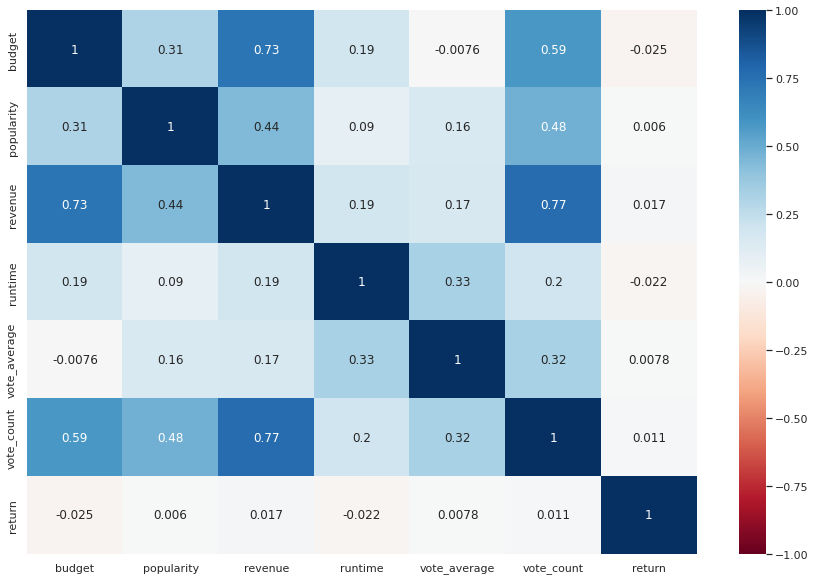

In [ ]:
corr_matrix = df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']].corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, cmap="RdBu",annot=True,vmax = 1, vmin = -1,center = 0)

We can see that budget, revenue, and vote_count are all very correlated with each other. Interestingly, return is not correlated with revenue or budget, so this serves a good variable to predict. We will have to drop either budget or vote_count (vote_count seems like the better candidate to drop) to address this collinearity.

Additionally, we'll also drop revenue since this a variable that can only be realized after the movie release. Also, in a real world application, using this variable would yield results that are not very useful (predicting the future with the future).

Next, let's take a look at the correlation between some relevant features and the output variables.

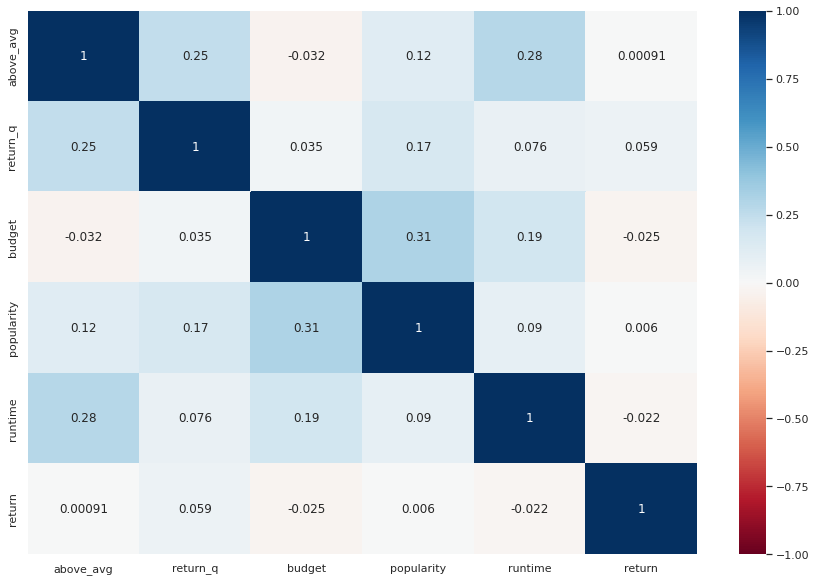

In [ ]:
corr_matrix = df[['avg_rating', 'return_q', 'budget', 'popularity', 'runtime', 'return']].corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, cmap="RdBu",annot=True,vmax = 1, vmin = -1,center = 0)

No significant collinearity found! Interestingly, we see a slight correlation between the runtime and whether the movie is rated above average.

In this below correlation plot, we look at the non categorical features we are using in our models.

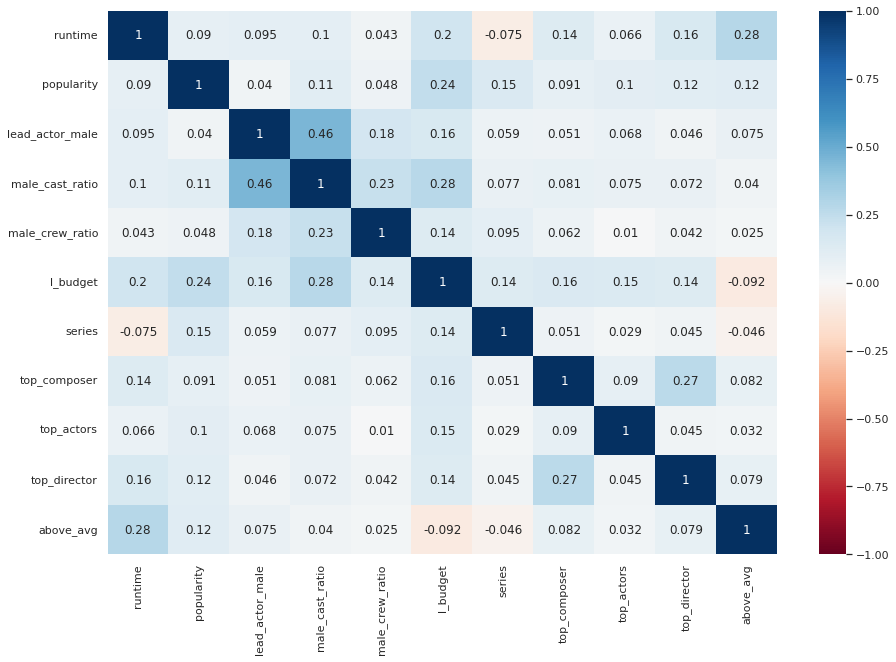

In [ ]:
corr_matrix = df[['runtime', 'popularity',
                   'lead_actor_male', 'male_cast_ratio', 'male_crew_ratio',
                   'l_budget', 'series',
                   'top_composer', 'top_actors', 'top_director', 'above_avg']].corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, cmap="RdBu",annot=True,vmax = 1, vmin = -1,center = 0)

Also no significant collinearity! Another interesting relationship between the log budget and ratio of male cast members. Do higher budget movies higher more male actors?

In the below correlation matrices, we'll take a look at collinearity in our dummy variables.

#### Genre

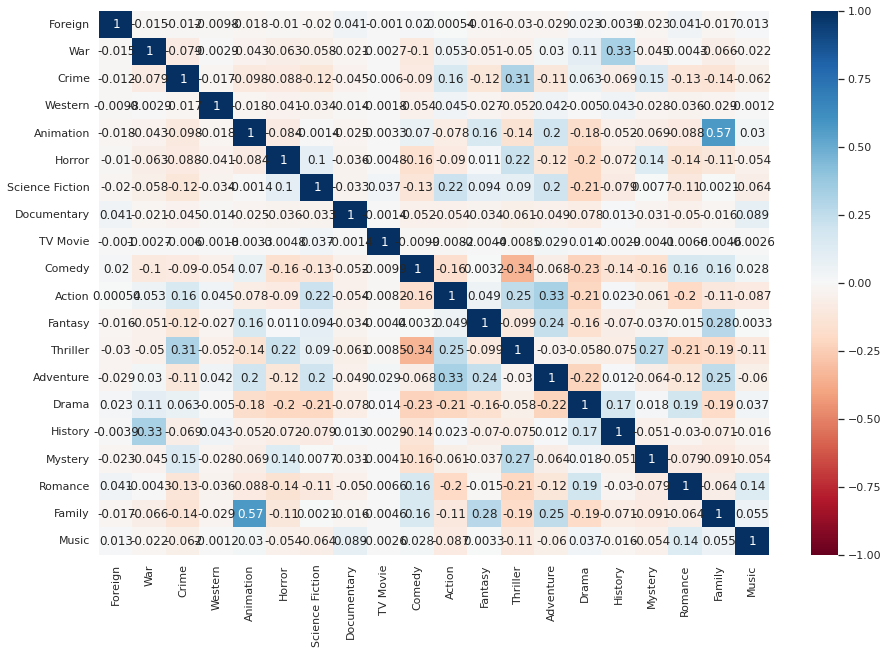

In [ ]:
corr_matrix = df[['Foreign', 'War', 'Crime', 'Western',
                   'Animation', 'Horror', 'Science Fiction', 'Documentary', 'TV Movie',
                   'Comedy', 'Action', 'Fantasy', 'Thriller', 'Adventure', 'Drama','History', 'Mystery', 'Romance', 'Family', 'Music']].corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, cmap="RdBu",annot=True,vmax = 1, vmin = -1,center = 0)

In most categorical dummy variables, we are to drop one of the variables to account for collinearity as the constant. However, for the Genre feature, a movie can have multiple genres. We see in our matrix that none of the pairs of genres seem to have siginificant collinearity, except the Family and Animated genres. This can be explained easily because most animated movies are targeted towards a younger audience with family!

#### Production Company

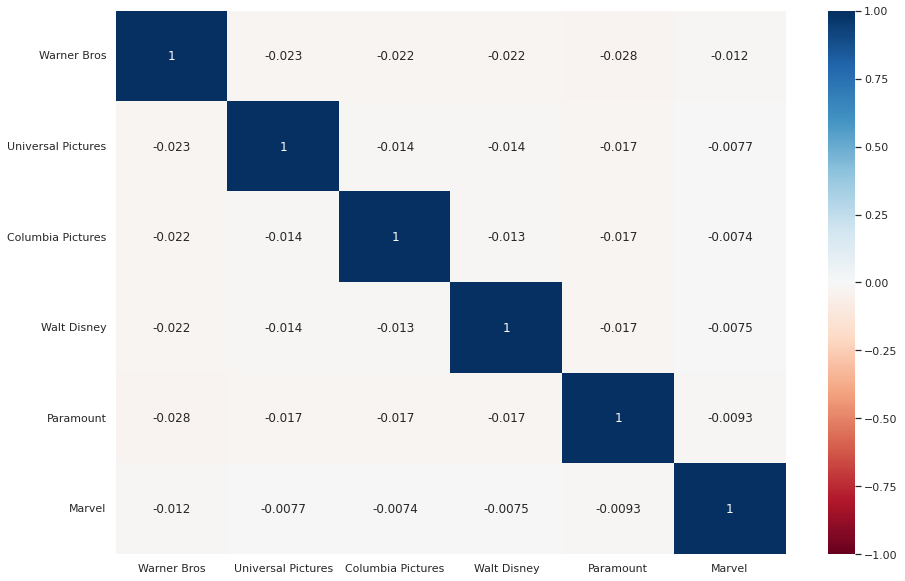

In [ ]:
corr_matrix = df[['Warner Bros','Universal Pictures', 'Columbia Pictures', 'Walt Disney', 'Paramount', 'Marvel']].corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, cmap="RdBu",annot=True,vmax = 1, vmin = -1,center = 0)

Similar to the genre variable, a movie can be a collaboration between multiple production companies. Since there's no collinearity in the matrix, we will keep all of the features too.

#### Season

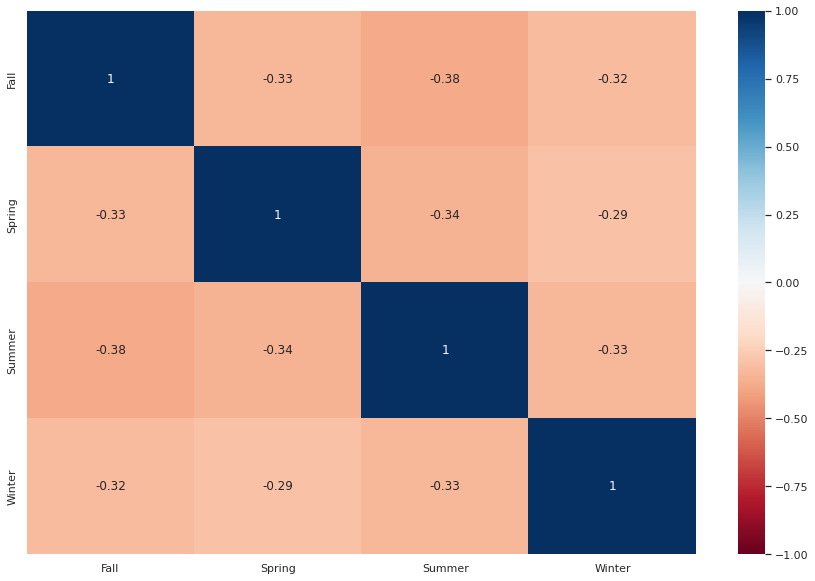

In [ ]:
corr_matrix = df[['Fall', 'Spring', 'Summer', 'Winter']].corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, cmap="RdBu",annot=True,vmax = 1, vmin = -1,center = 0)

Looks like there is quite a bit of collinearity for the four seasons. Note that a movie cannot be released in two different seasons. In this case, we'll just drop the season with the least movies to address for this collinearity which is Winter. We also know that we can easily deduce which movies are released in the winter if we know the other three seasons (it will when all three other season variables are 0s).

In [ ]:
df.drop(columns = ['Winter'], inplace = True)

Since we create dummy variables out of the four seasons, we must drop the winter column.

# Preparing for Modeling

## Train Test Split

In [ ]:
features_bin = df.drop(columns = ['vote_average', 'above_avg', 'return', 'return_q', 'budget', 'l_return'])
votes = df['above_avg']
returns = df['l_return']

As mentioned early, we will be dropping the vote_count and revenue variables to address collinearity.

In [ ]:
features_bin.drop(columns = ['vote_count', 'revenue'], inplace = True)

In [ ]:
features_bin.set_index('id', inplace = True)

In [ ]:
features_bin.drop(columns = ['belongs_to_collection', 'original_title', 'original_language', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'writers', 'composer', 'director', 'actors', 'year'], inplace = True)

In [ ]:
features_bin.columns

Index(['runtime', 'popularity', 'Romance', 'Thriller', 'Western', 'Horror',
       'War', 'TV Movie', 'Mystery', 'Animation', 'Action', 'History', 'Drama',
       'Crime', 'Family', 'Foreign', 'Fantasy', 'Documentary', 'Adventure',
       'Science Fiction', 'Music', 'Comedy', 'Warner Bros',
       'Universal Pictures', 'Columbia Pictures', 'Walt Disney', 'Paramount',
       'Marvel', 'lead_actor_male', 'male_cast_ratio', 'male_crew_ratio',
       'l_budget', 'Fall', 'Spring', 'Summer', 'series', 'top_composer',
       'top_actors', 'top_director'],
      dtype='object')

In [ ]:
# To use later for neural networks
cleaned = df[['above_avg', 'runtime', 'popularity', 'Mystery', 'Music', 'War', 'Drama',
       'Adventure', 'Science Fiction', 'Crime', 'Foreign', 'Fantasy',
       'Animation', 'Romance', 'Thriller', 'Western', 'History', 'Horror',
       'Action', 'TV Movie', 'Documentary', 'Family', 'Comedy', 'Warner Bros',
       'Universal Pictures', 'Columbia Pictures', 'Walt Disney', 'Paramount',
       'Marvel', 'lead_actor_male', 'male_cast_ratio', 'male_crew_ratio',
       'l_budget', 'Fall', 'Spring', 'Summer', 'series', 'top_composer',
       'top_actors', 'top_director']]

In [ ]:
features_bin.dtypes

runtime               float64
popularity            float64
Romance                 int64
Thriller                int64
Western                 int64
Horror                  int64
War                     int64
TV Movie                int64
Mystery                 int64
Animation               int64
Action                  int64
History                 int64
Drama                   int64
Crime                   int64
Family                  int64
Foreign                 int64
Fantasy                 int64
Documentary             int64
Adventure               int64
Science Fiction         int64
Music                   int64
Comedy                  int64
Warner Bros             int64
Universal Pictures      int64
Columbia Pictures       int64
Walt Disney             int64
Paramount               int64
Marvel                  int64
lead_actor_male         int64
male_cast_ratio       float64
male_crew_ratio       float64
l_budget              float64
Fall                    uint8
Spring    

We split our data into train and test data. This is done twice for our binary predictions (predicting whether the movie has an above average rating) or for our numerical predictions (predicting the return of the movie).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_bin, votes, test_size = .2, random_state = 888)

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features_bin, returns, test_size = .2, random_state = 888)

#Classification Models

In this section, we'll be predicting whether or not a movie will be rated above average using the 'above_avg' column we previously engineered. We'll be exploring a variety of classification models but we first initialize a simple way to keep track and compare each model's performance.

In [ ]:
class_scores = pd.DataFrame(columns={"Model": "object", "Accuracy": "float", "Precision": "float", "Recall": "float", "F1" : "float"})

## Logistic Regression

We'll first take a look at logistic regression.

### Standard logistic

In [ ]:
# TO-DO: Import required libraries

from sklearn.linear_model import LogisticRegression
# TO-DO: Initialize model with default parameters and fit it on the training set

log_reg = LogisticRegression(class_weight = 'balanced', max_iter = 2000).fit(x_train, y_train)
# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = log_reg.predict(x_test)
# TO-DO: Find the accuracy and store the value in `log_acc`
log_acc = log_reg.score(x_test, y_test)
train_score = log_reg.score(x_train, y_train)

In [ ]:
train_score

0.7179366940211019

In [ ]:
log_acc

0.711340206185567

The train and test scores are nearly the same, suggesting overfitting is not a major issue here.

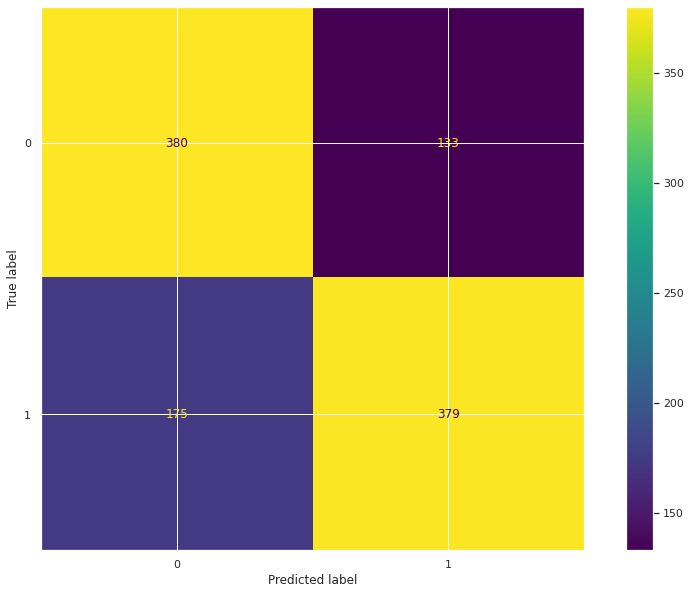

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_reg, x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.711340206185567

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.740234375

In terms of accuracy, logistic regression offers a decent baseline for our modeling. With an accuracy score of 71.1% and a precision score of 74.1%, we are clearly able to predict the outcome of a movie better than a coin flip!

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
class_scores.loc[len(class_scores.index)] = ['Logistic', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

### With PCA Regression

Since there is the chance of multicollinearity in our data, we want to also test Principle Component Analysis for our modeling. This will capture more of the variance with less of the effects of multicollinearity to establish a better relationship between our predictors and outcome.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

pca = PCA(n_components=scaled_x_train.shape[1])
pca_x_train = pca.fit_transform(scaled_x_train)

In [ ]:
cum_evr = np.cumsum(pca.explained_variance_ratio_)

Text(0.5, 1.0, 'Cum. explained var ratio against number of components')

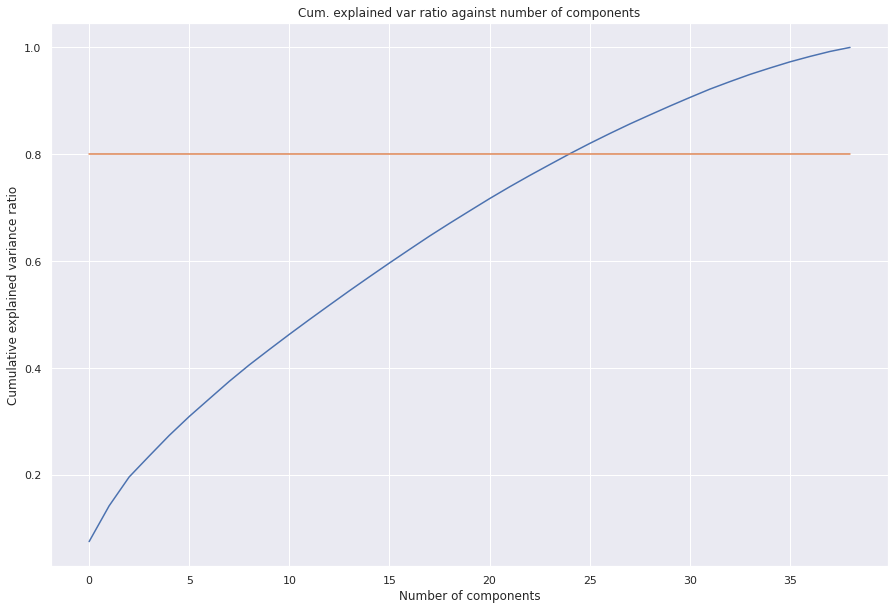

In [ ]:
plt.plot(np.arange(0, 39), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.arange(0, 39), [0.8]*39)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Cum. explained var ratio against number of components')

In the above graph, we can se that the cumulative explained variance ratio seems to improve consistently as we add components. This may imply that PCA will not have a significant effect for our data. We'll still test it out, though.

The intersection between the 0.8 line and our explained variance ratio line is at n=24.

In [ ]:
pca = PCA(n_components=24)
pca_x_train = pca.fit_transform(scaled_x_train)
x_test_pca = pca.transform(scaled_x_test)

In [ ]:
log_reg_pca = LogisticRegression(class_weight = 'balanced').fit(pca_x_train, y_train)
y_pred = log_reg_pca.predict(x_test_pca)
test_accuracy = log_reg_pca.score(x_test_pca, y_test)

In [ ]:
test_accuracy

0.6785379568884724

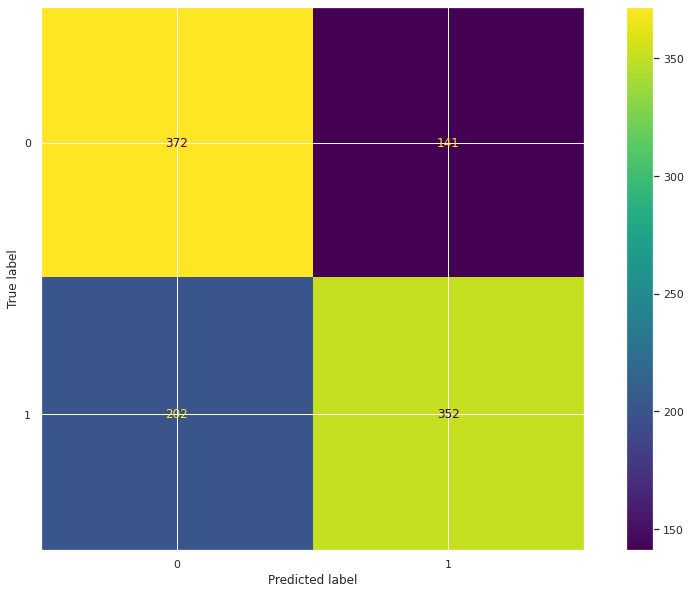

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_reg_pca, x_test_pca, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6785379568884724

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.7139959432048681

Our accuracy and precision takes a small dip with PCA. It seems like multicollinearity is not a major issue here!

In [ ]:
class_scores.loc[len(class_scores.index)] = ['Logistic with PCA', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

### Coefficients of regression

The logistic regression without PCA performed the best, so we'll examine the coefficients of the variables for that model.

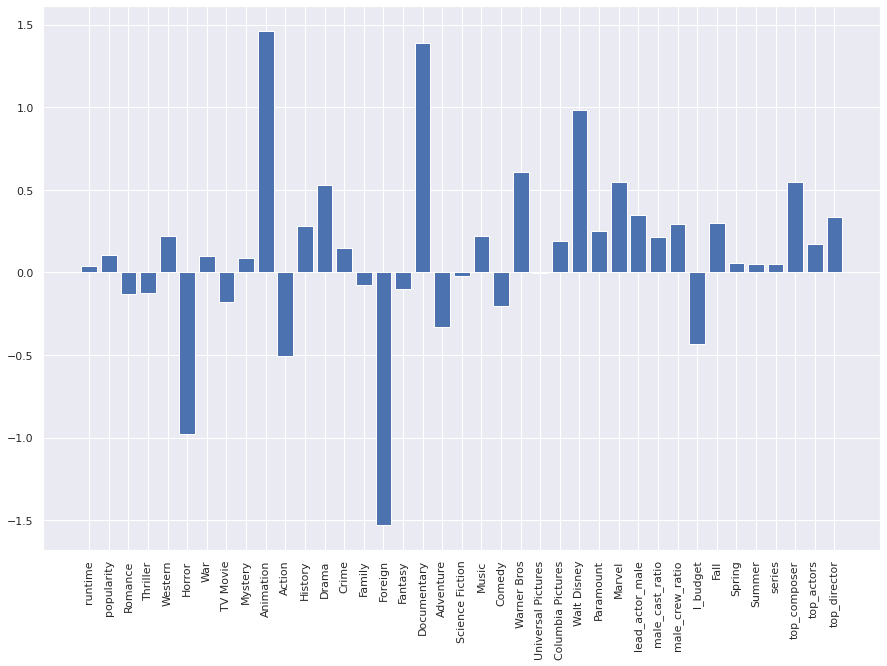

In [ ]:
coeff = log_reg.coef_[0]
plt.bar(range(len(coeff)), coeff)
plt.xticks(range(len(coeff)), x_train.columns, rotation=90)
plt.show()

While some of the genres do not have major effects on the outcome, it looks like animation and documentary films have a much higher chance of being rated above average, while horror and foreign films seem to be a lot less well-liked. Disney movies, along with Warner Bros to a lesser extent, have a high likelihood of being rated above average. Very interestingly, the impact of having a top composer is weighed heavier than having top actors or a top director. Although, music does have an enormous effect on the impact of a movie!

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=log_reg,
X=x_train,y=y_train, cv=10)

print('Cross-validation accuracy scores: %s' %scores)
print('Cross-validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Cross-validation accuracy scores: [0.70257611 0.69086651 0.70257611 0.71194379 0.74004684 0.70657277
 0.71596244 0.75117371 0.68544601 0.6971831 ]
Cross-validation accuracy: 0.710 +/- 0.020


Here, we take a quick look at cross validation for a more robust evaluation of our model's performance by taking into account the train and test data's variability. In these results, we can see that the accuracy is pretty consistent across folds.

## Decision Trees

In this section we'll briefly explore using decision trees to predict whether a movie is rated above average.

### Standard decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
test_accuracy = clf.score(x_test, y_test)
train_accuracy = clf.score(x_train, y_train)

In [ ]:
train_accuracy

0.7048065650644784

In [ ]:
test_accuracy

0.6925960637300843

Our train and test accuracies are pretty even, so it seems like the model is not overfitting with the current hyperparameters!

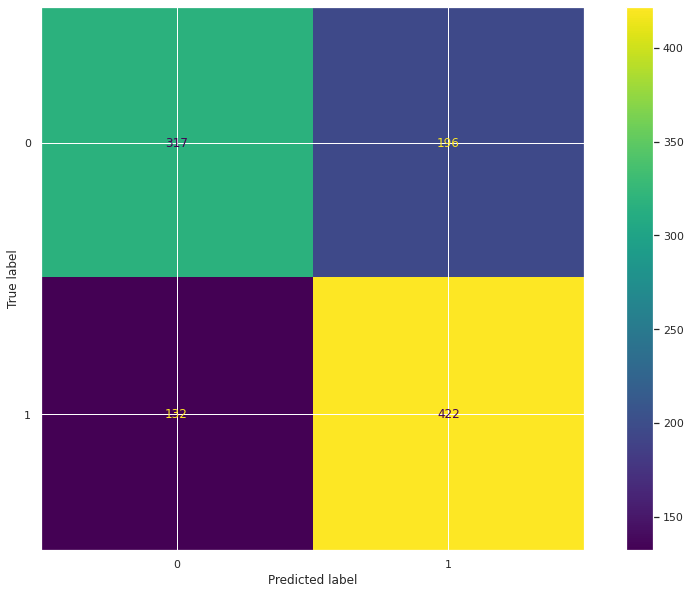

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6925960637300843

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.6828478964401294

[Text(0.5, 0.9166666666666666, 'runtime <= 114.5\ngini = 0.498\nsamples = 4265\nvalue = [1995, 2270]\nclass = below average'),
 Text(0.25, 0.75, 'Drama <= 0.5\ngini = 0.492\nsamples = 2832\nvalue = [1600, 1232]\nclass = above average'),
 Text(0.125, 0.5833333333333334, 'popularity <= 9.797\ngini = 0.463\nsamples = 1715\nvalue = [1092, 623]\nclass = above average'),
 Text(0.0625, 0.4166666666666667, 'Documentary <= 0.5\ngini = 0.409\nsamples = 1027\nvalue = [733, 294]\nclass = above average'),
 Text(0.03125, 0.25, 'l_budget <= 16.32\ngini = 0.392\nsamples = 992\nvalue = [727, 265]\nclass = above average'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.463\nsamples = 436\nvalue = [277, 159]\nclass = above average'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.309\nsamples = 556\nvalue = [450, 106]\nclass = above average'),
 Text(0.09375, 0.25, 'popularity <= 1.888\ngini = 0.284\nsamples = 35\nvalue = [6, 29]\nclass = below average'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.5\n

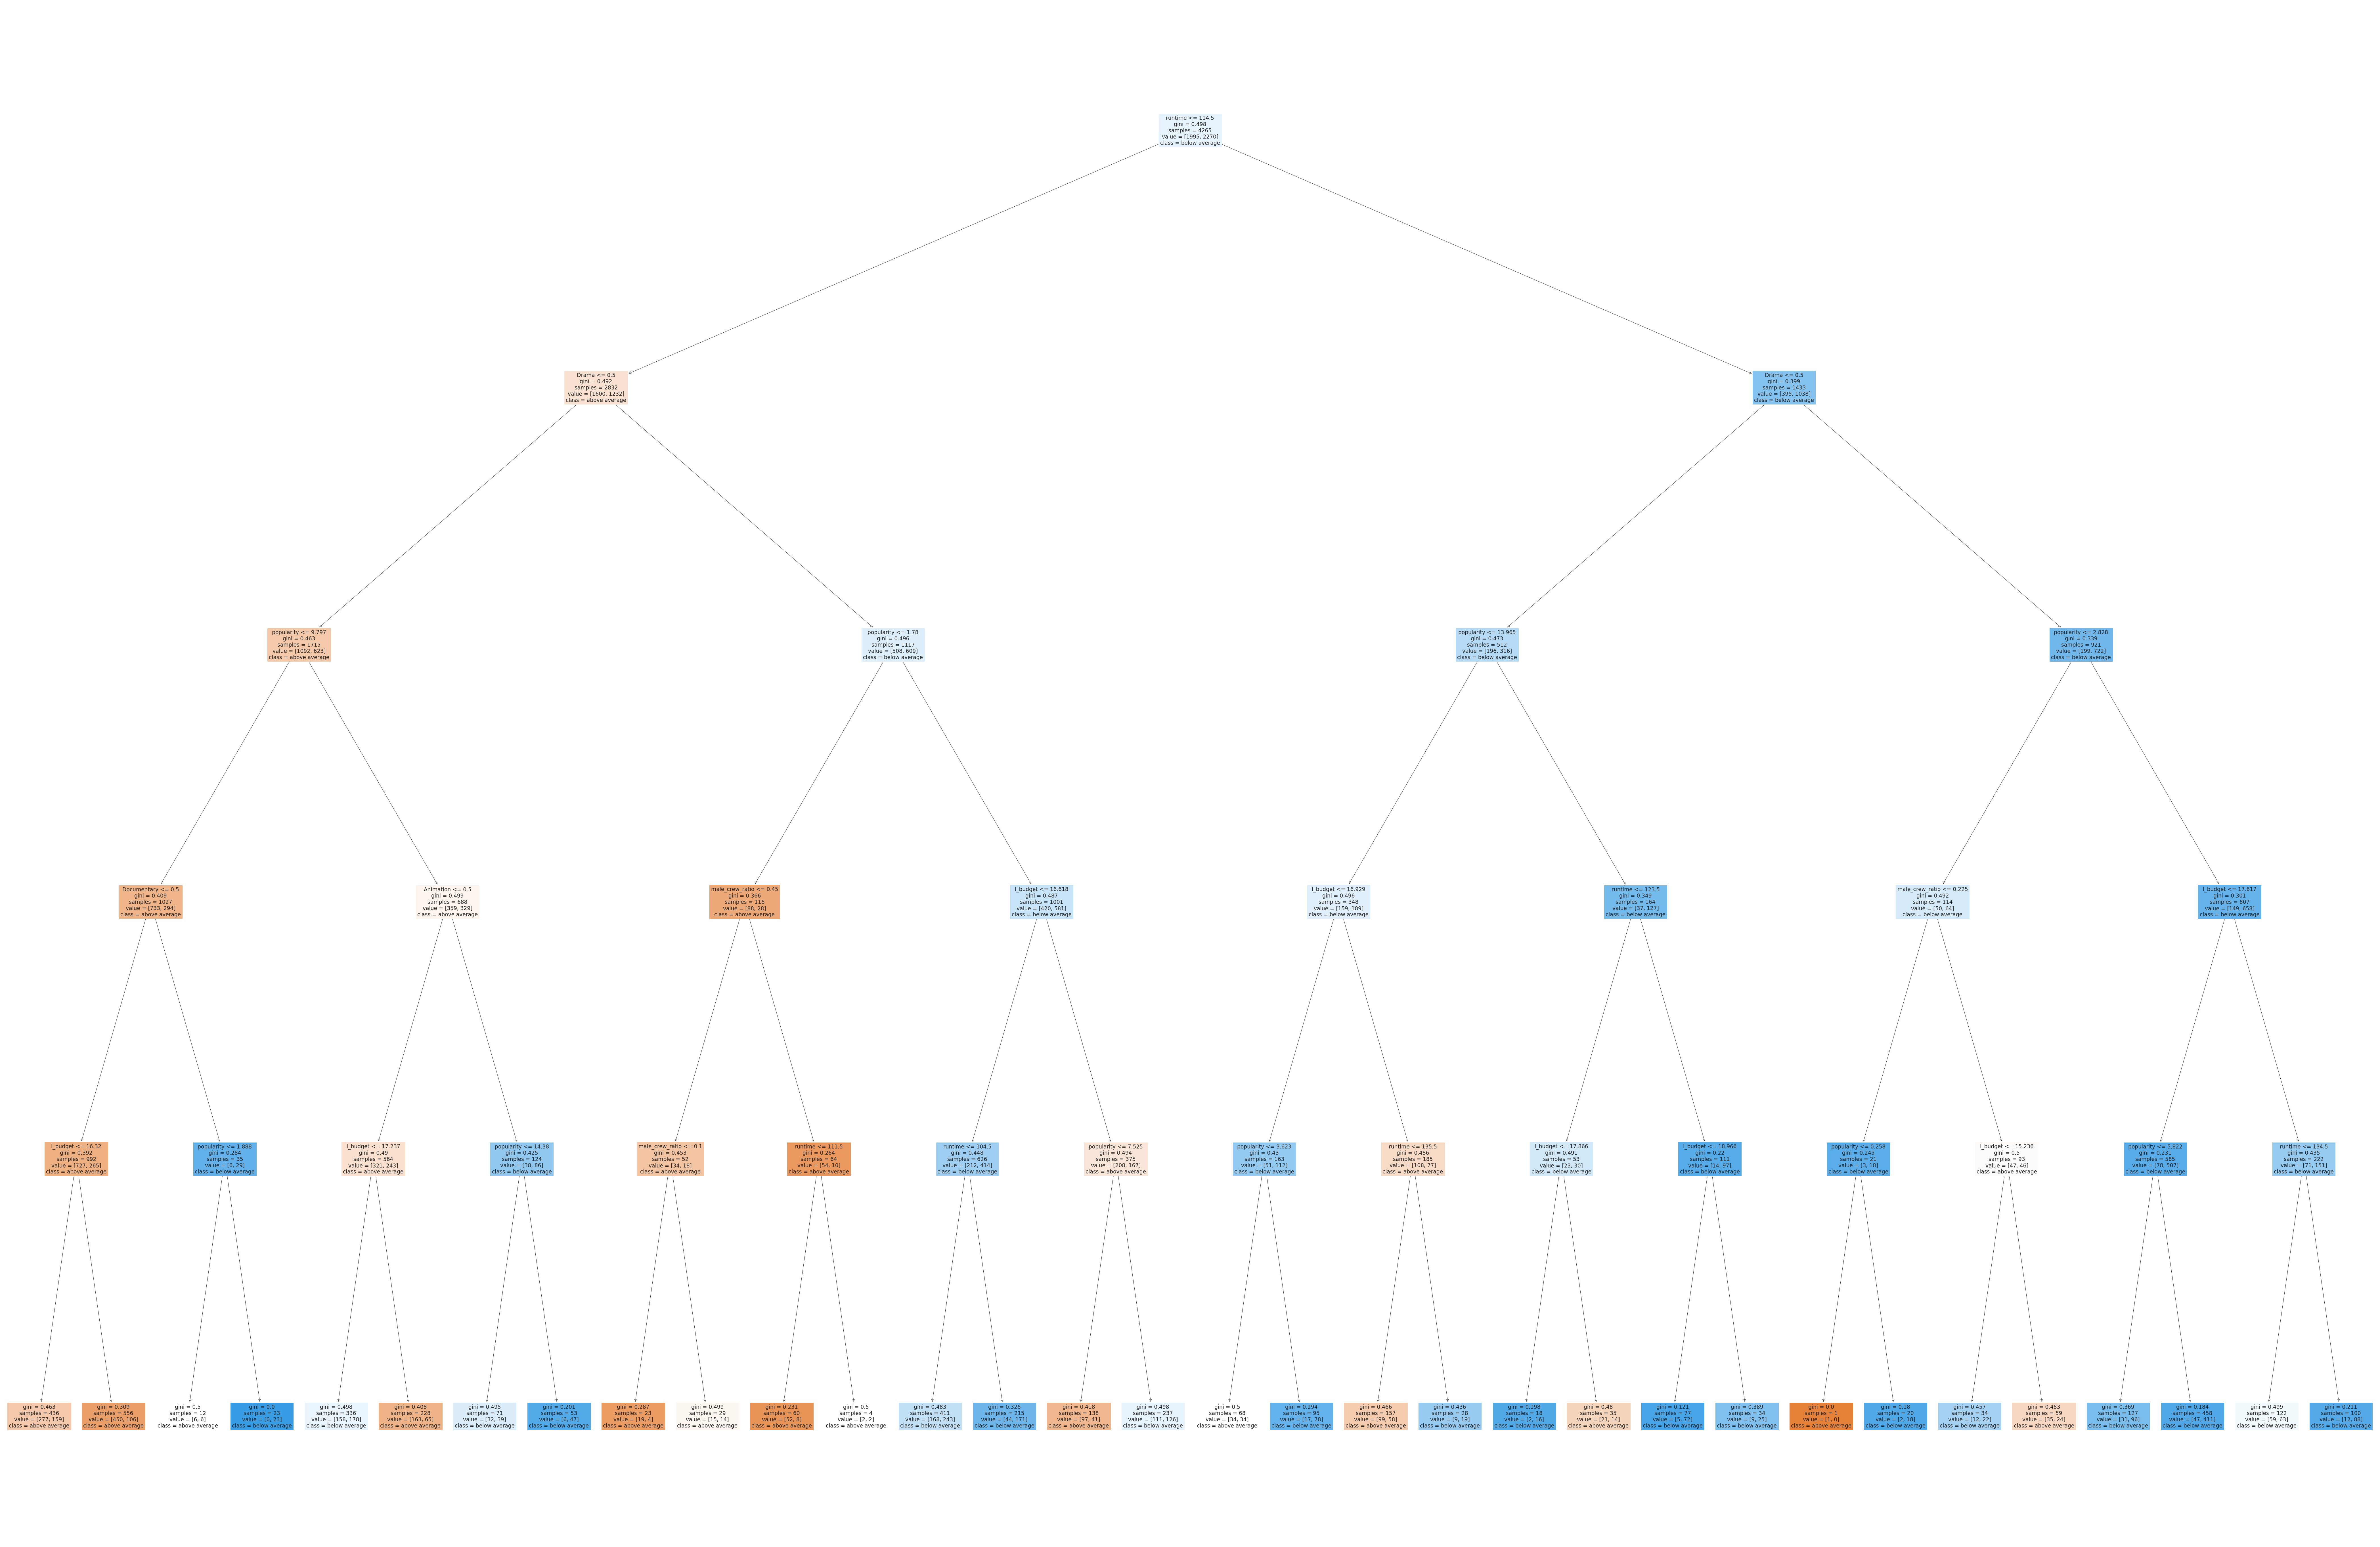

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(150,100))
tree.plot_tree(clf, feature_names=x_train.columns,
               class_names = ['above average', 'below average'],
               filled=True)

This image is a little hard to view in CoLab, but opening it in another tab makes it a little more easy.

In [ ]:
class_scores.loc[len(class_scores.index)] = ['Decision Tree', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

### Decision tree with PCA

We'll also examine if PCA has any effect on our model results for Decision Trees.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_pca = DecisionTreeClassifier(max_depth = 3)
clf_pca.fit(pca_x_train, y_train)
y_pred = clf_pca.predict(x_test_pca)
test_accuracy = clf_pca.score(x_test_pca, y_test)
train_accuracy = clf_pca.score(pca_x_train, y_train)

In [ ]:
train_accuracy

0.6431418522860493

In [ ]:
test_accuracy

0.619493908153702

PCA makes the Decision tree perform worse than without.

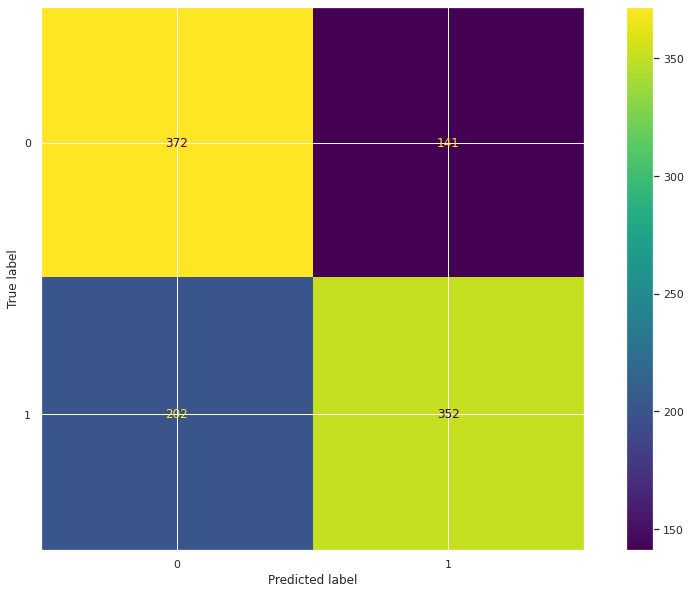

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_reg_pca, x_test_pca, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.619493908153702

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.6145510835913313

In [ ]:
class_scores.loc[len(class_scores.index)] = ['Decision Tree with PCA', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

### Extra Trees Classifier

Since we discovered that PCA did not help with modeling, we will just use the standard feature data for the Extra Trees Classifier.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(max_depth = 15)
etc.fit(x_train, y_train)
y_pred = etc.predict(x_test)
test_accuracy = etc.score(x_test, y_test)
train_accuracy = etc.score(x_train, y_train)

In [ ]:
train_accuracy

0.8895662368112544

In [ ]:
test_accuracy

0.703842549203374

#### With RandomSearchCV

This model seems to perform quite well with minimal tuning. Let's use RandomizedSearchCV to find the best hyperparameters for this model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint


param_grid = {
    "max_depth": [5, 7, 9, 10, 12, 14, 16, 18],
    "min_samples_split": randint(2, 5),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}

etc = ExtraTreesClassifier()

random_etc = RandomizedSearchCV(etc, param_grid, n_iter=30, cv=5, scoring="accuracy", n_jobs=-1)

random_etc.fit(x_train, y_train)

print("Best parameters:", random_etc.best_params_)
print("Best score:", random_etc.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.683704572098476


In [ ]:
random_etc.score(x_test, y_test)

0.6991565135895033

In [ ]:
best_etc = random_etc.best_estimator_
y_pred = best_etc.predict(x_test)
train_score = best_etc.score(x_train, y_train)
test_score = best_etc.score(x_test, y_test)

In [ ]:
train_score

0.9289566236811254

In [ ]:
test_score

0.6991565135895033

There's a notable discrepencacy between the scores of the train and test data, indicating some overfitting of the model. This is difficult to control because of our lack of volume of data.

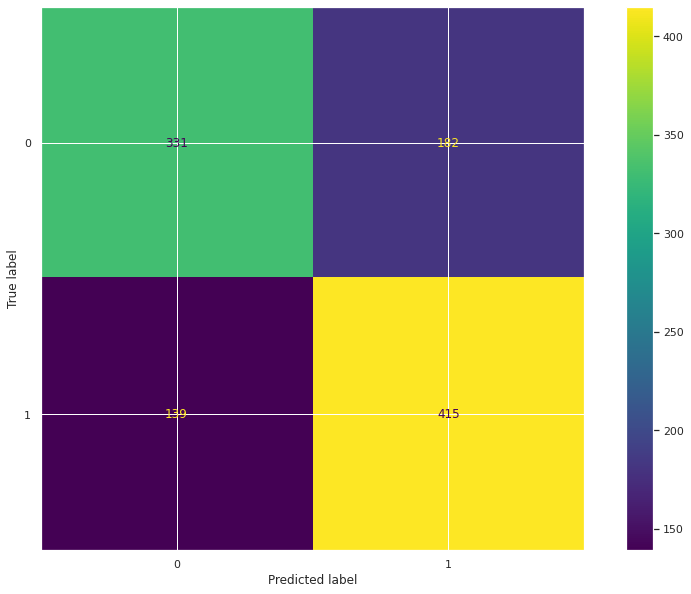

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_etc, x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6991565135895033

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.695142378559464

In [ ]:
class_scores.loc[len(class_scores.index)] = ['Extra Trees', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

### Feature importance

The extra trees classifier performed the best, so we'll take a look at the feature importance for this model.

In [ ]:
importance = best_etc.feature_importances_


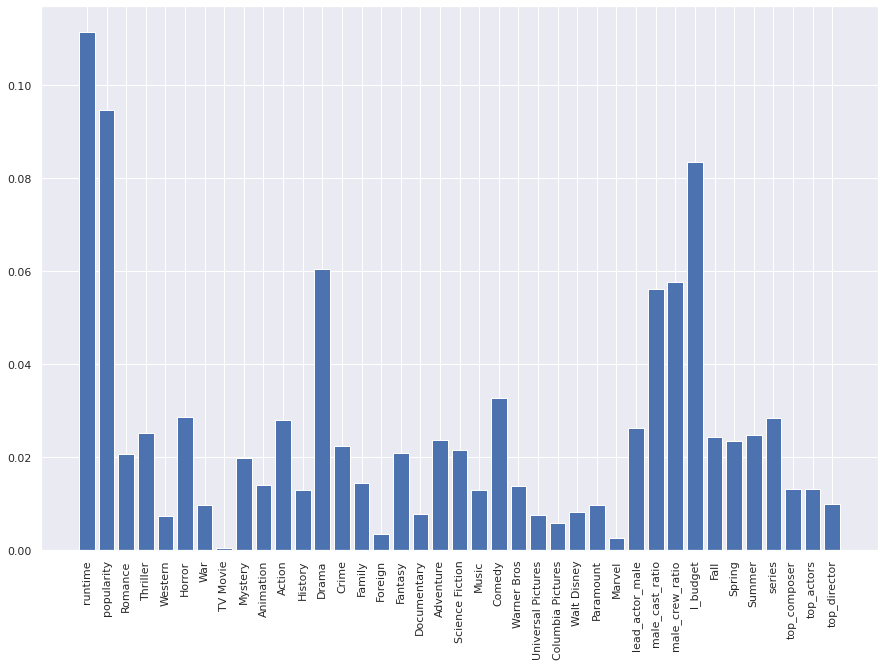

In [ ]:
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), x_train.columns, rotation=90)
plt.show()

This offers some interesting differences from our logistic regression. As seen in the feature importnace chart, Animation movies are not as important but the Drama genre is very important. Beyond that, runtime, popularity, l_budget, and the male_crew_ratio are very important features that were not as apparent in the logistic regression.

## Random Forest Classifier#

### Standard Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = 10)

forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)

forest_score = forest.score(x_test, y_test)
train_score = forest.score(x_train, y_train)


In [ ]:
train_score

0.8534583821805393

In [ ]:
forest_score

0.7085285848172446

### With PCA Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(pca_x_train, y_train)

y_pred = forest.predict(x_test_pca)

forest_score = forest.score(x_test_pca, y_test)



In [ ]:
forest_score

0.6757263355201499

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6757263355201499

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.674496644295302

### With RandomizedSearchCV

In [ ]:
import multiprocessing

pgrid = {
    'n_estimators': np.linspace(50,1000,20,dtype=int),
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,4,8],
}

def random_forest_rs(pgrid,folds):
    rf_rs = RandomizedSearchCV(estimator=forest,
                               param_distributions=pgrid,
                               n_iter=30,
                               cv=folds,
                               verbose=10,
                               n_jobs= multiprocessing.cpu_count()-1,
                               random_state=42
                              ).fit(x_train,y_train)

    return rf_rs

rf_rs = random_forest_rs(pgrid,6)

Fitting 6 folds for each of 30 candidates, totalling 180 fits
[CV 1/6; 1/30] START max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 1/6; 1/30] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.685 total time=   3.0s
[CV 2/6; 1/30] START max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 2/6; 1/30] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.734 total time=   3.0s
[CV 3/6; 1/30] START max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 3/6; 1/30] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.724 total time=   3.0s
[CV 4/6; 1/30] START max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 4/6; 1/30] END max_depth=7, max_features=sqrt, min_sample

In [ ]:
print(f"Best parameters:\n{rf_rs.best_params_}")
print(f"Best score:\n{rf_rs.best_score_}")

Best parameters:
{'n_estimators': 500, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 11}
Best score:
0.7254353122957152


In [ ]:
best_rf = rf_rs.best_estimator_
test_score = best_rf.score(x_test, y_test)
train_score = best_rf.score(x_train, y_train)
y_pred = best_rf.predict(x_test)

In [ ]:
train_score

0.854630715123095

In [ ]:
test_score

0.711340206185567

There's still a discrepency between our train score and test score. This means that our model is overfitting the training data, leading to underperformance in our test data. However, due to the lack of volume of data, this overfitting is difficult to address in our Random Forest model. In our RandomizedSearchCV, we have already specified 6 folds, and increasing may worsen the hyperparameter tuning. Thus, we have decided to keep it at this.

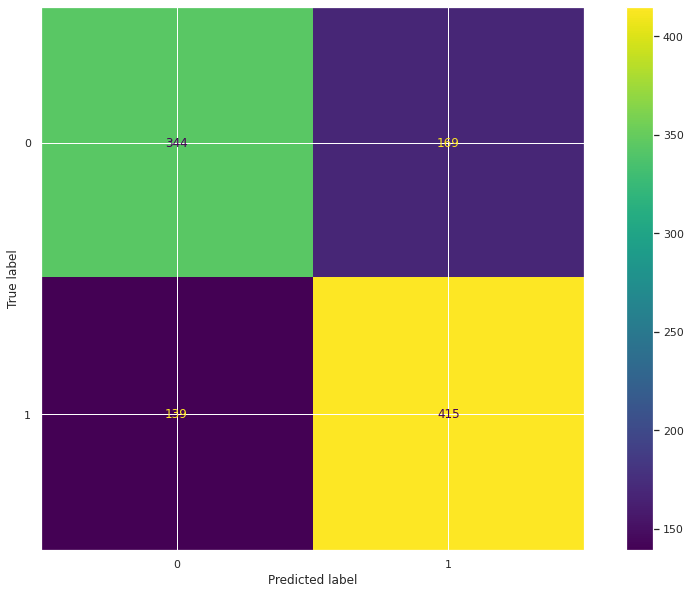

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf, x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.711340206185567

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.7106164383561644

In [ ]:
class_scores.loc[len(class_scores.index)] = ['Random Forest', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

### Feature importance

In [ ]:
importance = best_rf.feature_importances_


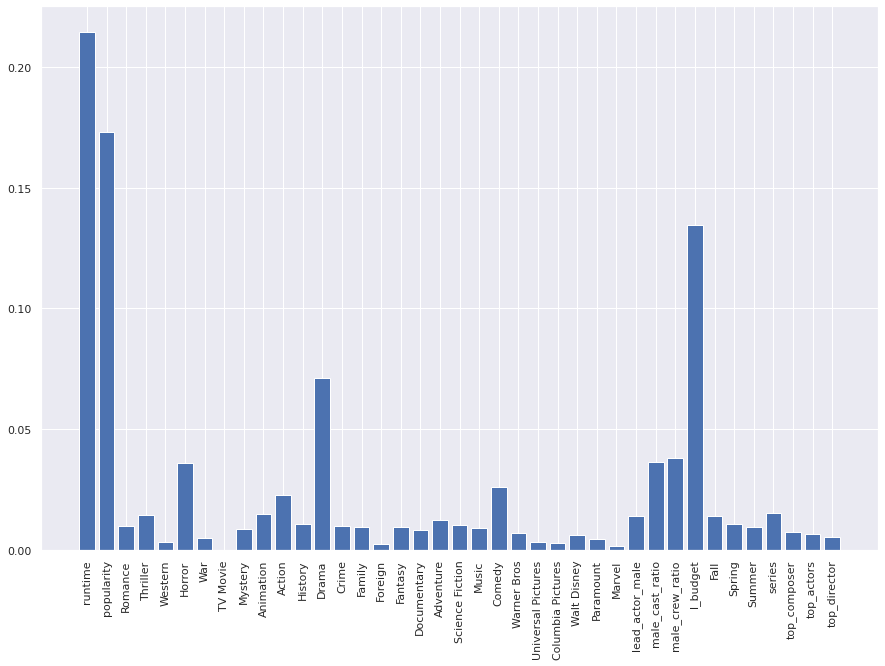

In [ ]:
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), x_train.columns, rotation=90)
plt.show()

Looking at our feature importance graph, it looks pretty similar to the Decision Tree graph. Runtime, popularity, and l_budget are the most important features by far. In terms of genre, Drama and Horror films are important features in the likelihood of above average ratings. Additionally, we can see that the male_cast_ratio and male_crew_ratio are somewhat important factors.

## AdaBoost

For our next classification model, we'll try to use AdaBoost to fit the data. Adaboost uses a weak classifier to form a strong classifier by assigning higher weights to misclassified data.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators = 100, learning_rate = 1)

abc.fit(x_train, y_train)

y_pred = abc.predict(x_test)

abc_score = abc.score(x_test, y_test)


In [ ]:
abc_score

0.6982193064667291

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6982193064667291

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.7006920415224913

AdaBoost performs similarly at first to the other models.

### With PCA AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators = 100, learning_rate = 1)

abc.fit(pca_x_train, y_train)

y_pred = abc.predict(x_test_pca)

abc_score = abc.score(x_test_pca, y_test)


In [ ]:
abc_score

0.6729147141518276

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6729147141518276

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.6814159292035398

Similar to the other models, PCA negatively affects the model's performance.

### RandomizedSearchCV AdaBoost

We'll also try some RandomizedSearchCV for AdaBoost.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "base_estimator__max_depth": [1, 2, 3, 4, 5],
    "n_estimators": [50, 100, 200, 300, 400, 500],
    "learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5],
}

adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

random_search = RandomizedSearchCV(adaboost, param_grid, n_iter=10, cv=5, scoring="accuracy", n_jobs=-1)

random_search.fit(x_train, y_train)


print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Best parameters: {'n_estimators': 500, 'learning_rate': 0.2, 'base_estimator__max_depth': 1}
Best score: 0.7240328253223915


In [ ]:
best_adb = random_search.best_estimator_

In [ ]:
train_score = best_adb.score(x_train, y_train)
test_score = best_adb.score(x_test, y_test)
y_pred = best_adb.predict(x_test)


In [ ]:
train_score

0.7430246189917936

In [ ]:
test_score

0.7122774133083412

In [ ]:
accuracy_score(y_test, y_pred)

0.7122774133083412

In [ ]:
precision_score(y_test, y_pred)

0.7111111111111111

In [ ]:
class_scores.loc[len(class_scores.index)] = ['AdaBoost', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]



### Feature importance

In [ ]:
importance = best_adb.feature_importances_


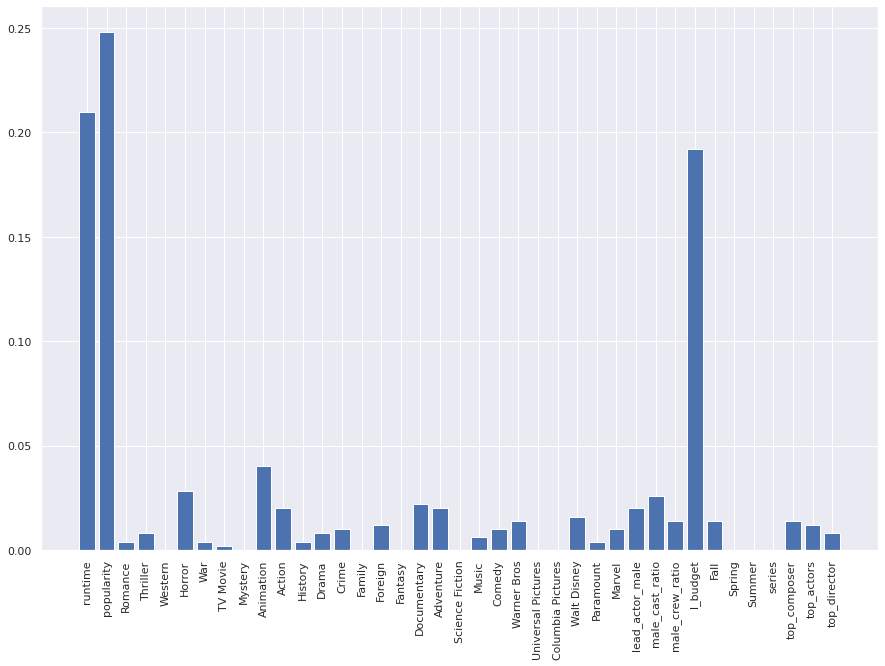

In [ ]:
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), x_train.columns, rotation=90)
plt.show()

Once again, we see a pretty similar distribution for feature importance. Runtime, popularity, and l_budget have enormous importance when compared with the other features. Notably, we see that the Genre features and the gender ratio features have much lower importances here comparatively.

## Comparing models

In [ ]:
class_scores

Model  Accuracy  Precision    Recall        F1
0                Logistic  0.711340   0.740234  0.684116  0.711069
1       Logistic with PCA  0.678538   0.713996  0.635379  0.672397
2           Decision Tree  0.692596   0.682848  0.761733  0.720137
3  Decision Tree with PCA  0.619494   0.614551  0.716606  0.661667
4             Extra Trees  0.699157   0.695142  0.749097  0.721112
5  Random Forest with PCA  0.675726   0.674497  0.725632  0.699130
6           Random Forest  0.711340   0.710616  0.749097  0.729350
7                AdaBoost  0.712277   0.711111  0.750903  0.730465

## Neural Networks

**Creating a Custom Dataset for our Movies Dataframe**

In order to create a custom dataset, we must create an initializer and override the length and get item methods. While the methods may be trivial, we need to make sure that the get item method returns a tensor of (data, label), which proved to be a tad bit difficult.

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torchvision import transforms, utils
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from collections import Counter
from PIL import Image
from skimage import io, transform
import os
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from google.colab import drive

class MoviesDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe: pd.DataFrame):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index: int):
        dataset = self.dataframe.iloc[index]
        data = dataset
        data = data.drop("above_avg")

        sample = (torch.tensor(data.values.tolist()), dataset.above_avg)

        return sample

Next, we create the training and testing set by splitting our cleaned dataset with a 80:20 proportion.

In [ ]:
movies_train, movies_test = cleaned.sample(frac=0.8), cleaned.sample(frac=0.2)

Now, we create the datasets using what we've just created as our parameters for the custom dataset, and create appropriate loaders for these datasets.

In [ ]:
train_dataset = MoviesDataset(movies_train)
test_dataset = MoviesDataset(movies_test)

batch = 16
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch, shuffle = True, num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch, shuffle = True, num_workers = 0)

Now, we will create the FNN model.

We used an FNN model but weren't able to use a CNN model because this dataset doesn't really have image-like features. With the FNN, the difficult part became tuning our hyperparameters such that the accuracies ligned up properly. Initially, I thought that 39 features was little enough to not need more than one layer, but after many iterations, I came upon 3 linear layers. Next, fine tuning the parameters took many iterations as well, but this became the final result.

In [ ]:
class FNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(39, 20)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(20, 12)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(12, 2)

    def forward(self, x):
        outputs = self.flatten(x)
        outputs = self.fc1(outputs)
        outputs = self.relu1(outputs)
        outputs = self.fc2(outputs)
        outputs = self.relu2(outputs)
        outputs = self.fc3(outputs)
        return outputs

Next, we start training, using Cross Entropy Loss as our criterion and the Adam backbone as our optimizer. We print out the training accuracies as the model trains.

In [ ]:
%%time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fnn = FNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fnn.parameters(), lr=1e-4) #lr - learning step
epoch = 25

acc_LIST_FNN = []
loss_LIST_FNN = []
acc_LIST_FNN_graph = []

for epoch in range(epoch):
  running_loss = 0.0
  correct = 0
  total = 0
  for inputs, labels in train_loader:
      labels = labels.type(torch.LongTensor) # Cast to Long
      inputs, labels = inputs.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = fnn(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum()

  accuracy = 100 * correct / total
  accuracy_graph = 100 * correct.item() / total
  acc_LIST_FNN_graph.append(accuracy_graph)
  acc_LIST_FNN.append(accuracy)
  loss_LIST_FNN.append(running_loss / len(train_loader)) # get the avg loss for each epoch

  print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(train_loader), accuracy))

The loss for Epoch 0 is: 0.6809668295392383, Accuracy = 54.102203369140625
The loss for Epoch 1 is: 0.6630952780166369, Accuracy = 59.001407623291016
The loss for Epoch 2 is: 0.6503646346960175, Accuracy = 62.11907958984375
The loss for Epoch 3 is: 0.6405718045288258, Accuracy = 65.89310455322266
The loss for Epoch 4 is: 0.6323923101362664, Accuracy = 67.0417251586914
The loss for Epoch 5 is: 0.6243300368723351, Accuracy = 68.63572692871094
The loss for Epoch 6 is: 0.6167746232020275, Accuracy = 68.87013244628906
The loss for Epoch 7 is: 0.6107986970117476, Accuracy = 69.3624038696289
The loss for Epoch 8 is: 0.6054277516036445, Accuracy = 69.64369201660156
The loss for Epoch 9 is: 0.6002756799204966, Accuracy = 69.43272399902344
The loss for Epoch 10 is: 0.5948147185509571, Accuracy = 70.08907318115234
The loss for Epoch 11 is: 0.5908090737875035, Accuracy = 70.25316619873047
The loss for Epoch 12 is: 0.5867802098895727, Accuracy = 69.78433990478516
The loss for Epoch 13 is: 0.5848985

Next, we graph the training accuracy vs. the epoch for our model.

Text(0, 0.5, 'Accuracy')

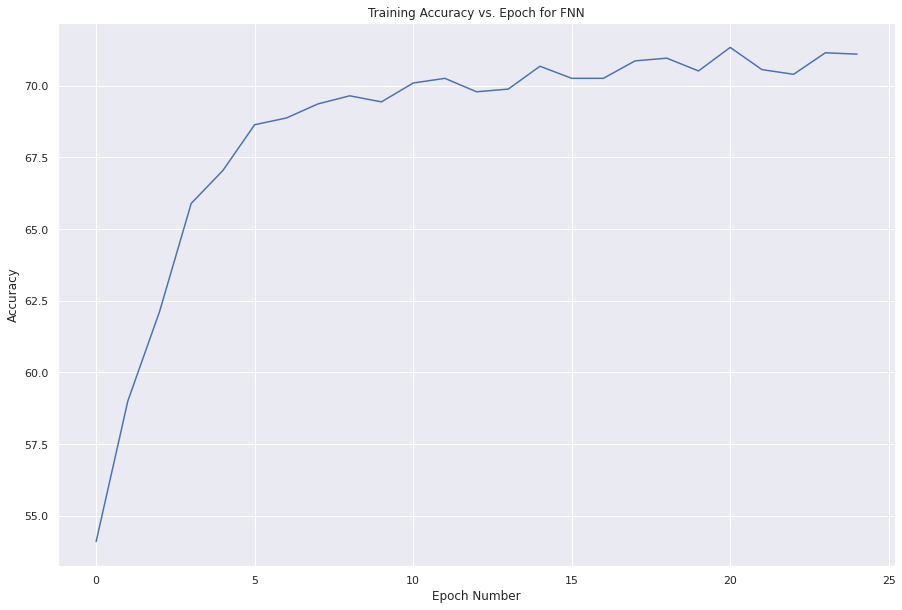

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_nos = acc_LIST_FNN_graph
epoch_nos = list(range(25))
plt.plot(epoch_nos, accuracy_nos)
plt.title("Training Accuracy vs. Epoch for FNN")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

Now, we test our trained model with the testing set and look at the accuracy for the testing set as well.

In [ ]:
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        labels = labels.type(torch.LongTensor) # Cast to Float
        images, labels = images.to(device), labels.to(device)
        outputs = fnn(images) # shape: torch.Size([10000, 10])
        _, predicted = torch.max(outputs.data, 1) # use max to get the prediction
        total += labels.size(0)
        correct += (predicted == labels).sum()

test_acc_FNN = 100 * correct / total
print('Test Accuracy: ' + str(test_acc_FNN))

Test Accuracy: tensor(72.3265)


Even after thorough hyperparameter tuning iterations, the accuracy turned out to be around 70-75% across iterations. We attributed this largely to the fact that a lot of data was lost during the process of cleaning our data. Although our initial dataset (especially the reviews dataset) was very gargantuan, the input for this particular model did not have too many samples. Despite looking for things like multicollinearity, we simply did not have a large enough dataset. We learned about a variety of methods to fix these issues like resampling or value imputation, which was unfortunately not possible without being disingenuous. We were confident, however, that with a larger training set, we would have much better results.

# Regression Models

We now run regression models to compare with the results of our classification model.

## Linear Regression
We start with a simple, unregularized, linear regression model.


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train2, y_train2)

y_pred = reg.predict(x_test2)

score = reg.score(x_test2, y_test2)
print('Mean squared error:', mean_squared_error(y_test2, y_pred))

Mean squared error: 2.8893272802214076


In [ ]:
score

0.1091324940656142

Wow, that's a bad score! Linear regression performs very poorly.

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha = 10).fit(x_train2, y_train2)


y_pred = reg_ridge.predict(x_test2)


ridge_score = reg_ridge.score(x_test2, y_test2)
print('Mean squared error:', mean_squared_error(y_test2, y_pred))

Mean squared error: 2.883412169048133


In [ ]:
ridge_score

0.11095630280280078

A slightly less-bad bad-score, but not much change from linear. Ridge regression also performs poorly.

### With PCA
We apply Principle Component Analysis to reduce dimensionality in our data. This helps with issues of multicollinearity.

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train2)
scaled_x_train = scaler.transform(x_train2)
scaled_x_test = scaler.transform(x_test2)

pca = PCA(n_components=scaled_x_train.shape[1])
pca_x_train2 = pca.fit_transform(scaled_x_train)


In [ ]:
cum_evr = np.cumsum(pca.explained_variance_ratio_)

Text(0.5, 1.0, 'Cum. explained var ratio against number of components')

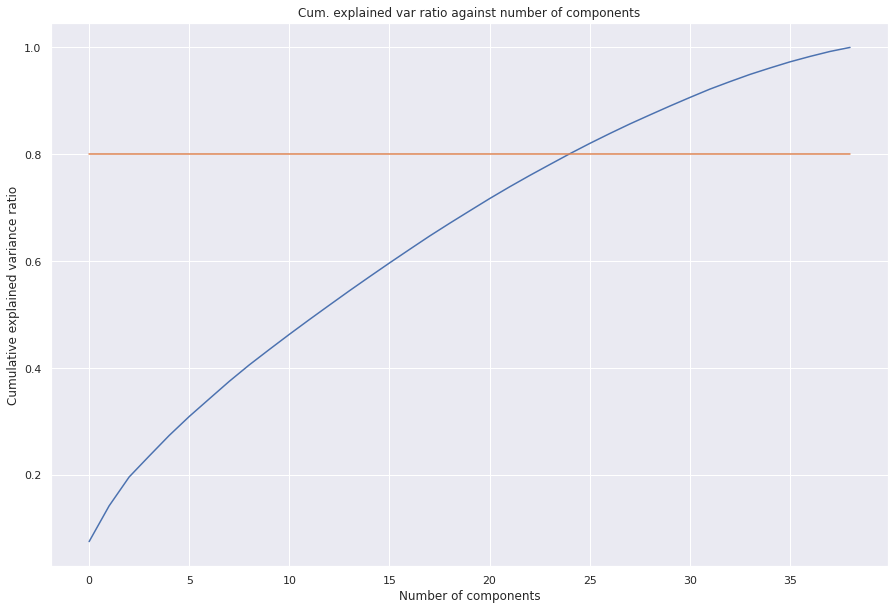

In [ ]:
plt.plot(np.arange(0, 39), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.arange(0, 39), [0.8]*39)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Cum. explained var ratio against number of components')

In [ ]:
pca = PCA(n_components=24)
pca_x_train2 = pca.fit_transform(scaled_x_train)
x_test_pca2 = pca.transform(scaled_x_test)

In [ ]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha = 10.0).fit(pca_x_train2, y_train2)


y_pred = reg_ridge.predict(x_test_pca2)


ridge_score = reg_ridge.score(x_test_pca2, y_test2)
print('Mean squared error:', mean_squared_error(y_test2, y_pred))

Mean squared error: 3.033064101212172


In [ ]:
ridge_score

0.06481405907781068

PCA does not increase the score, so it may not be so useful in this case. This might indicate that multicollinearity has already been addressed thoroughly in data cleaning.

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(x_train2, y_train2)

y_pred = lasso_reg.predict(x_test2)

lasso_score = lasso_reg.score(x_test2, y_test2)

print('Mean squared error:', mean_squared_error(y_test2, y_pred))

Mean squared error: 2.9838022185276456


In [ ]:
lasso_score

0.08000299626232832

Lasso performs worse than Ridge. This might be because of the nature of our features. Lasso works best when there are few strong variables. However, this seems to not be the case in our model, indicating that we actually have variables that have little effect on our results.

### With PCA

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(pca_x_train2, y_train2)

y_pred = lasso_reg.predict(x_test_pca2)

lasso_score = lasso_reg.score(x_test_pca2, y_test2)

print('Mean squared error:', mean_squared_error(y_test2, y_pred))

Mean squared error: 3.0932077112040837


In [ ]:
lasso_score

0.04626995429668701

PCA for Lasso is even worse! Again, since we might have addressed multicollinearity and there are not many strong features, Lasso is not fit for our data.

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train2, y_train2)

y_pred = model.predict(x_test2)

forest_score = model.score(x_test2, y_test2)

print('Mean squared error:', mean_squared_error(y_test2, y_pred))

Mean squared error: 2.474021872672624


In [ ]:
forest_score

0.23718378654352856

Our score for Random Forest is the best out of our regression models so far.

### With PCA

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(pca_x_train2, y_train2)

y_pred = model.predict(x_test_pca2)

forest_score = model.score(x_test_pca2, y_test2)

print('Mean squared error:', mean_squared_error(y_test2, y_pred))

Mean squared error: 2.81587945641568


In [ ]:
forest_score

0.13177869273546594

With PCA, we actually see that the score for Random Forest decreases. As mentioned above, this is likely due to a lack of multicollinearity in the data. The result of Random Forest with PCA is actually very similar to that of a regular Ridge Regression.

## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb.fit(x_train2, y_train2)

y_pred = gb.predict(x_test2)

gb_score = gb.score(x_test2, y_test2)


print('Mean squared error:', mean_squared_error(y_test2, y_pred))


Mean squared error: 2.414319567806142


In [ ]:
gb_score

0.25559182352813137

The Gradient Boosted model gives us the highest score, though it is not much higher than that of a Random Forest.

### With PCA

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb.fit(pca_x_train2, y_train2)

y_pred = gb.predict(x_test_pca2)

gb_score = gb.score(x_test_pca2, y_test2)


print('Mean squared error:', mean_squared_error(y_test2, y_pred))


Mean squared error: 2.905282847550008


In [ ]:
gb_score

0.1042129072229947

With PCA, this again performs very poorly. In fact, Gradient Boosting with PCA gives a worse result than a regular Ridge Regression and an Ordinary Least Squares Regression.

## Conclusions

Our classification models seem to offer some interesting conclusions. We can see that the genre of the movie manages to play an important factor in predicting whether a movie will be rated above average or below average. Notably, the Horror genre shows up across most of our models, indicating that it is a very important feature in determing the ratings (horror movies seem to be less likely to be rated well). Other important factors include the runtime of the movie, the popularity of the movie, and the budget of the movie.

We also found that having a higher ratio of male cast members and crew members are also important features in our models. This finding is pretty important because we know it doesn't imply that male cast and crew produce better movies --- moreso that the "top" of the industry is heavily male-dominated, something that is historically well-established. Across the models, however, we noticed that the presence of a male lead actor had differing effects on different models. Perhaps the actual actor on the screen has less of an effect.

Additionally, we would like to note that the presence of a top composer generally has higher feature importance than a top director or top actor. This is an interesting claim because, while music has always been an important facet of film, the director intuitively should be weighted more. This is not the case, since films with famous composers generally have a higher likelihood of being rated above average.

Across the genres, we can see a few dominating genres in terms of feature importance. Horror shows up across all models as one of the most important genre features, while Drama, Animation, and Comedy also appear frequently.



In the end, these feature importances obviously do not guarantee that a movie of a certain type will be perform well in theatres or even be rated above average. Our models never scored in the higher percentages for accuracy, and fairly only performed somewhat better than a coin flip. These findings depict rather trends in popular film culture and external factors that audiences may have that influence their ratings after. For example, horror movies can be emotionally stimulating, which is clearly not for all audiences. Thus, a general audience may be more likely to rate this movie lower. Animation movies, on the other hand, are generally targeted towards family audiences which may have better experiences in the movie theater together. These factors are all not captured by our model, and cannot be concretely confirmed by our results---only speculated.

In [ ]:
class_scores

Model  Accuracy  Precision    Recall        F1
0                Logistic  0.711340   0.740234  0.684116  0.711069
1       Logistic with PCA  0.678538   0.713996  0.635379  0.672397
2           Decision Tree  0.692596   0.682848  0.761733  0.720137
3  Decision Tree with PCA  0.619494   0.614551  0.716606  0.661667
4             Extra Trees  0.699157   0.695142  0.749097  0.721112
5  Random Forest with PCA  0.675726   0.674497  0.725632  0.699130
6           Random Forest  0.711340   0.710616  0.749097  0.729350
7                AdaBoost  0.712277   0.711111  0.750903  0.730465

No meaningful conclusions can be drawn from the regression models because our R^2 values were all pretty poor (our regressions were unable to explain much of the variance of the data). This indicates that the phenomenon of movies generating returns may simply be unpredictable, which makes sense in the real world. We also could be missing some important variables, such as promotion of the movie or some other measurements of movie quality.

In the real world, this makes sense. Some movies may have barebone production but a captivating premise, such as the Blair Wolf Project or Paranormal Activity, which both ended up achieving enormous returns on the initial budget. Other movies may have strong backings from larger companies, but measure consumer interest incorrectly, leading to low returns.

At the end of our project we'd like to present a few short snippets that are kind of interesting!

In [ ]:
df[df['Marvel'] == True].sort_values('return', ascending = True)[['original_title', 'release_date', 'budget', 'revenue', 'return']].head(5)

original_title release_date       budget      revenue  \
1312                     Man-Thing   2005-04-21    7500000.0     143000.0   
4031                          Hulk   2003-06-19  137000000.0  245360480.0   
5309  4: Rise of the Silver Surfer   2007-06-13  130000000.0  289047763.0   
3812                     Daredevil   2003-02-14   78000000.0  179179718.0   
4907      X-Men Origins: Wolverine   2009-04-28  150000000.0  373062864.0   

        return  
1312  0.019067  
4031  1.790952  
5309  2.223444  
3812  2.297176  
4907  2.487086

In [ ]:
df[df['Marvel'] == True].sort_values('return', ascending = False)[['original_title', 'release_date', 'budget', 'revenue', 'return']].head(5)

original_title release_date       budget  \
5138                         The Avengers   2012-04-25  220000000.0   
4319                           Iron Man 3   2013-04-18  200000000.0   
4983                           Spider-Man   2002-05-01  139000000.0   
4665       Guardians of the Galaxy Vol. 2   2017-04-19  200000000.0   
4321  Captain America: The Winter Soldier   2014-03-20  170000000.0   

           revenue    return  
5138  1.519558e+09  6.907081  
4319  1.215440e+09  6.077200  
4983  8.217086e+08  5.911572  
4665  8.634161e+08  4.317081  
4321  7.147666e+08  4.204509

In [ ]:
df.sort_values('return', ascending = False)[['original_title', 'release_date', 'budget', 'revenue', 'return']].head(5)

original_title release_date    budget      revenue  \
4837      Paranormal Activity   2007-09-14   15000.0  193355800.0   
5023  The Blair Witch Project   1999-07-14   60000.0  248000000.0   
8                          대호   2015-12-16    5000.0   11083449.0   
14                 Eraserhead   1977-03-19   10000.0    7000000.0   
73                       猛龍過江   1972-06-01  130000.0   85000000.0   

            return  
4837  12890.386667  
5023   4133.333333  
8      2216.689800  
14      700.000000  
73      653.846154